In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, LSTM, Input, Bidirectional
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

import warnings
warnings.filterwarnings('ignore')

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_bilstm_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## BiLSTM one BiLSTM-layer, 400 neurons

In [ ]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#BiLSTM Layer
x = Bidirectional(LSTM(400, activation='tanh'))(embedded_sequences)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


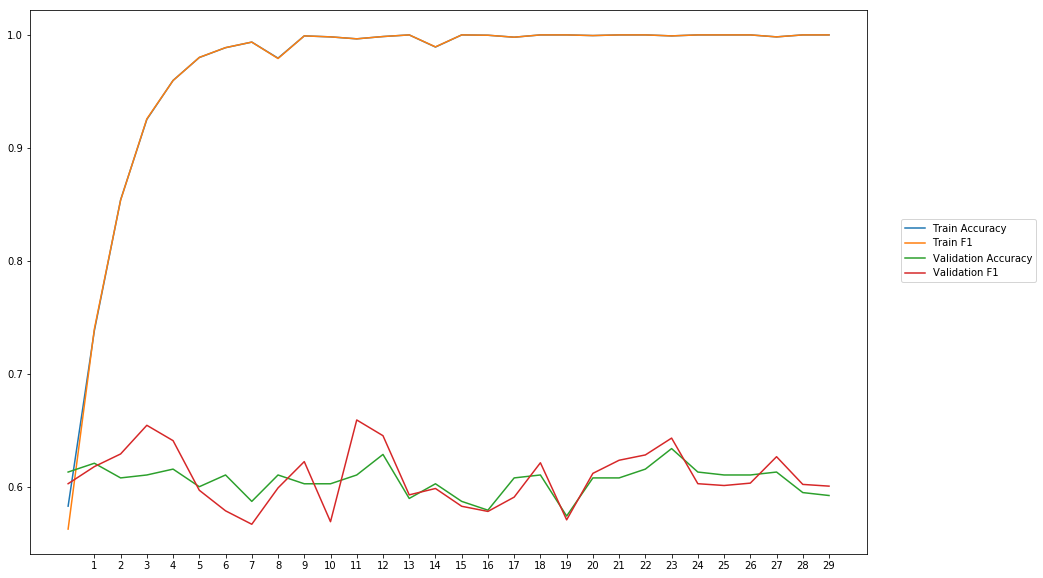

Average Accuracy: 60.56%
Average Precision: 60.57%
Average Recall: 61.43%
Average F1: 60.86%

-----Fold 2--------


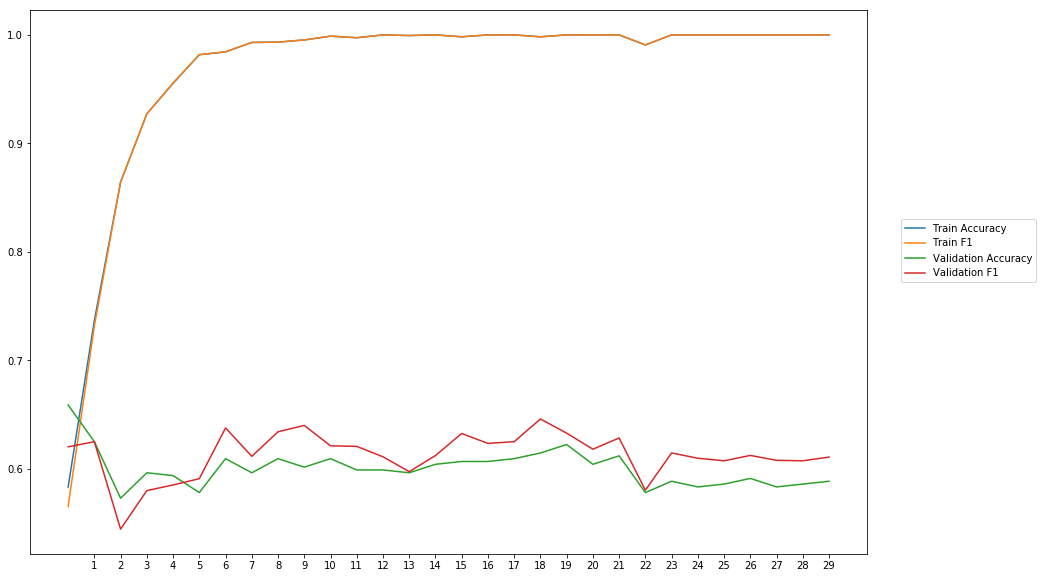

Average Accuracy: 60.03%
Average Precision: 59.81%
Average Recall: 63.11%
Average F1: 61.30%

-----Fold 3--------


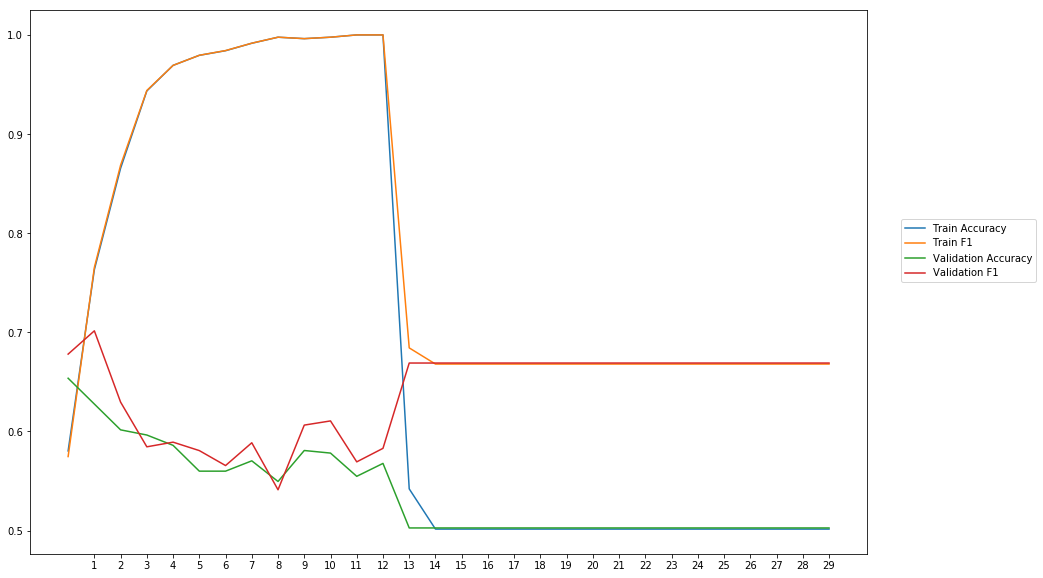

Average Accuracy: 53.77%
Average Precision: 53.52%
Average Recall: 84.09%
Average F1: 64.00%

-----Fold 4--------


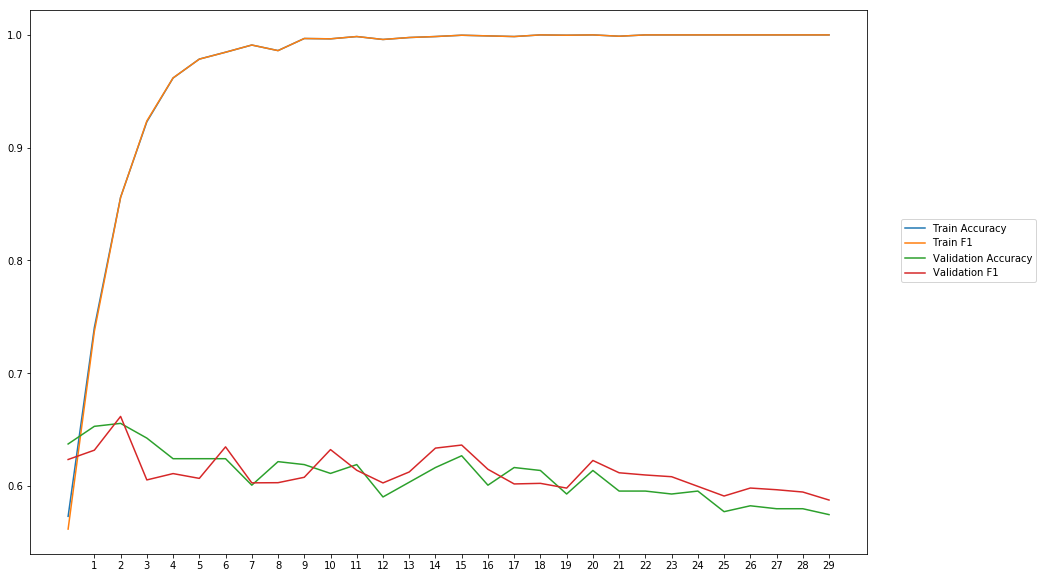

Average Accuracy: 60.91%
Average Precision: 61.10%
Average Recall: 61.42%
Average F1: 61.17%

-----Fold 5--------


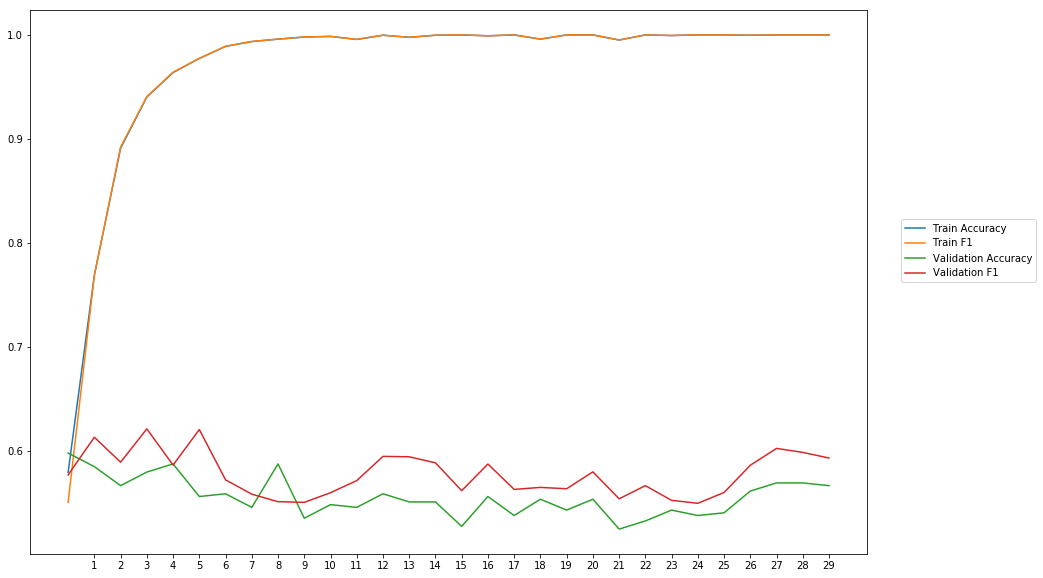

Average Accuracy: 55.57%
Average Precision: 55.26%
Average Recall: 60.76%
Average F1: 57.77%

-----Fold 6--------


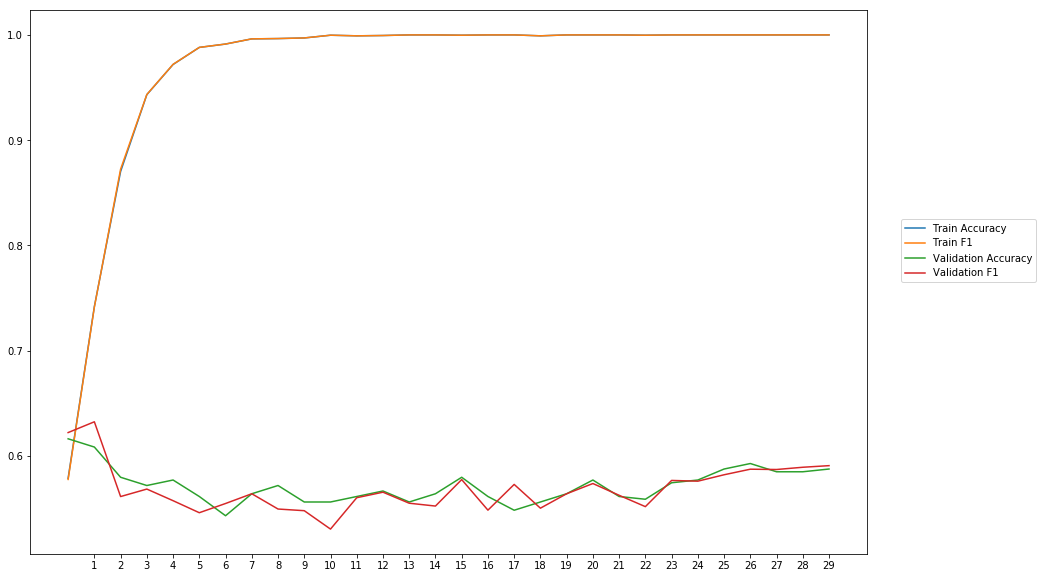

Average Accuracy: 57.16%
Average Precision: 57.41%
Average Recall: 56.39%
Average F1: 56.85%

-----Fold 7--------


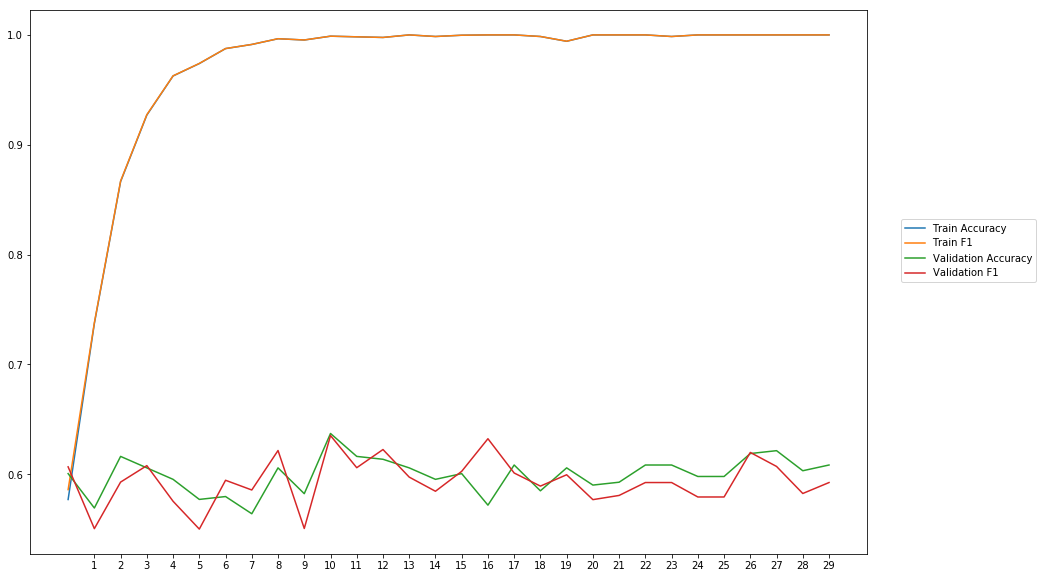

Average Accuracy: 59.94%
Average Precision: 60.47%
Average Recall: 58.51%
Average F1: 59.36%

-----Fold 8--------


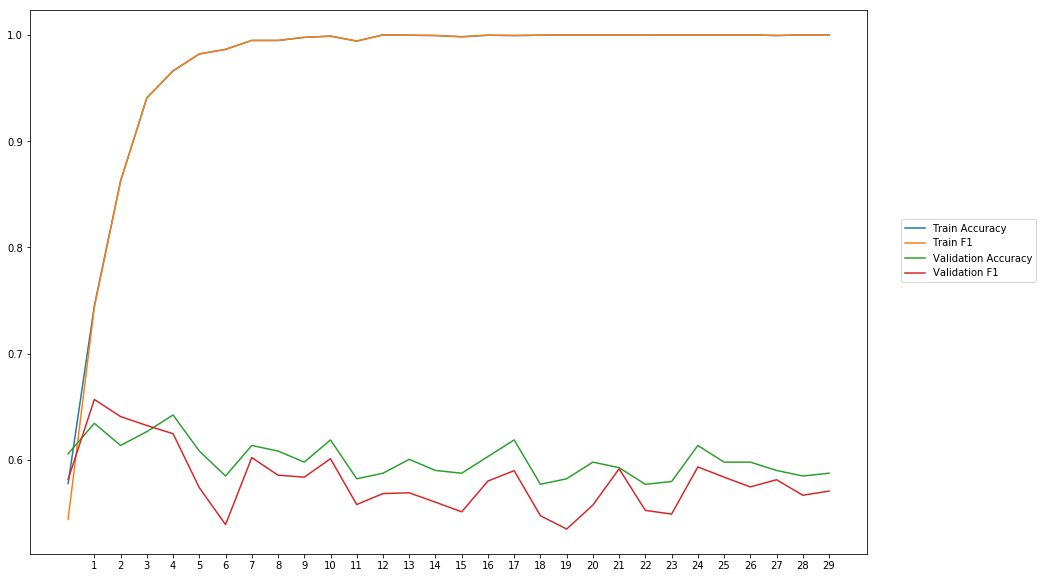

Average Accuracy: 60.01%
Average Precision: 61.19%
Average Recall: 55.33%
Average F1: 58.01%

-----Fold 9--------


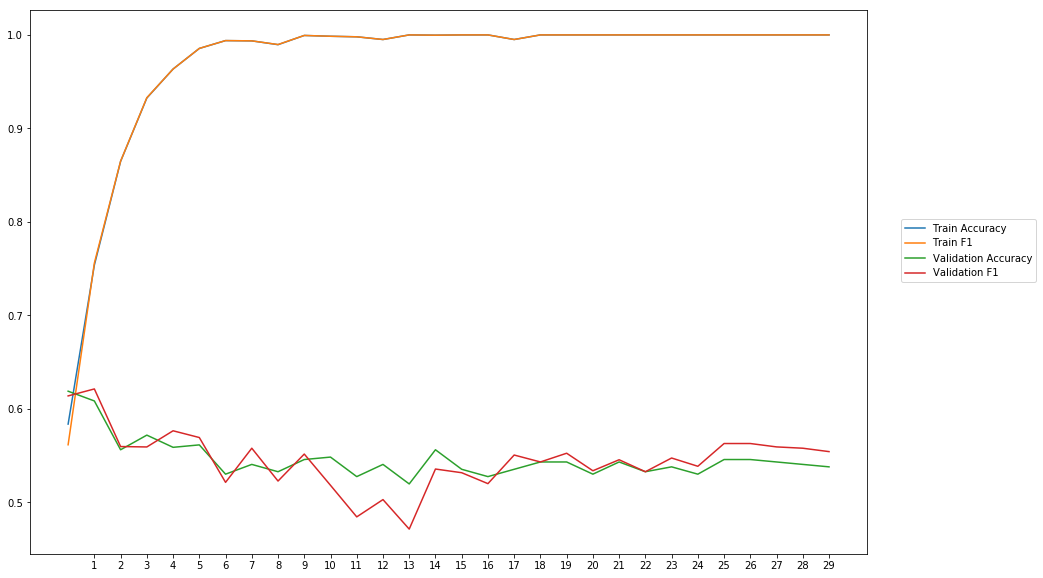

Average Accuracy: 54.62%
Average Precision: 54.77%
Average Recall: 54.44%
Average F1: 54.52%

-----Fold 10--------


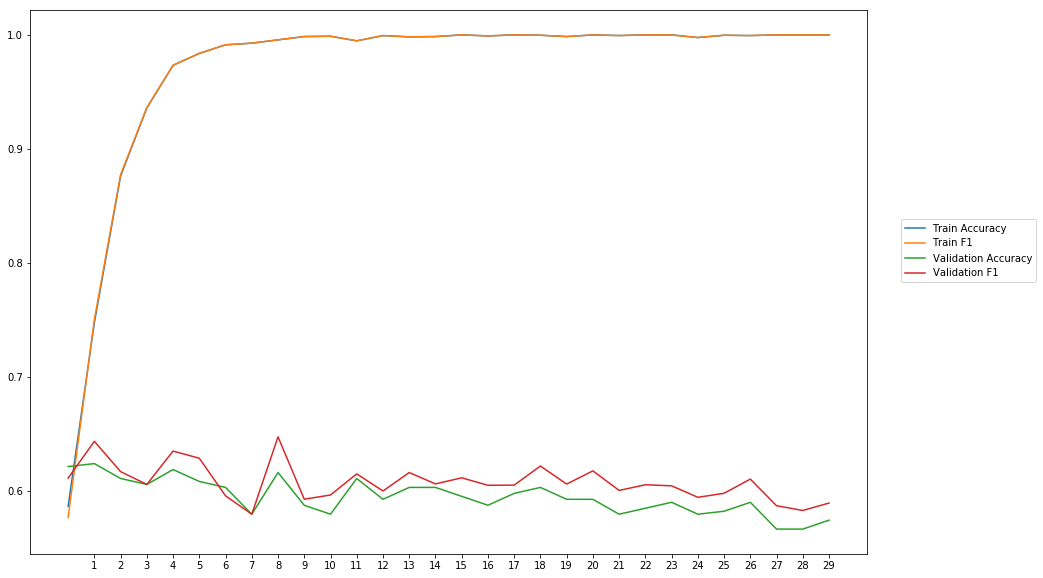

Average Accuracy: 59.50%
Average Precision: 59.09%
Average Recall: 62.62%
Average F1: 60.77%

-------Overallresults-------


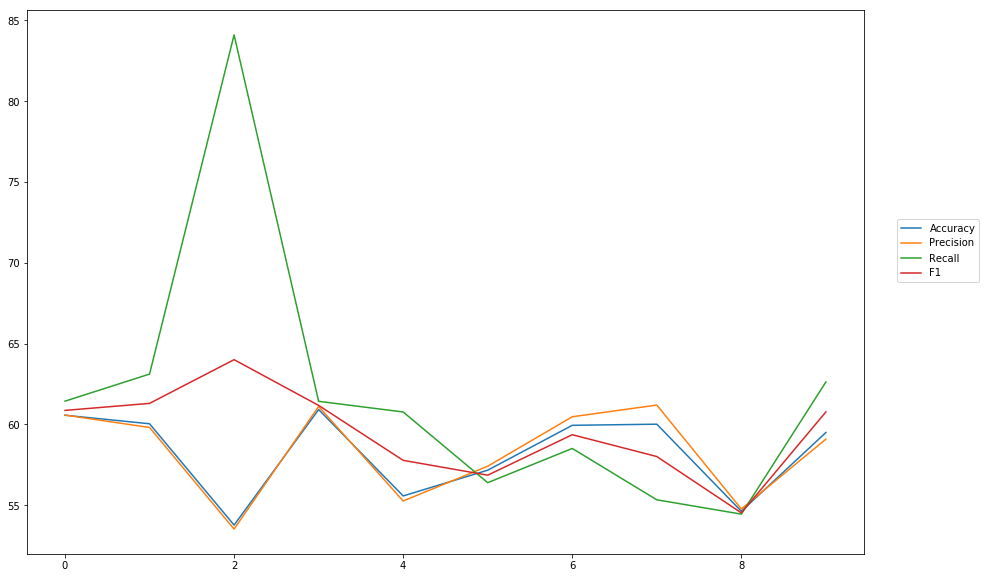

Accuracy: Mean = 58.21% (+/- 2.54%), Max = 60.91%, Min =  53.77%
Precision: Mean = 58.32% (+/- 2.73%), Max = 61.19%, Min =  53.52%
Recall: Mean = 61.81% (+/- 7.98%), Max = 84.09%, Min =  54.44%
F1: Mean = 59.46% (+/- 2.58%), Max = 64.00%, Min =  54.52%


In [10]:
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_400')  

## BiLSTM two BiLSTM-Layer, each 400 Neurons

In [ ]:
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#BiLSTM Layer
x2 = Bidirectional(LSTM(400,activation='tanh', return_sequences=True))(embedded_sequences2)

x2 = Bidirectional(LSTM(400, activation='tanh'))(x2)

#Output (Dense) Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


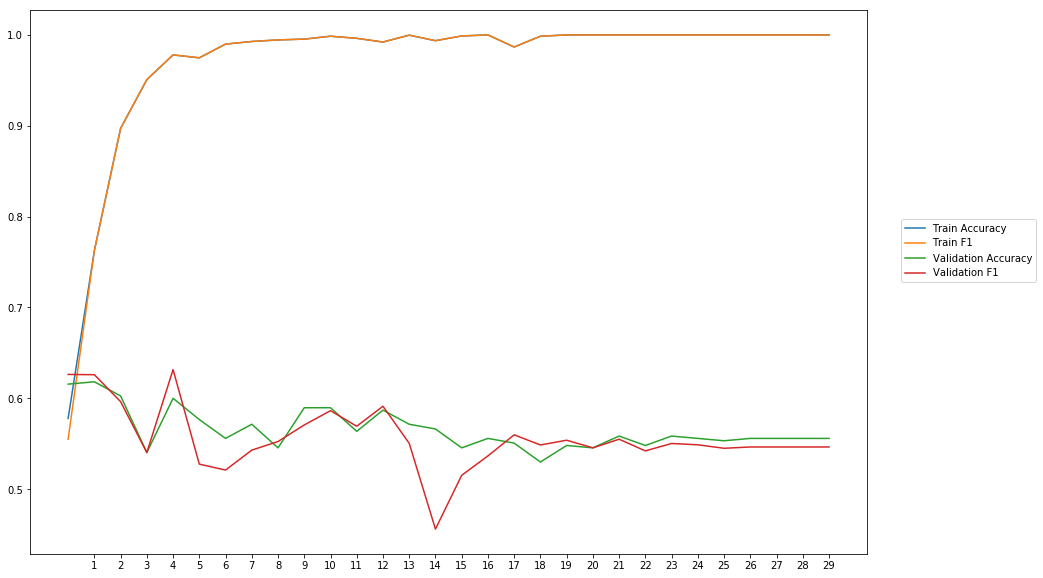

Average Accuracy: 56.55%
Average Precision: 57.04%
Average Recall: 54.53%
Average F1: 55.58%

-----Fold 2--------


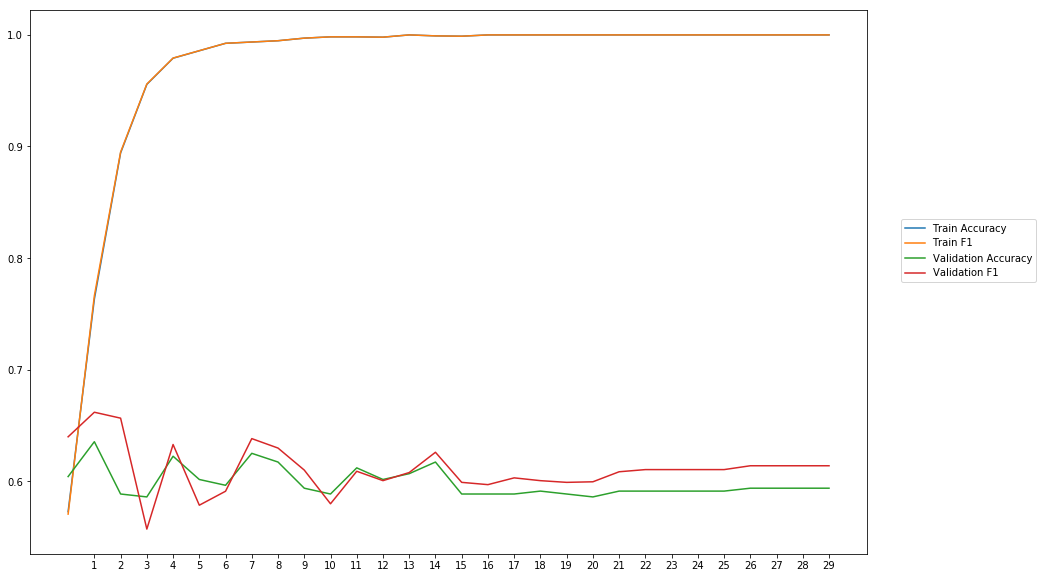

Average Accuracy: 59.86%
Average Precision: 59.60%
Average Recall: 62.85%
Average F1: 61.07%

-----Fold 3--------


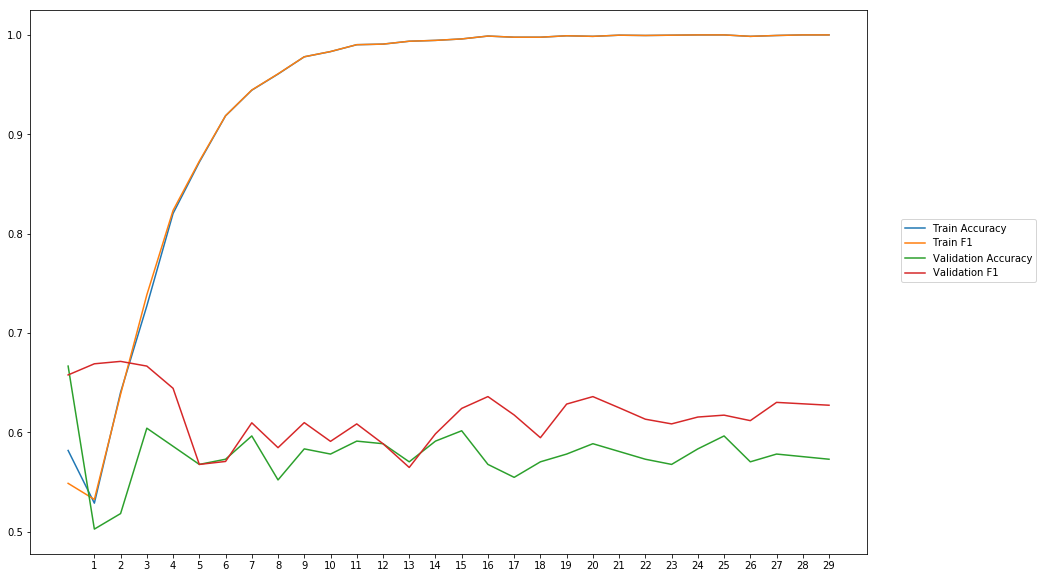

Average Accuracy: 57.76%
Average Precision: 57.03%
Average Recall: 68.36%
Average F1: 61.72%

-----Fold 4--------


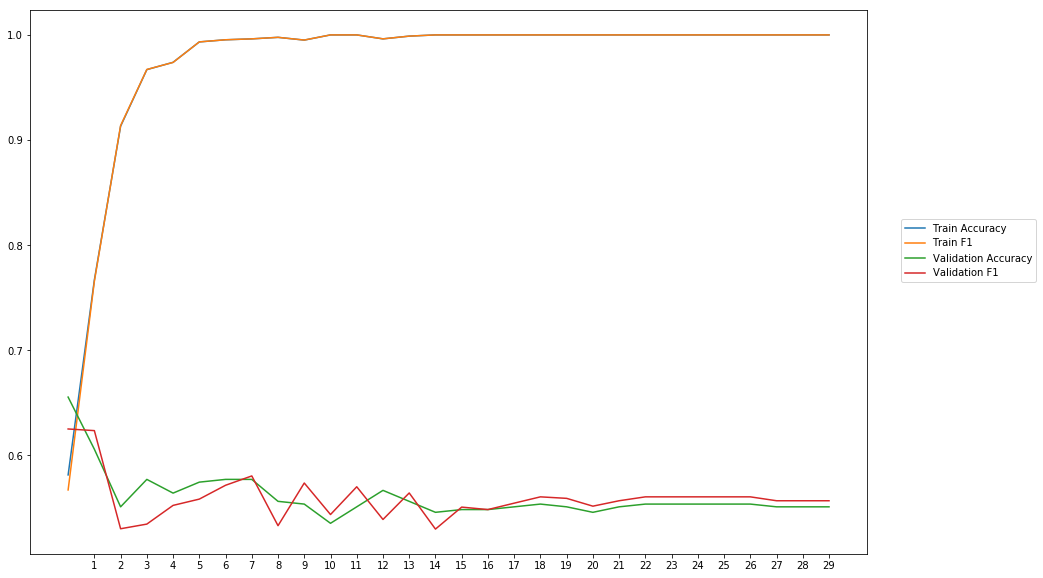

Average Accuracy: 56.05%
Average Precision: 56.33%
Average Recall: 55.69%
Average F1: 55.94%

-----Fold 5--------


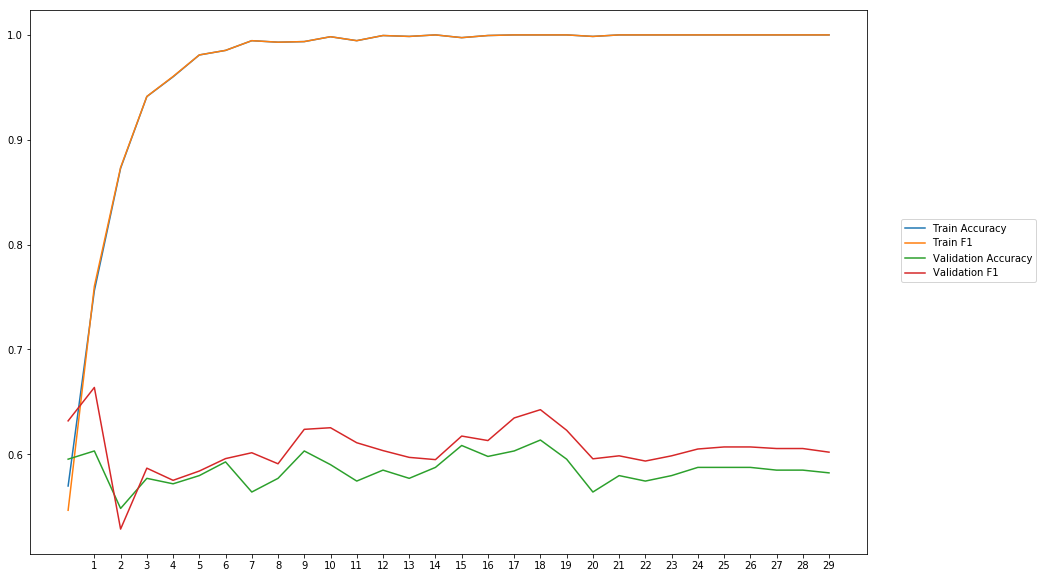

Average Accuracy: 58.52%
Average Precision: 57.84%
Average Recall: 63.66%
Average F1: 60.54%

-----Fold 6--------


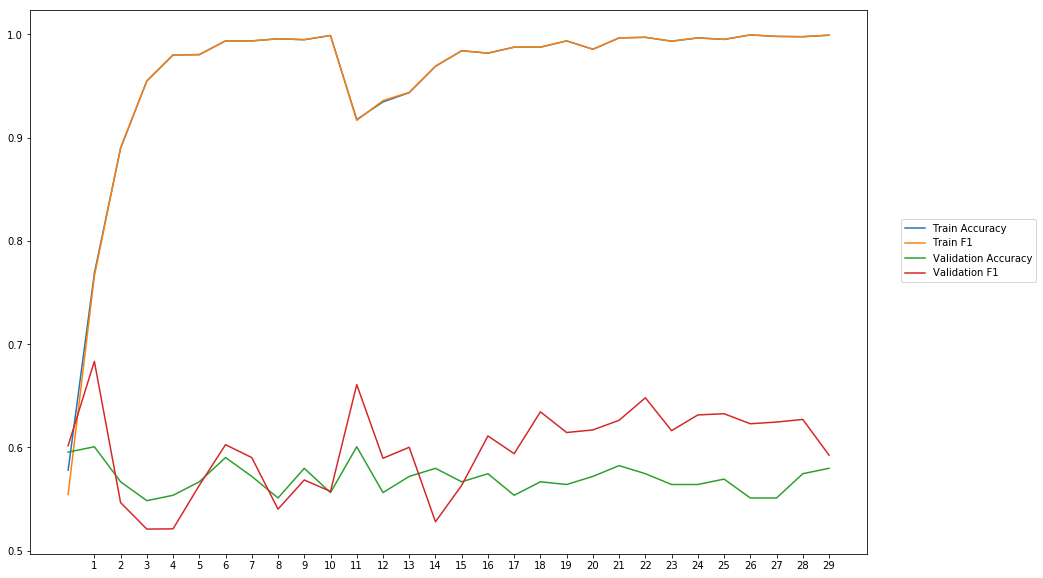

Average Accuracy: 56.98%
Average Precision: 56.31%
Average Recall: 64.62%
Average F1: 59.76%

-----Fold 7--------


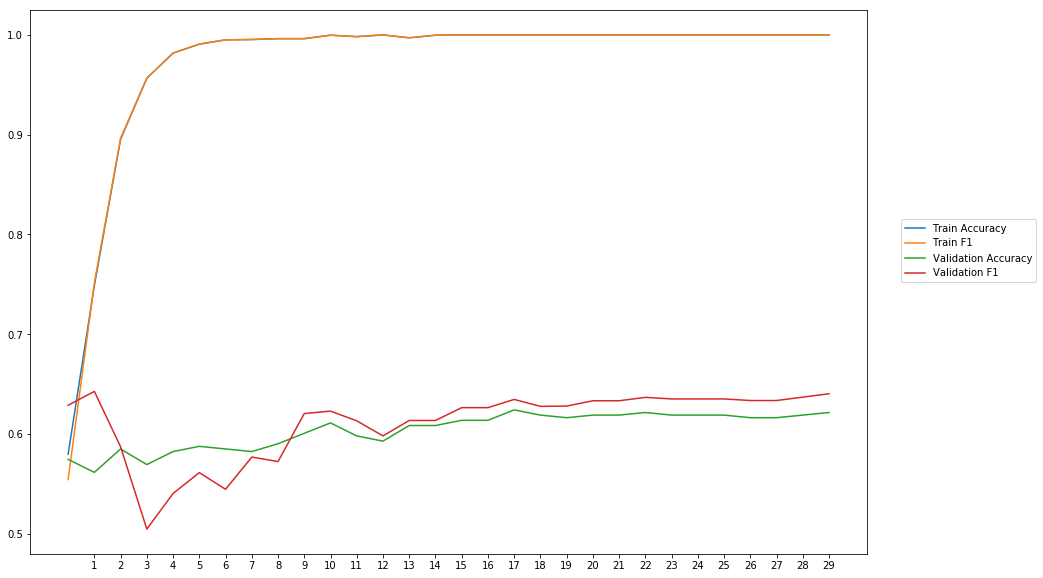

Average Accuracy: 60.37%
Average Precision: 60.13%
Average Recall: 62.59%
Average F1: 61.11%

-----Fold 8--------


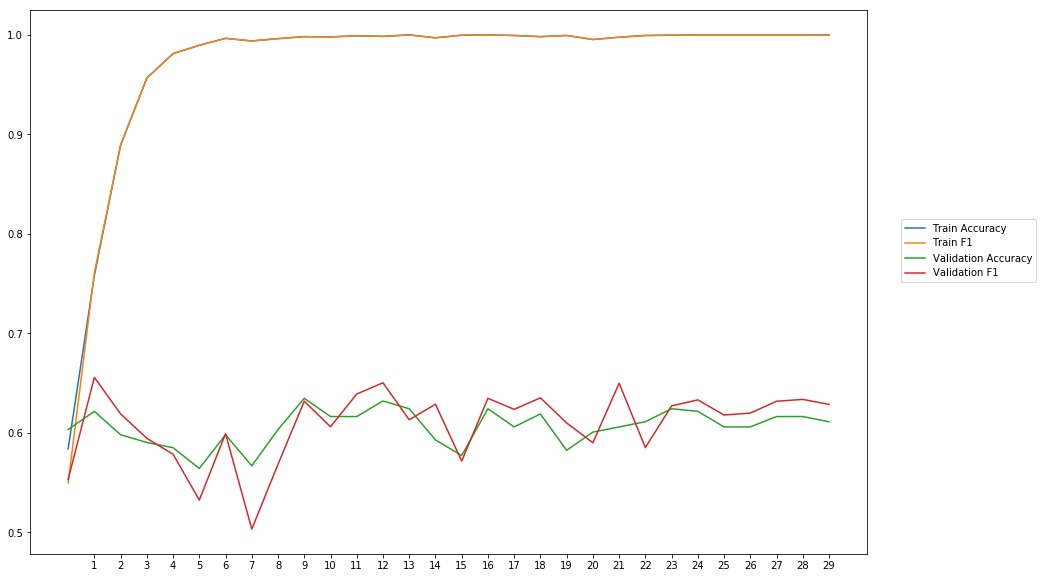

Average Accuracy: 60.57%
Average Precision: 60.54%
Average Recall: 61.63%
Average F1: 60.86%

-----Fold 9--------


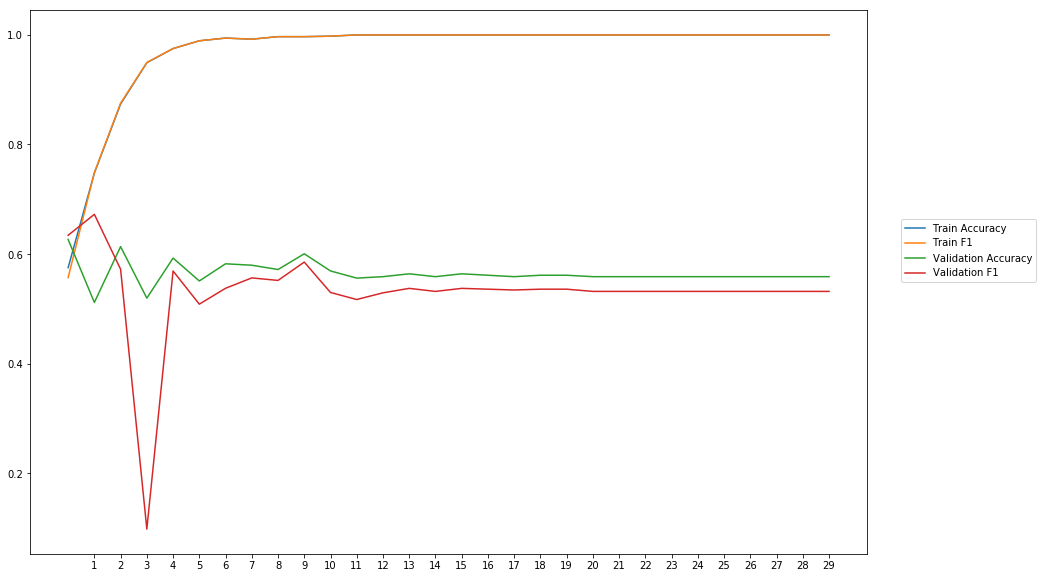

Average Accuracy: 56.50%
Average Precision: 58.53%
Average Recall: 50.99%
Average F1: 53.10%

-----Fold 10--------


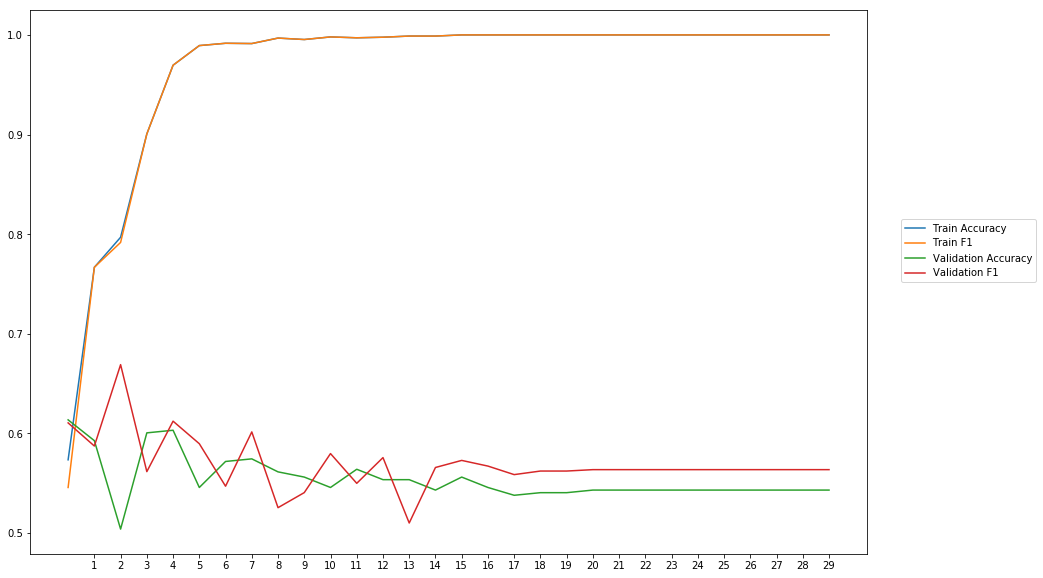

Average Accuracy: 55.45%
Average Precision: 55.49%
Average Recall: 59.27%
Average F1: 56.95%

-------Overallresults-------


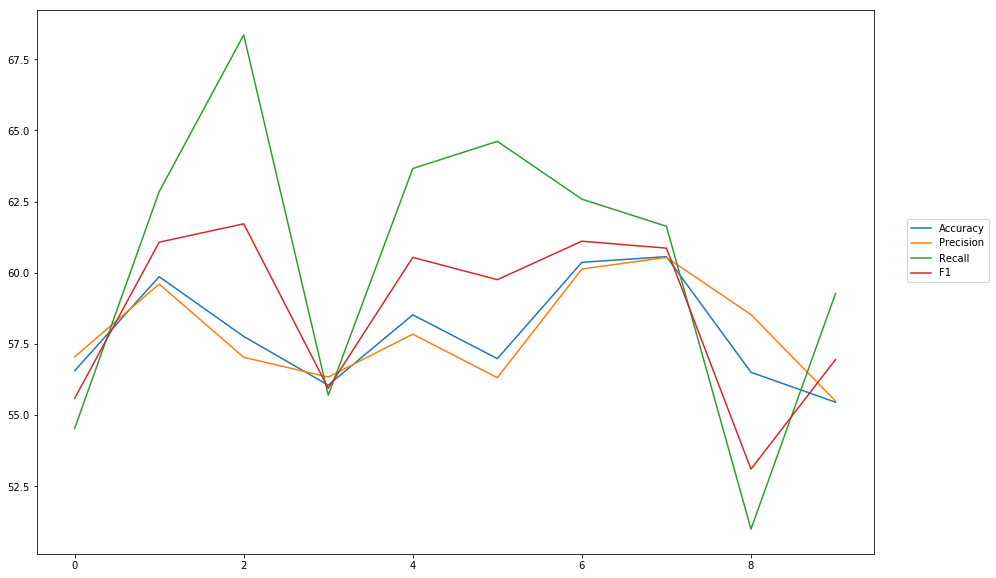

Accuracy: Mean = 57.86% (+/- 1.77%), Max = 60.57%, Min =  55.45%
Precision: Mean = 57.88% (+/- 1.66%), Max = 60.54%, Min =  55.49%
Recall: Mean = 60.42% (+/- 5.01%), Max = 68.36%, Min =  50.99%
F1: Mean = 58.66% (+/- 2.86%), Max = 61.72%, Min =  53.10%


In [16]:
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_2_400')  

## BiLSTM two BiLSTM-Layer, first 400 neurons, second 300 neurons

In [ ]:
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#BiLSTM Layer
x3 = Bidirectional(LSTM(400, activation='tanh', return_sequences=True))(embedded_sequences3)

x3 = Bidirectional(LSTM(300, activation='tanh'))(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


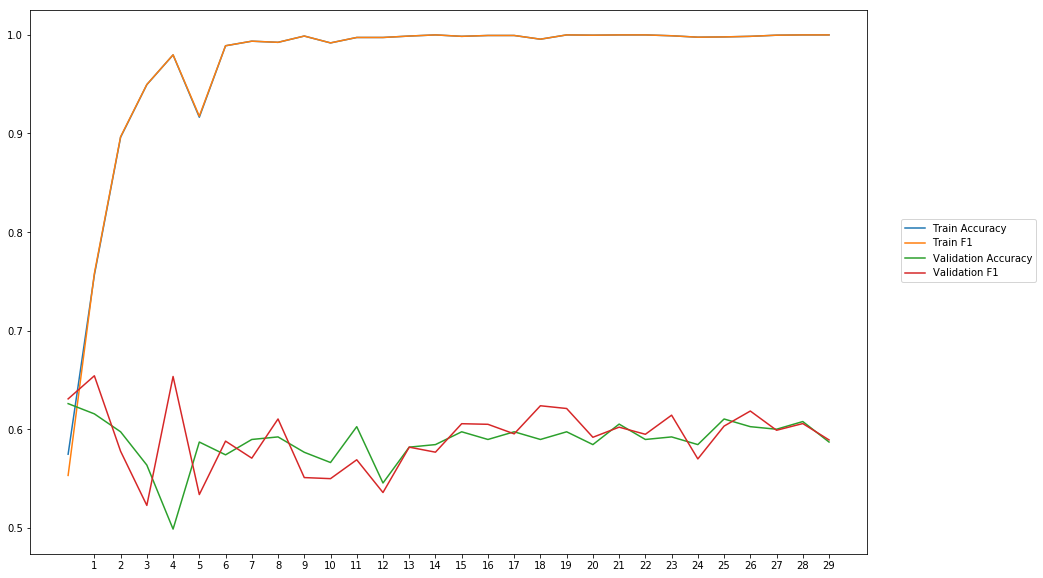

Average Accuracy: 58.79%
Average Precision: 59.00%
Average Recall: 60.05%
Average F1: 59.15%

-----Fold 2--------


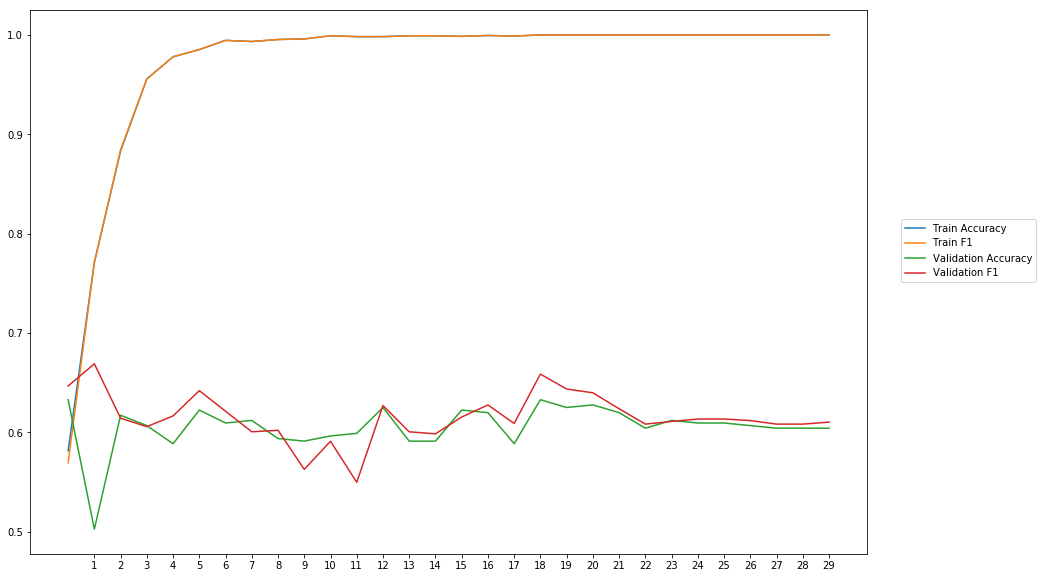

Average Accuracy: 60.56%
Average Precision: 60.66%
Average Recall: 63.06%
Average F1: 61.50%

-----Fold 3--------


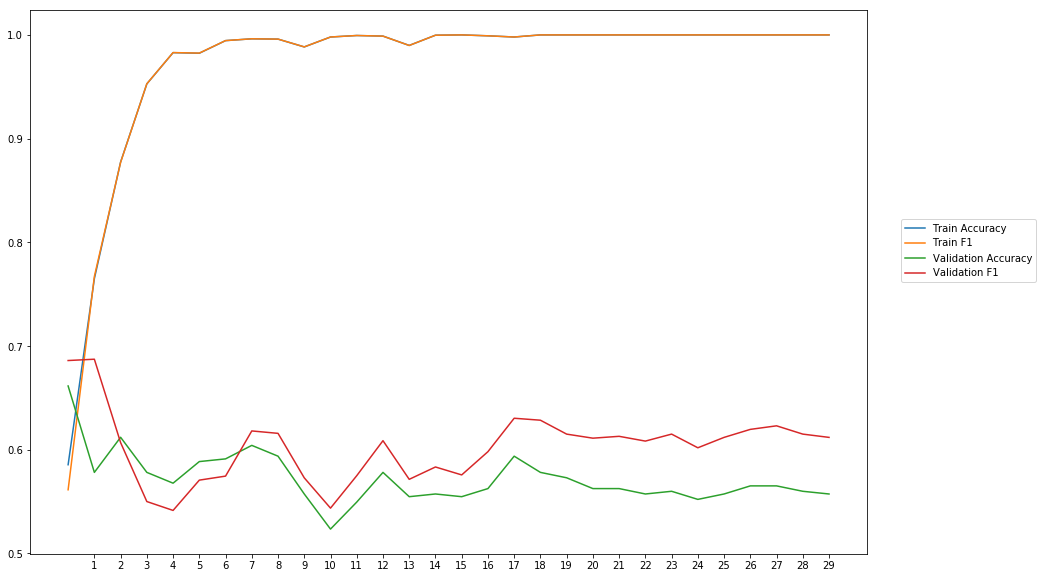

Average Accuracy: 57.19%
Average Precision: 56.60%
Average Recall: 65.13%
Average F1: 60.28%

-----Fold 4--------


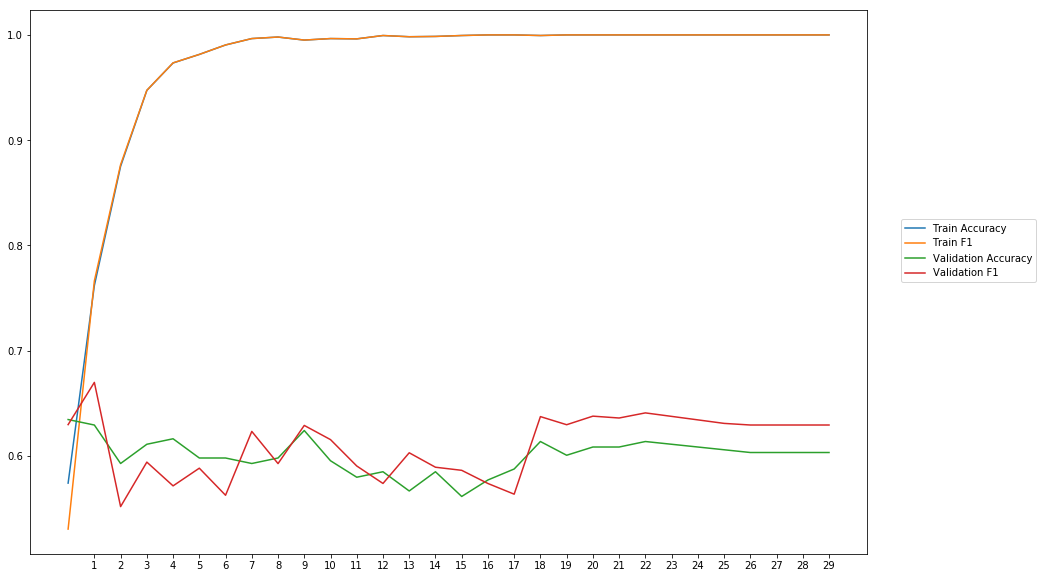

Average Accuracy: 60.04%
Average Precision: 59.77%
Average Recall: 62.78%
Average F1: 61.02%

-----Fold 5--------


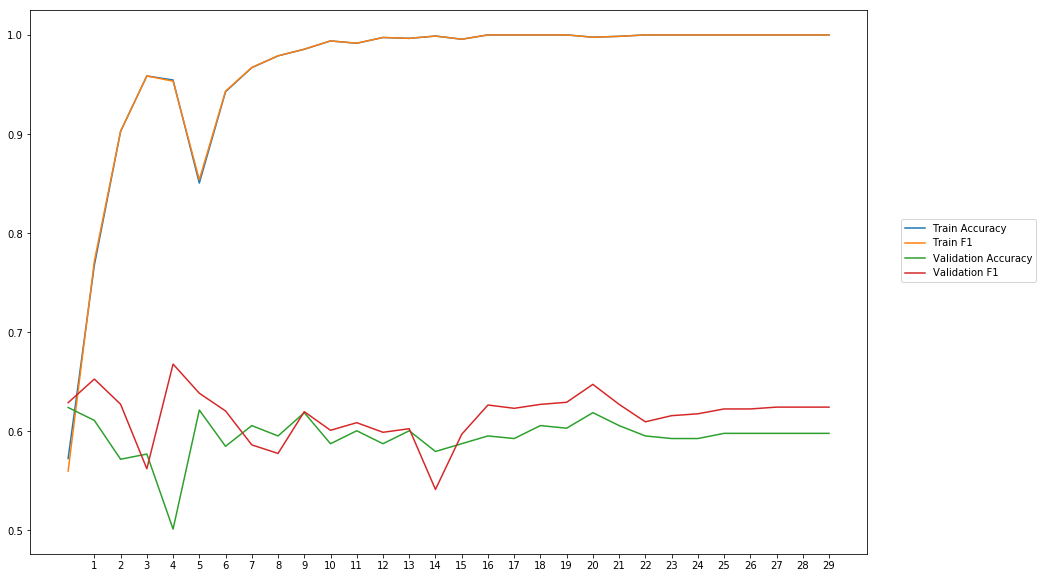

Average Accuracy: 59.49%
Average Precision: 58.93%
Average Recall: 65.21%
Average F1: 61.58%

-----Fold 6--------


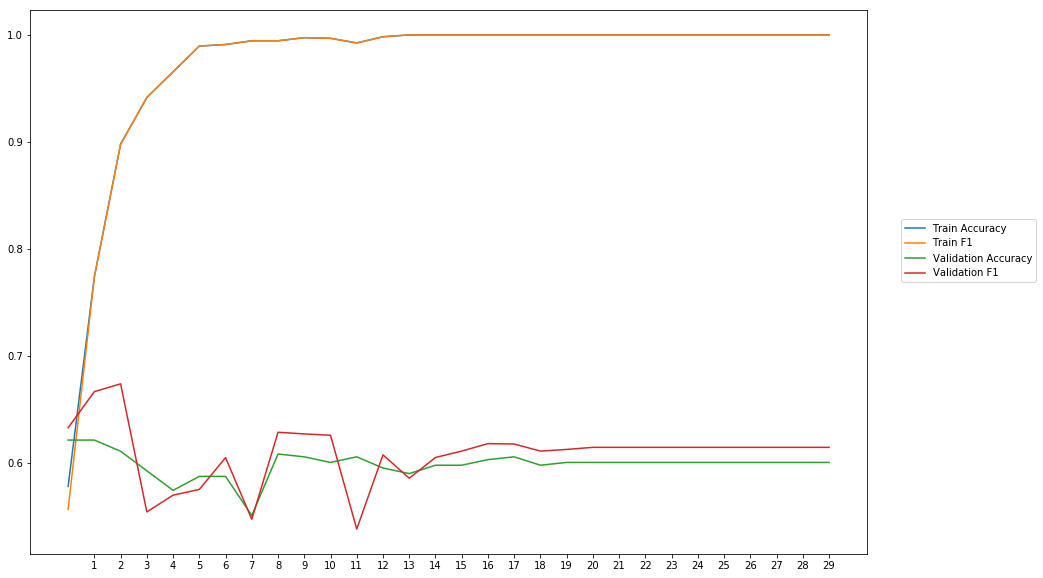

Average Accuracy: 59.87%
Average Precision: 59.55%
Average Recall: 62.64%
Average F1: 60.87%

-----Fold 7--------


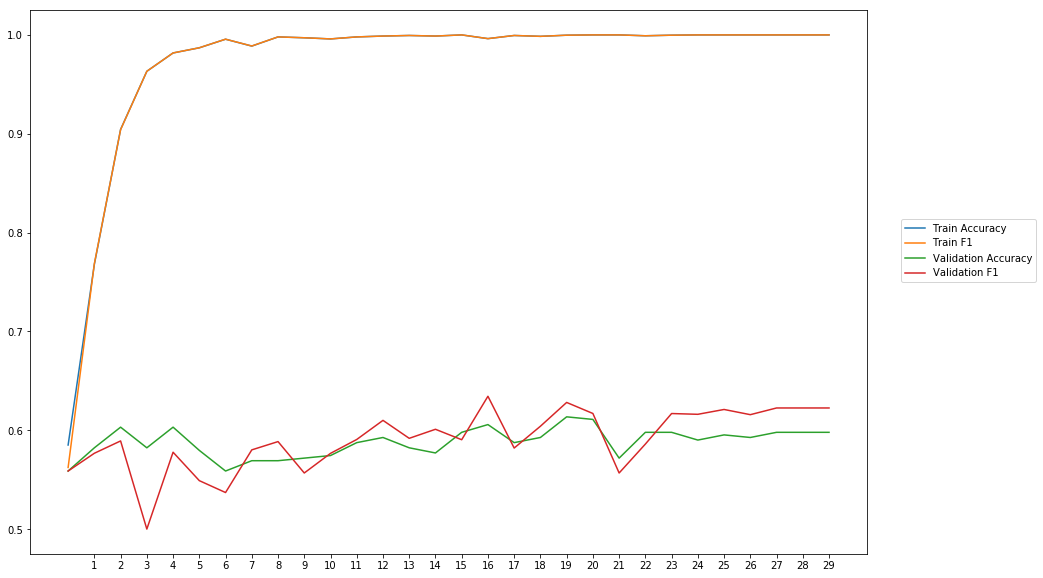

Average Accuracy: 58.80%
Average Precision: 58.85%
Average Recall: 59.65%
Average F1: 59.07%

-----Fold 8--------


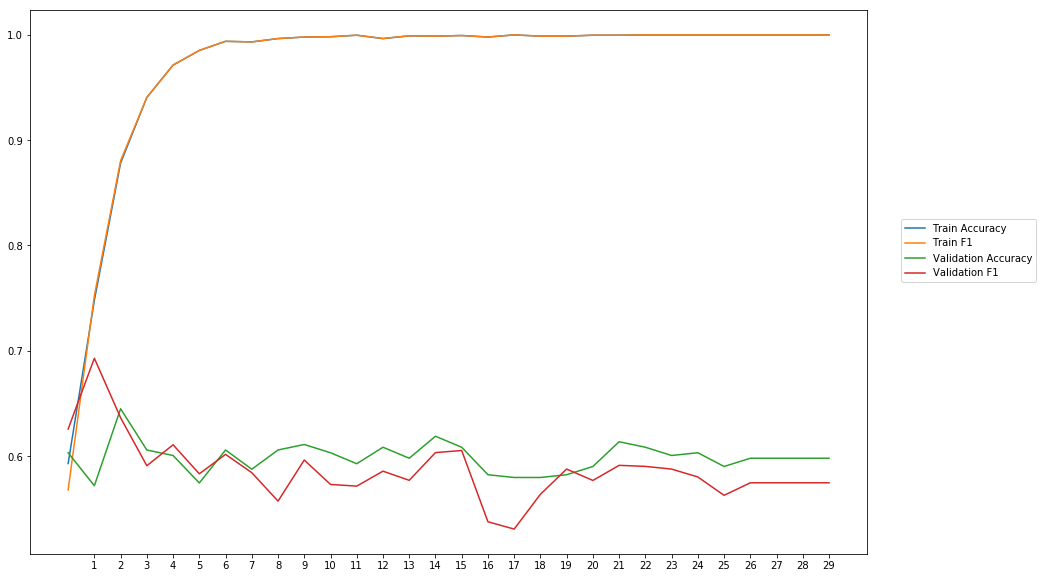

Average Accuracy: 59.87%
Average Precision: 60.79%
Average Recall: 57.33%
Average F1: 58.67%

-----Fold 9--------


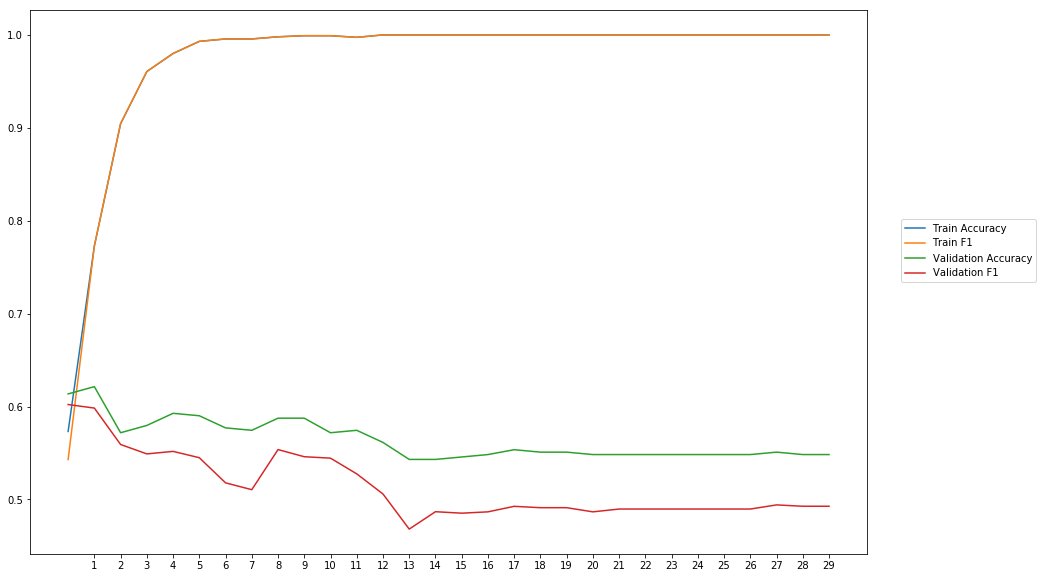

Average Accuracy: 56.41%
Average Precision: 58.16%
Average Recall: 46.13%
Average F1: 51.39%

-----Fold 10--------


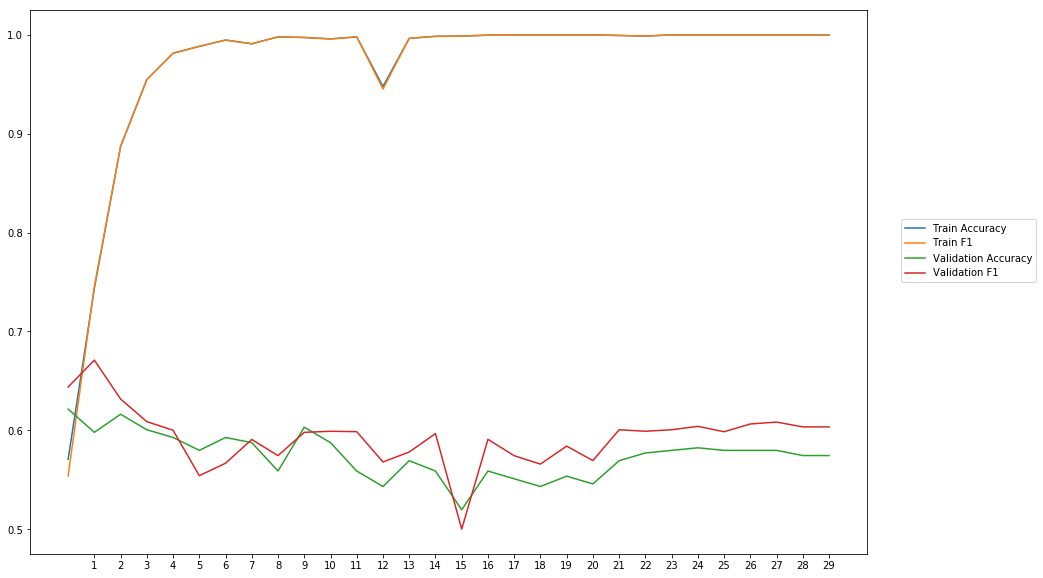

Average Accuracy: 57.45%
Average Precision: 57.00%
Average Recall: 62.05%
Average F1: 59.29%

-------Overallresults-------


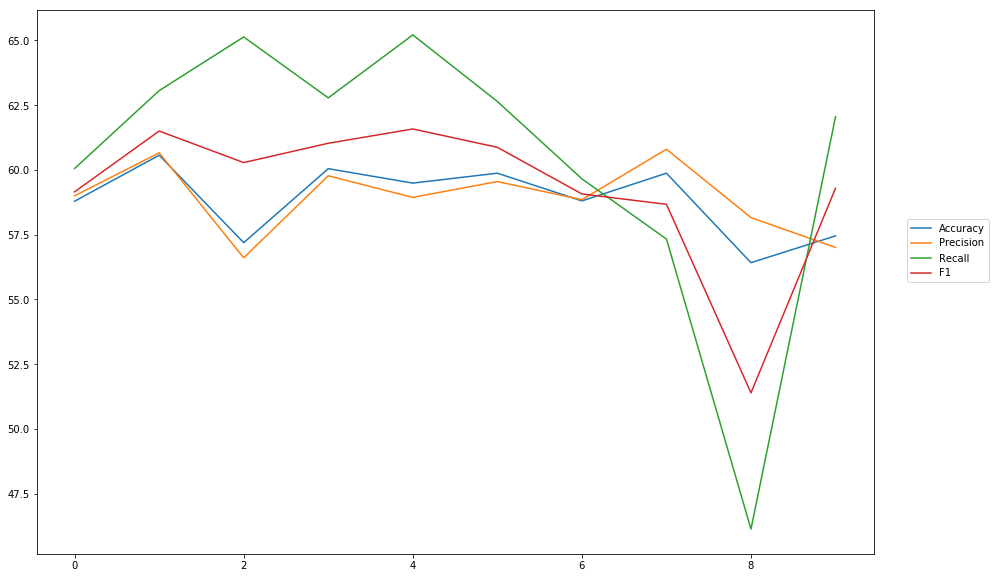

Accuracy: Mean = 58.85% (+/- 1.32%), Max = 60.56%, Min =  56.41%
Precision: Mean = 58.93% (+/- 1.31%), Max = 60.79%, Min =  56.60%
Recall: Mean = 60.40% (+/- 5.29%), Max = 65.21%, Min =  46.13%
F1: Mean = 59.28% (+/- 2.82%), Max = 61.58%, Min =  51.39%


In [17]:
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_2_400_300')  

## BiLSTM three BiLSTM-layer, each 400 neurons

In [8]:
wv_layer10 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input10 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences10 = wv_layer10(comment_input10)

#BiLSTM Layer
x10 = Bidirectional(LSTM(400, activation='tanh', return_sequences=True))(embedded_sequences10)
x10 = Bidirectional(LSTM(400, activation='tanh', return_sequences=True))(x10)
x10 = Bidirectional(LSTM(400, activation='tanh'))(x10)

#Output (Dense) Layer
preds10 = Dense(2, activation='softmax')(x10)

# build the model
model10 = Model(inputs=[comment_input10], outputs=preds10)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


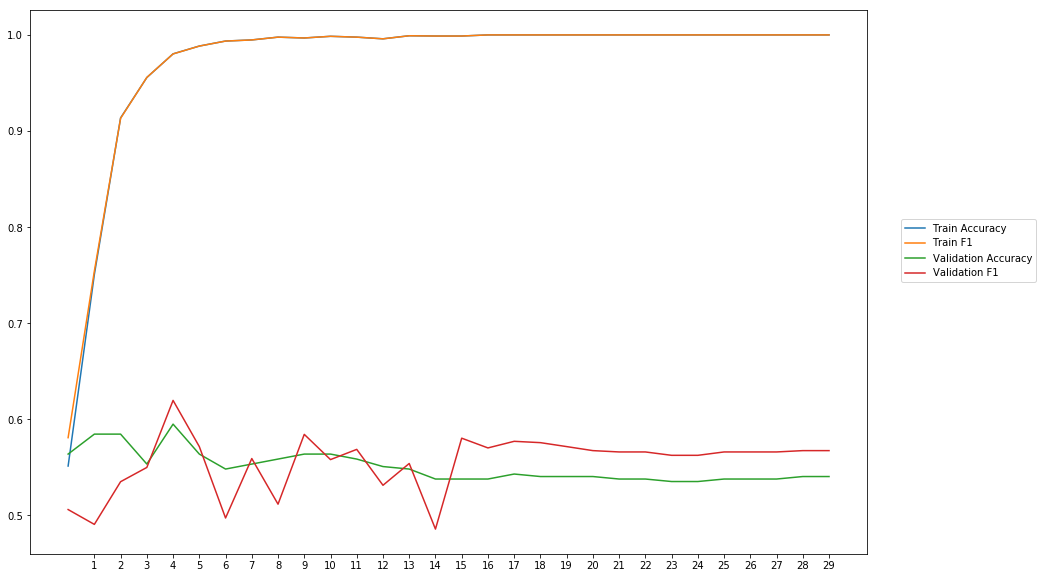

Average Accuracy: 55.01%
Average Precision: 55.00%
Average Recall: 56.70%
Average F1: 55.50%

-----Fold 2--------


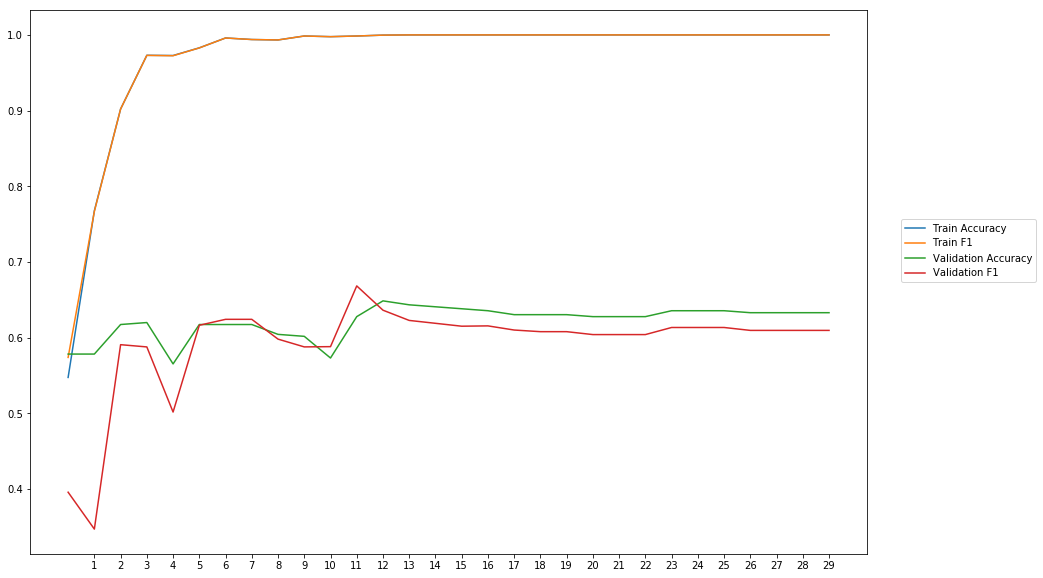

Average Accuracy: 62.11%
Average Precision: 63.87%
Average Recall: 56.40%
Average F1: 59.17%

-----Fold 3--------


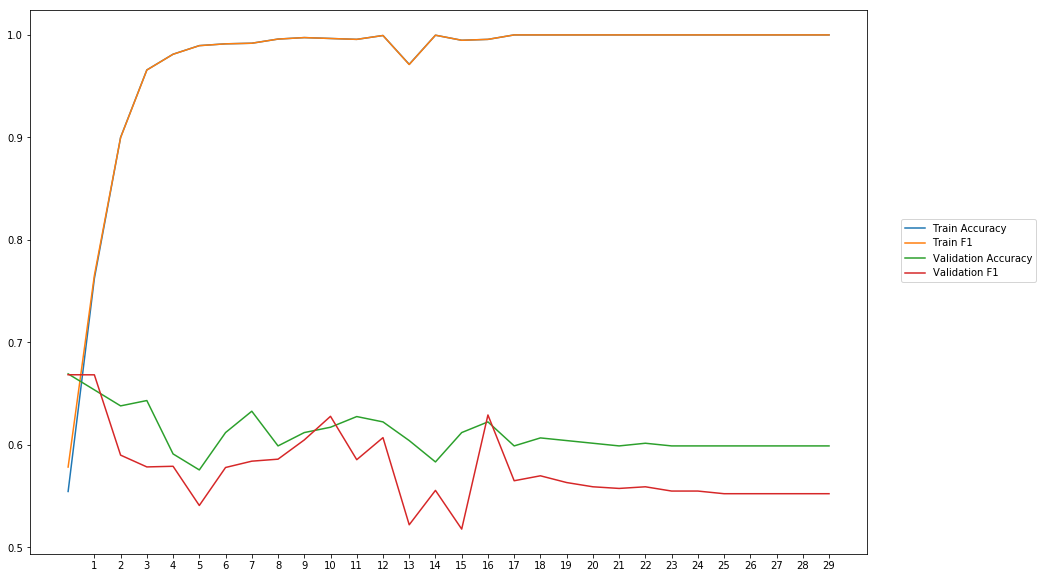

Average Accuracy: 61.07%
Average Precision: 62.91%
Average Recall: 53.46%
Average F1: 57.56%

-----Fold 4--------


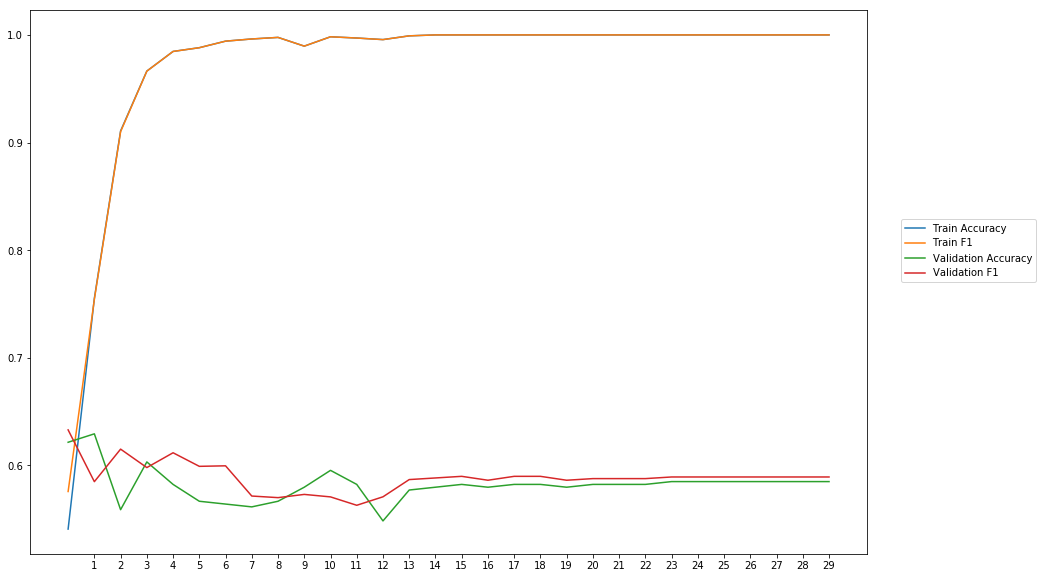

Average Accuracy: 58.21%
Average Precision: 57.94%
Average Recall: 60.07%
Average F1: 58.88%

-----Fold 5--------


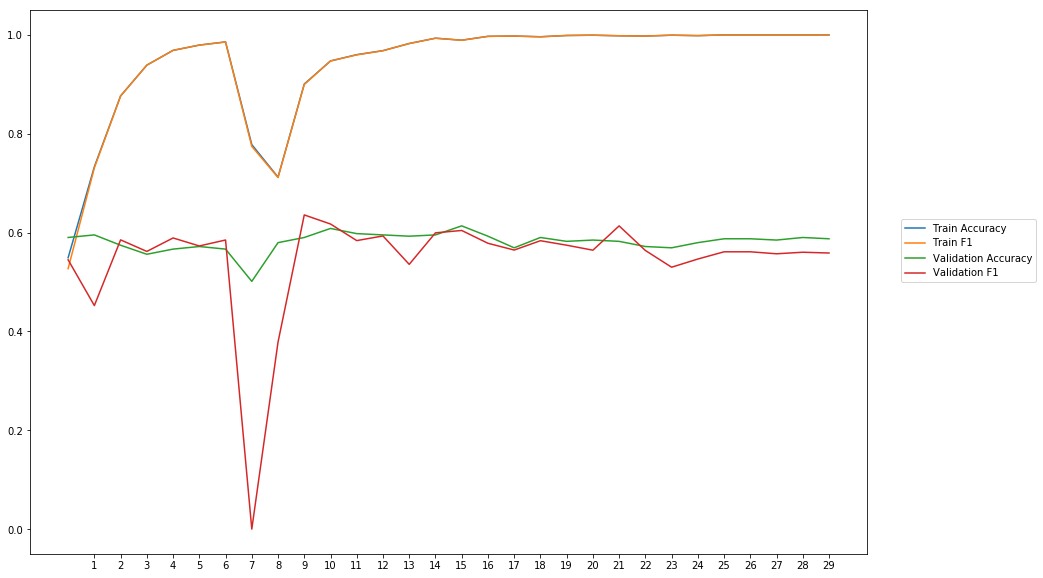

Average Accuracy: 58.18%
Average Precision: 57.60%
Average Recall: 52.97%
Average F1: 54.52%

-----Fold 6--------


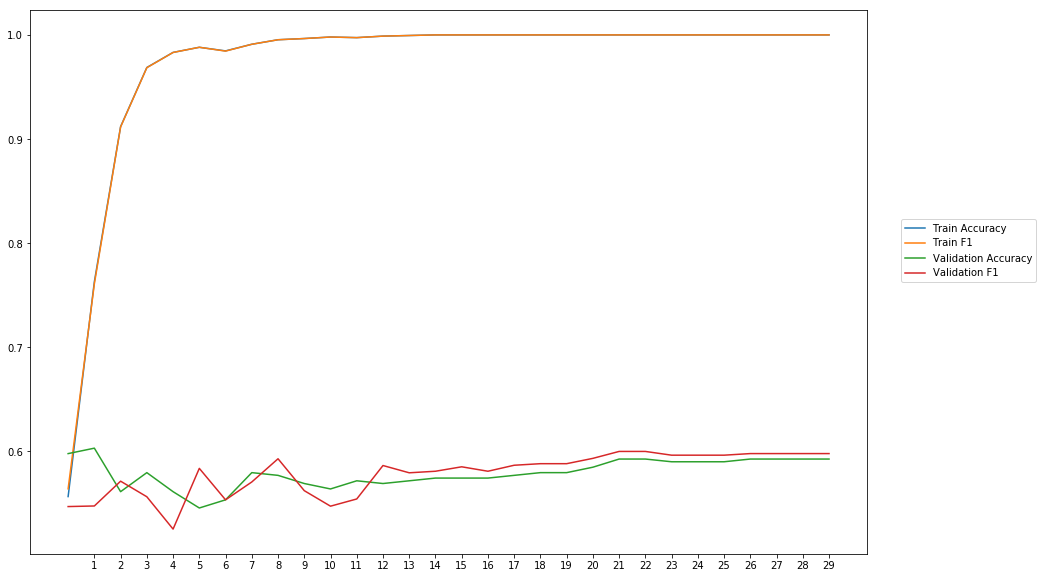

Average Accuracy: 57.92%
Average Precision: 57.87%
Average Recall: 58.13%
Average F1: 57.88%

-----Fold 7--------


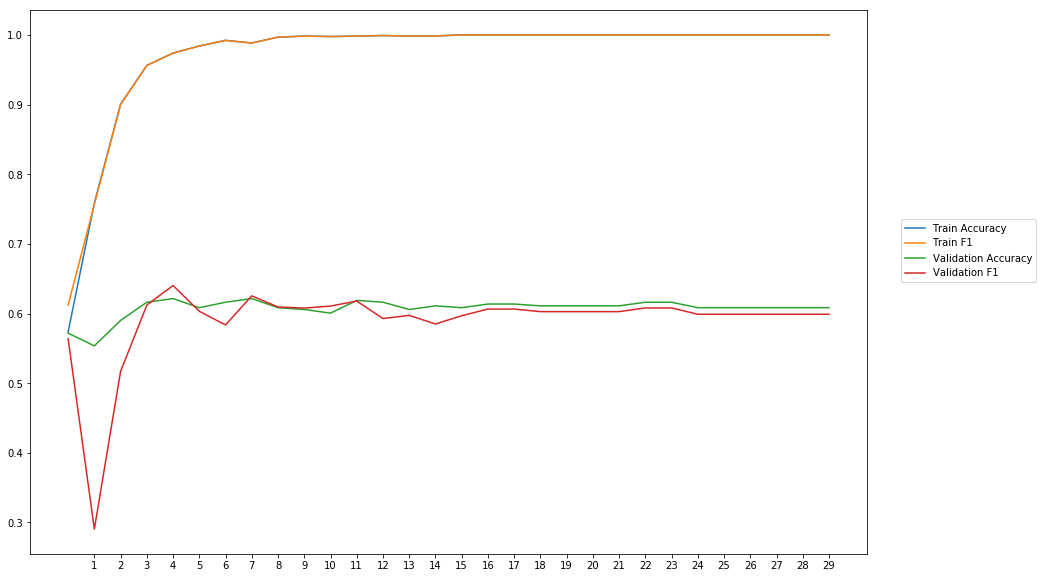

Average Accuracy: 60.76%
Average Precision: 61.62%
Average Recall: 57.50%
Average F1: 58.95%

-----Fold 8--------


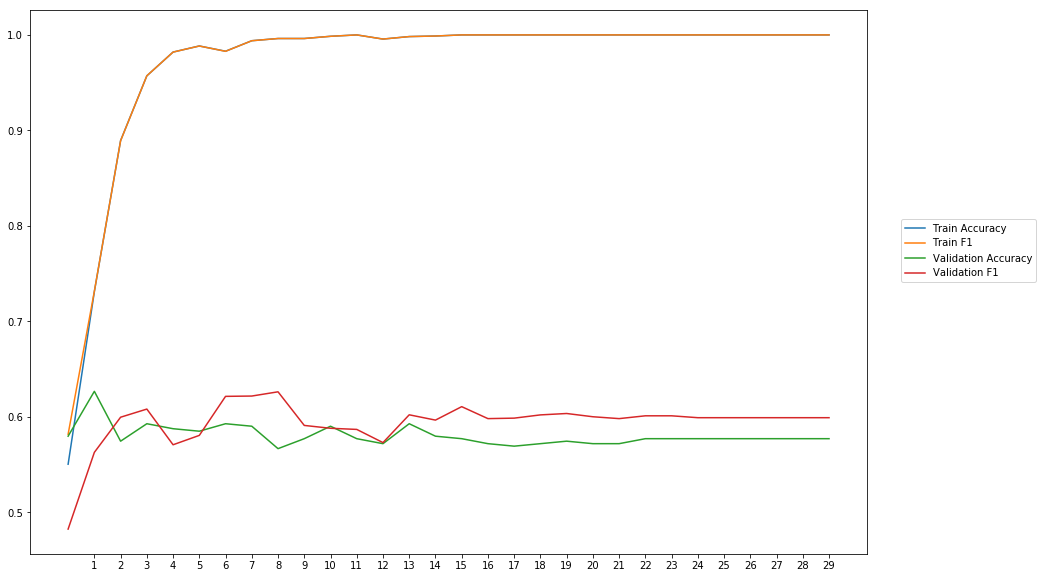

Average Accuracy: 58.02%
Average Precision: 57.58%
Average Recall: 61.90%
Average F1: 59.39%

-----Fold 9--------


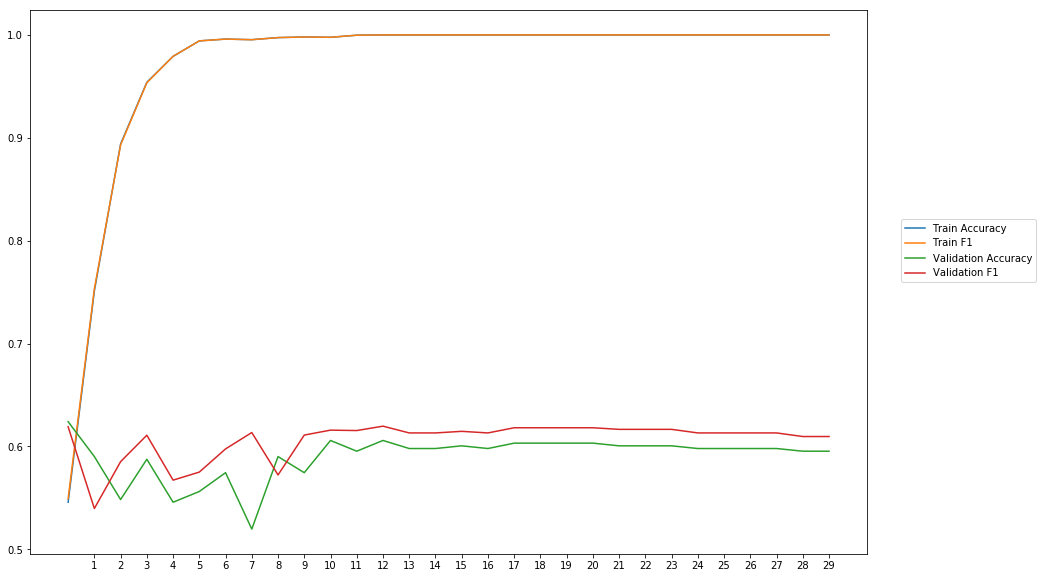

Average Accuracy: 59.03%
Average Precision: 58.35%
Average Recall: 63.37%
Average F1: 60.63%

-----Fold 10--------


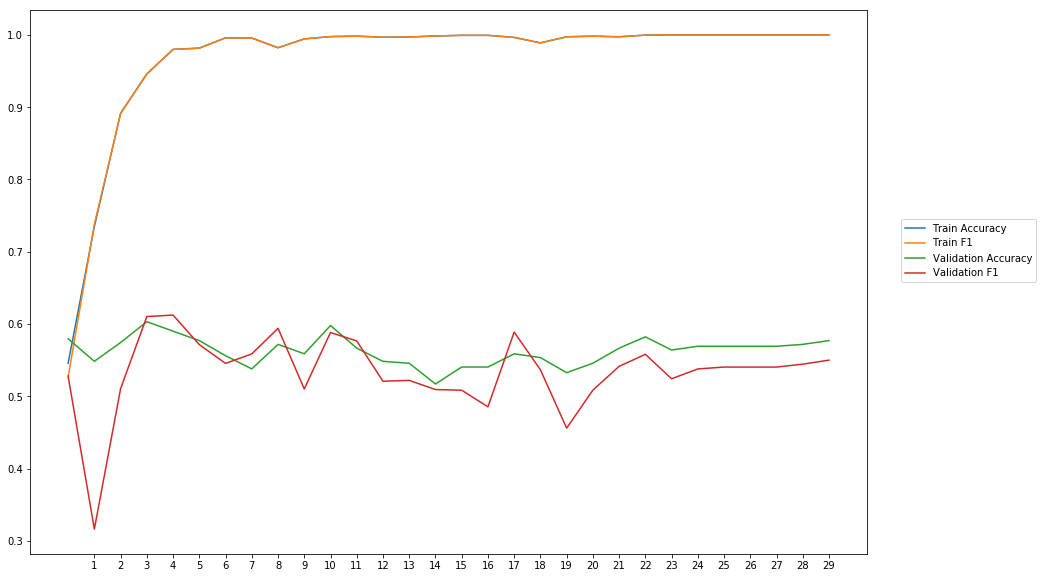

Average Accuracy: 56.28%
Average Precision: 57.06%
Average Recall: 51.13%
Average F1: 53.45%

-------Overallresults-------


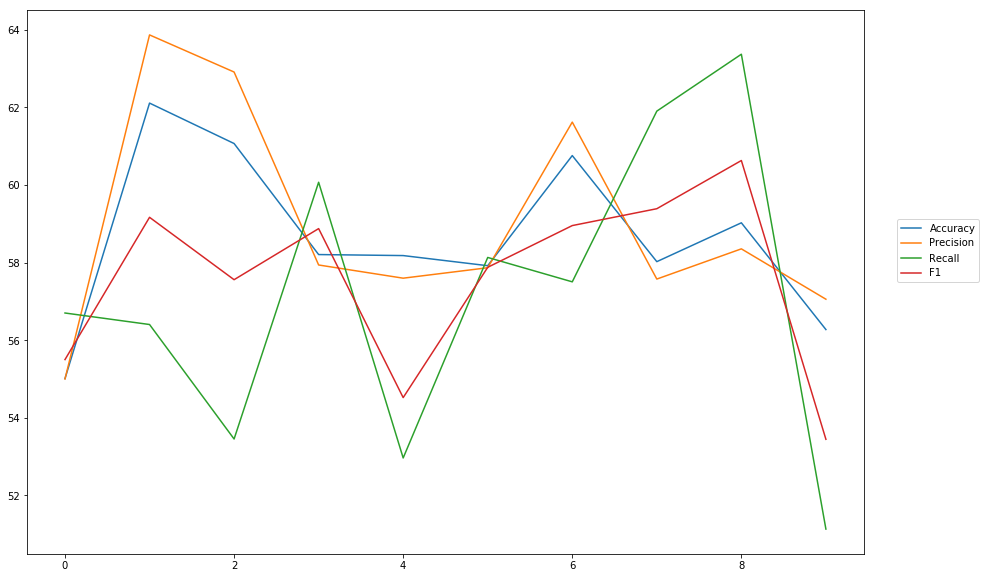

Accuracy: Mean = 58.66% (+/- 2.06%), Max = 62.11%, Min =  55.01%
Precision: Mean = 58.98% (+/- 2.69%), Max = 63.87%, Min =  55.00%
Recall: Mean = 57.16% (+/- 3.73%), Max = 63.37%, Min =  51.13%
F1: Mean = 57.59% (+/- 2.22%), Max = 60.63%, Min =  53.45%


In [9]:
cross_val(model10, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_3_400')  

## BiLSTM three BiLSTM-layer, first 300, second 200, third 100 neurons

In [10]:
wv_layer11 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input11 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences11 = wv_layer11(comment_input11)

#BiLSTM Layer
x11 = Bidirectional(LSTM(400, activation='tanh', return_sequences=True))(embedded_sequences11)
x11 = Bidirectional(LSTM(300, activation='tanh', return_sequences=True))(x11)
x11 = Bidirectional(LSTM(200, activation='tanh'))(x11)

#Output (Dense) Layer
preds11 = Dense(2, activation='softmax')(x11)

# build the model
model11 = Model(inputs=[comment_input11], outputs=preds11)


-----Fold 1--------


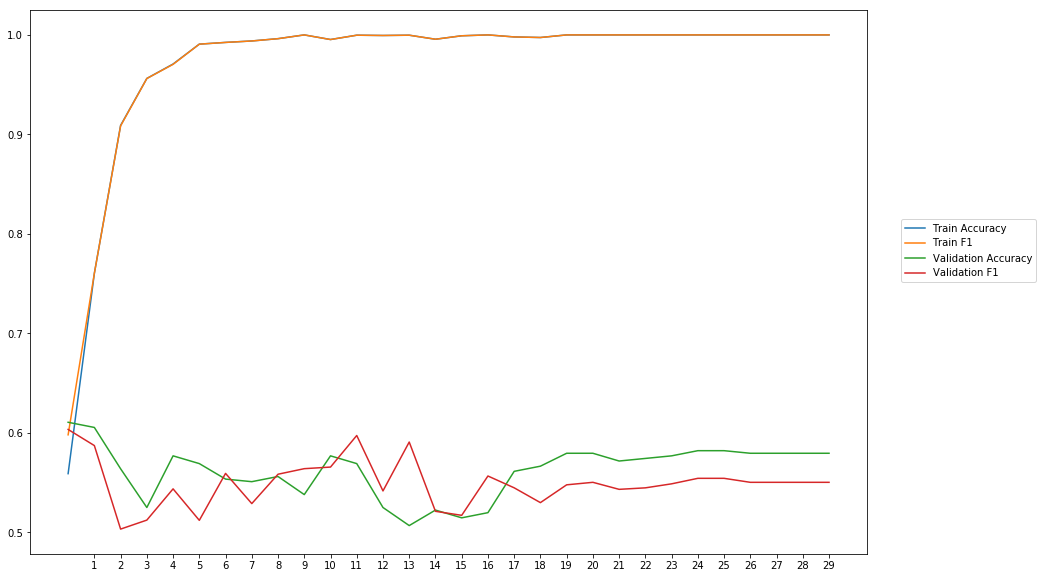

Average Accuracy: 56.23%
Average Precision: 56.74%
Average Recall: 53.63%
Average F1: 54.91%

-----Fold 2--------


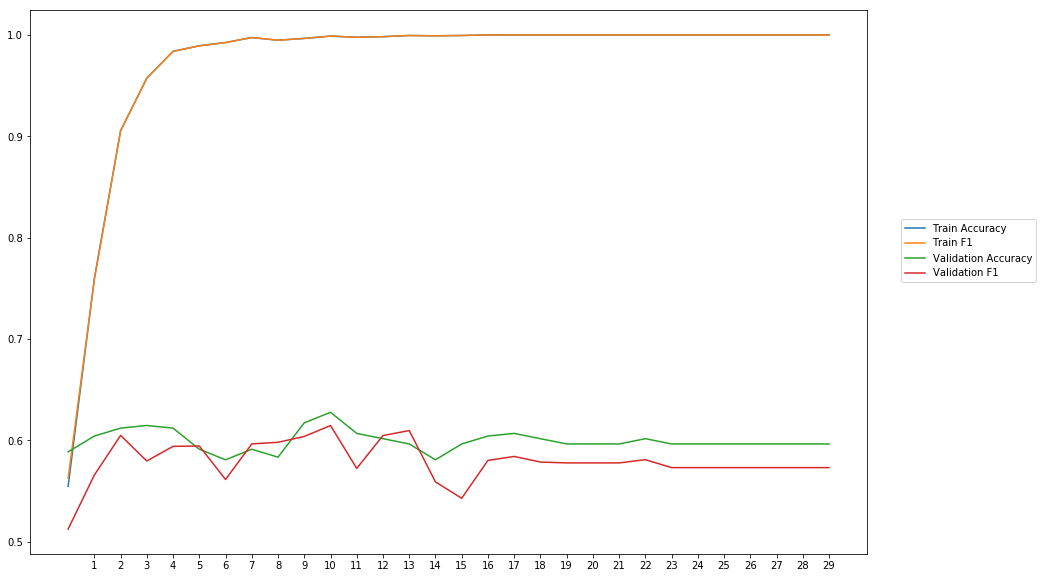

Average Accuracy: 59.94%
Average Precision: 60.69%
Average Recall: 55.62%
Average F1: 57.93%

-----Fold 3--------


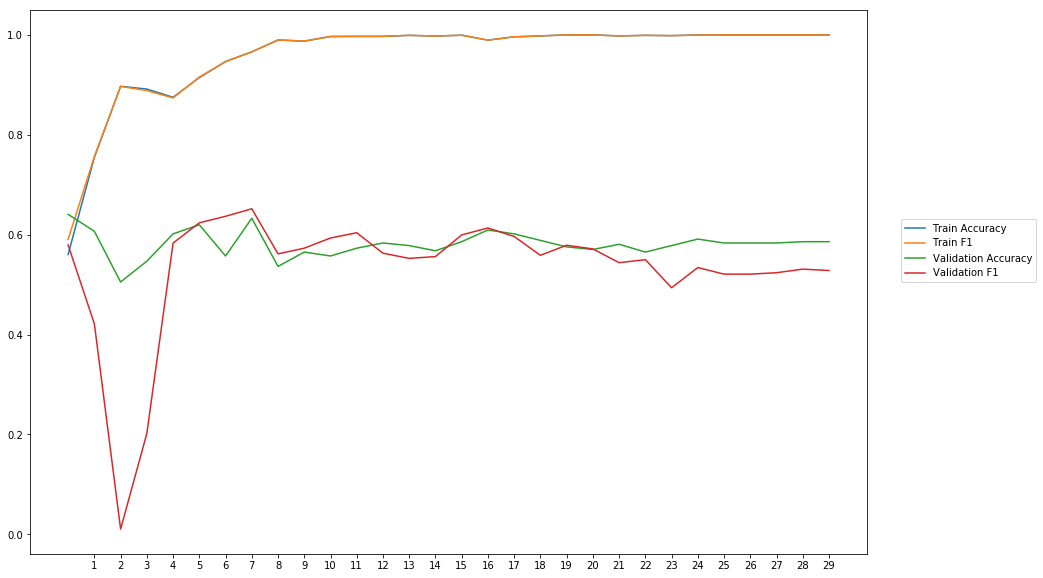

Average Accuracy: 58.13%
Average Precision: 61.86%
Average Recall: 51.40%
Average F1: 53.25%

-----Fold 4--------


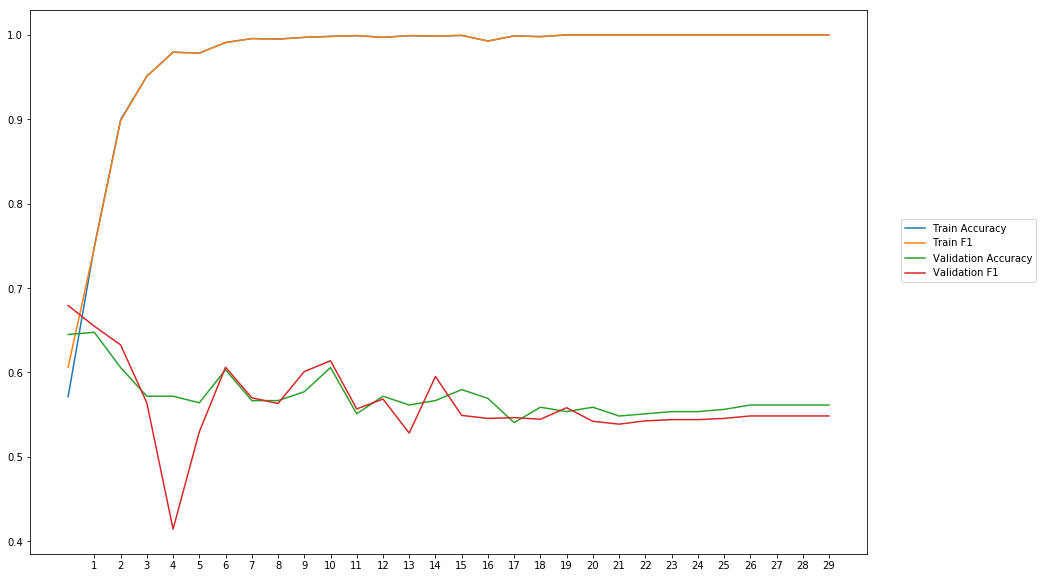

Average Accuracy: 57.15%
Average Precision: 57.30%
Average Recall: 55.79%
Average F1: 56.23%

-----Fold 5--------


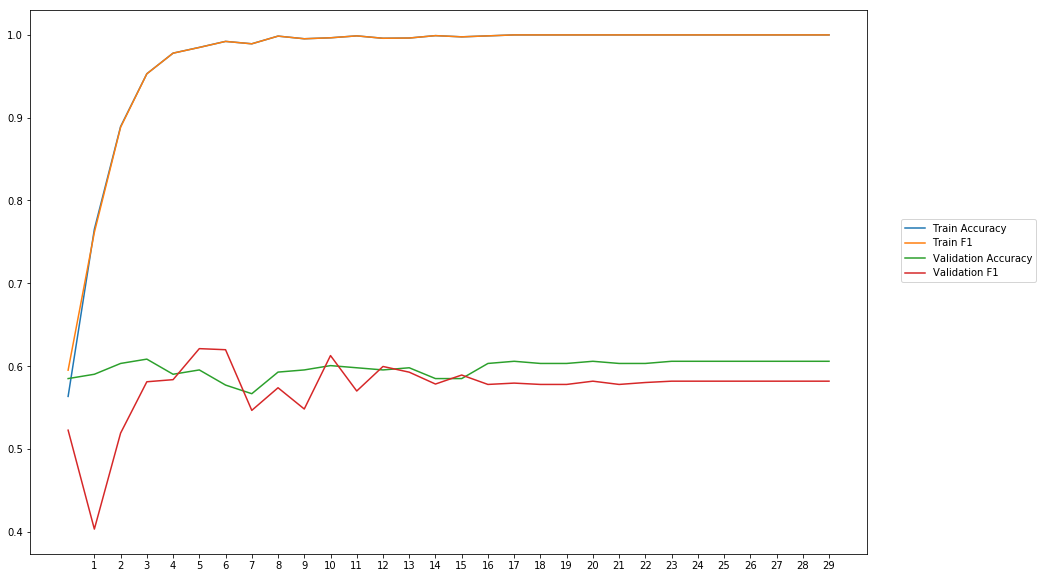

Average Accuracy: 59.77%
Average Precision: 61.17%
Average Recall: 54.68%
Average F1: 57.28%

-----Fold 6--------


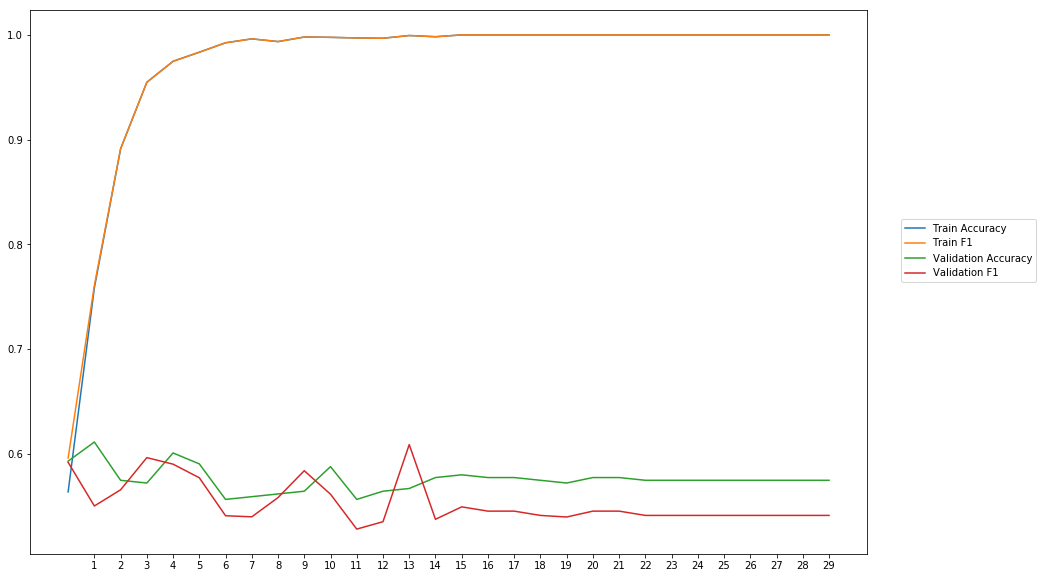

Average Accuracy: 57.54%
Average Precision: 58.29%
Average Recall: 52.90%
Average F1: 55.32%

-----Fold 7--------


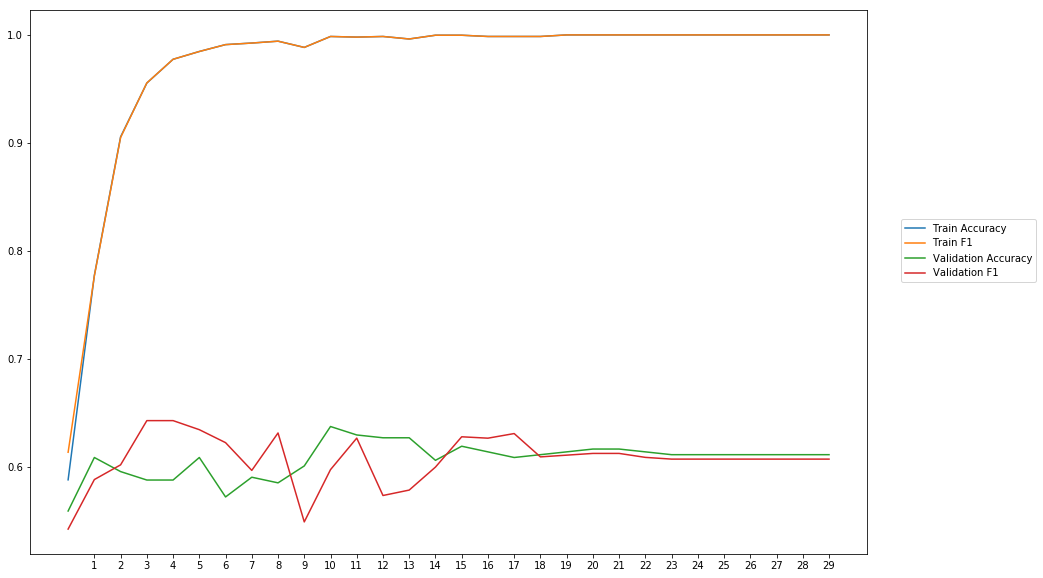

Average Accuracy: 60.69%
Average Precision: 60.78%
Average Recall: 61.19%
Average F1: 60.69%

-----Fold 8--------


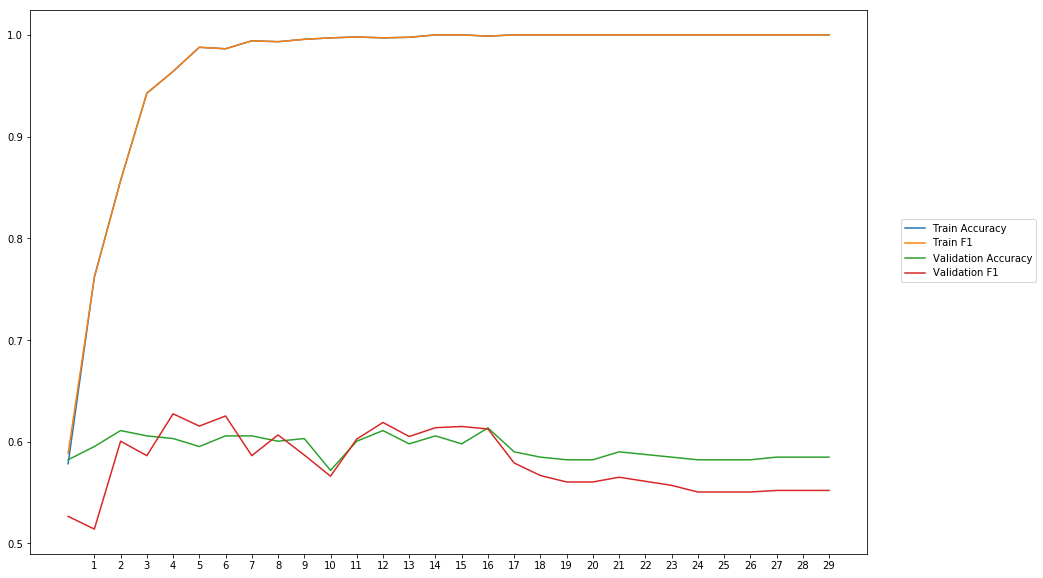

Average Accuracy: 59.36%
Average Precision: 59.89%
Average Recall: 56.37%
Average F1: 57.89%

-----Fold 9--------


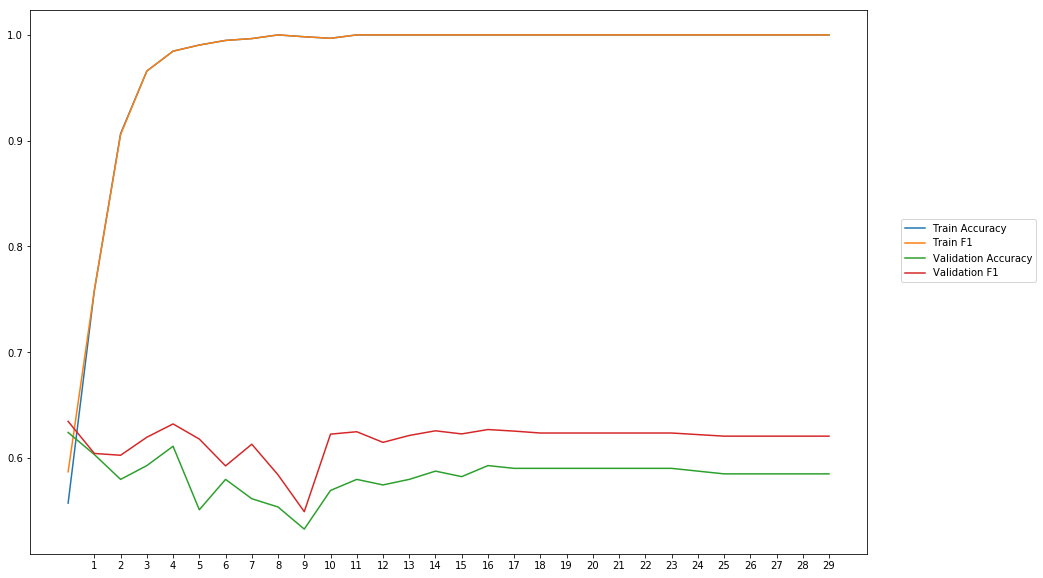

Average Accuracy: 58.32%
Average Precision: 57.01%
Average Recall: 67.26%
Average F1: 61.66%

-----Fold 10--------


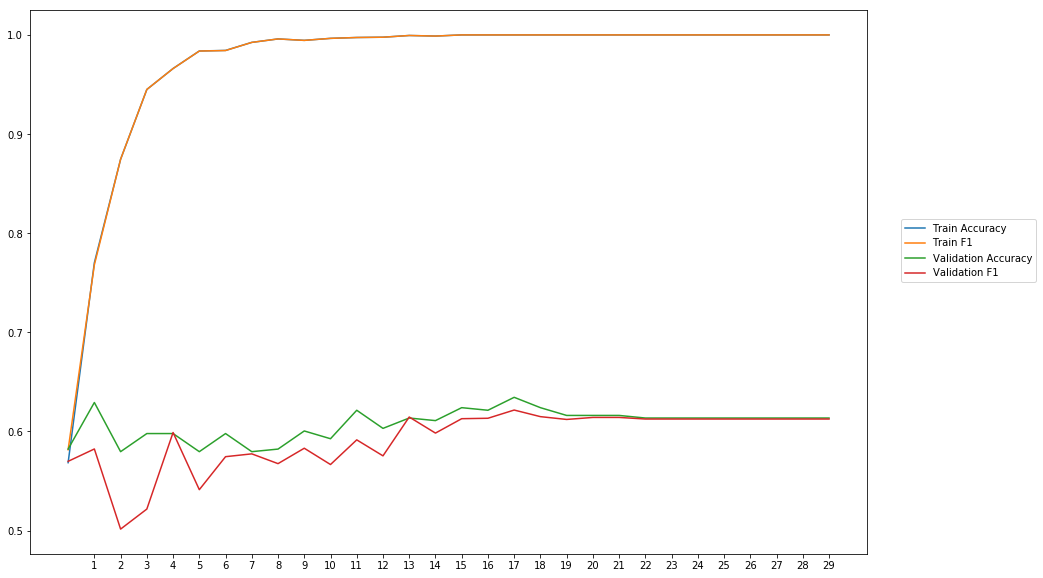

Average Accuracy: 60.77%
Average Precision: 61.47%
Average Recall: 57.42%
Average F1: 59.23%

-------Overallresults-------


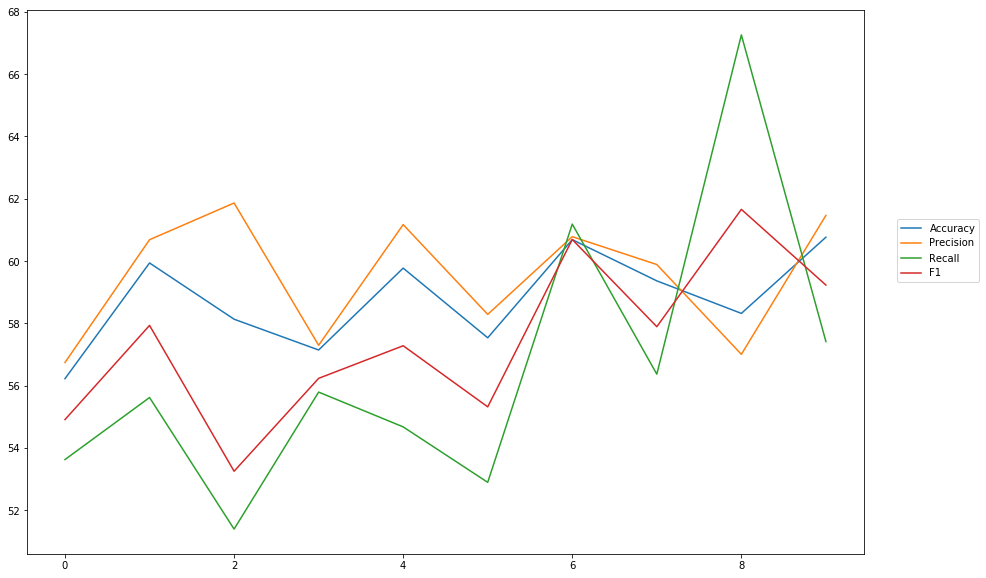

Accuracy: Mean = 58.79% (+/- 1.47%), Max = 60.77%, Min =  56.23%
Precision: Mean = 59.52% (+/- 1.89%), Max = 61.86%, Min =  56.74%
Recall: Mean = 56.62% (+/- 4.36%), Max = 67.26%, Min =  51.40%
F1: Mean = 57.44% (+/- 2.49%), Max = 61.66%, Min =  53.25%


In [11]:
cross_val(model11, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_3_400_300_200')  

## BiLSTM one BiLSTM-Layer, 500 neurons

In [ ]:
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#BiLSTM Layer
x4 = Bidirectional(LSTM(500, activation='tanh'))(embedded_sequences4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


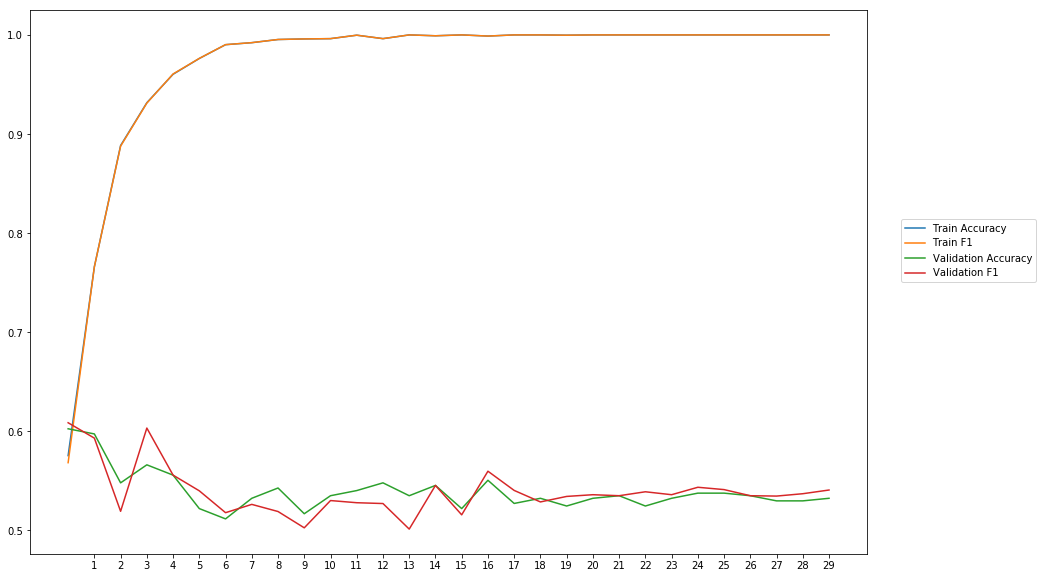

Average Accuracy: 53.95%
Average Precision: 54.10%
Average Recall: 53.85%
Average F1: 53.92%

-----Fold 2--------


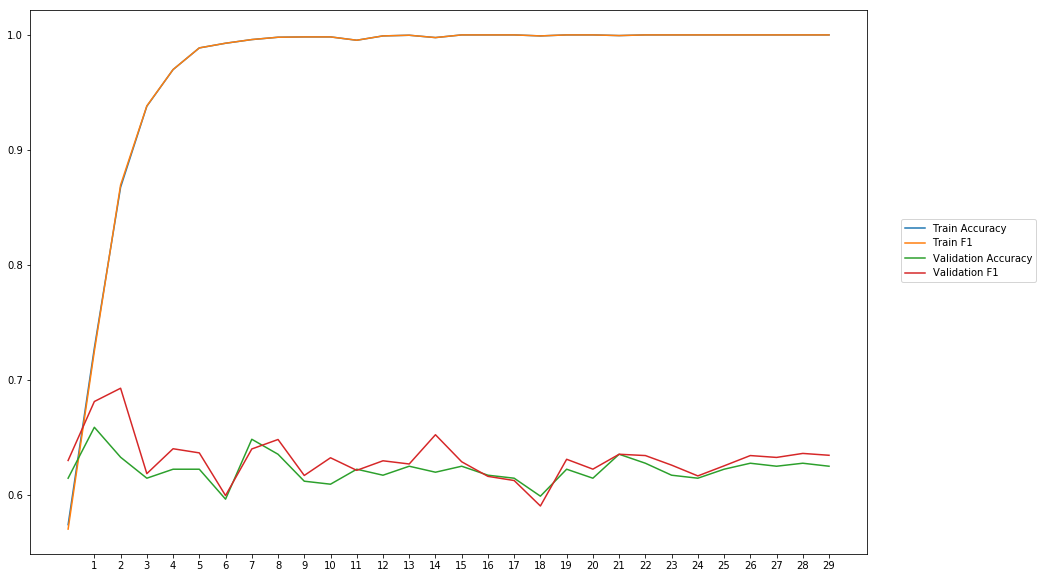

Average Accuracy: 62.22%
Average Precision: 61.95%
Average Recall: 64.56%
Average F1: 63.15%

-----Fold 3--------


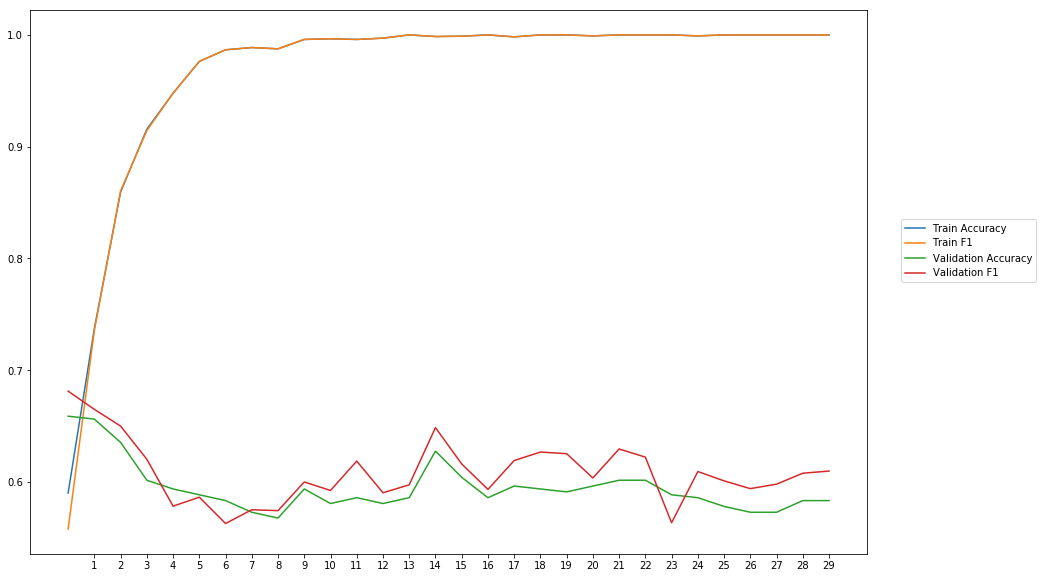

Average Accuracy: 59.50%
Average Precision: 59.16%
Average Recall: 62.85%
Average F1: 60.87%

-----Fold 4--------


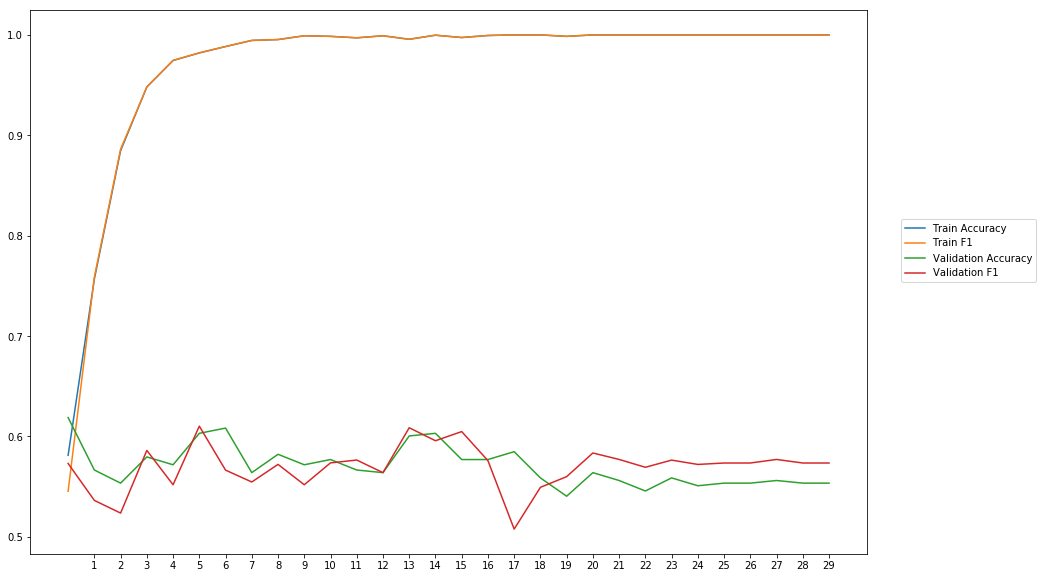

Average Accuracy: 57.05%
Average Precision: 57.44%
Average Recall: 56.91%
Average F1: 56.98%

-----Fold 5--------


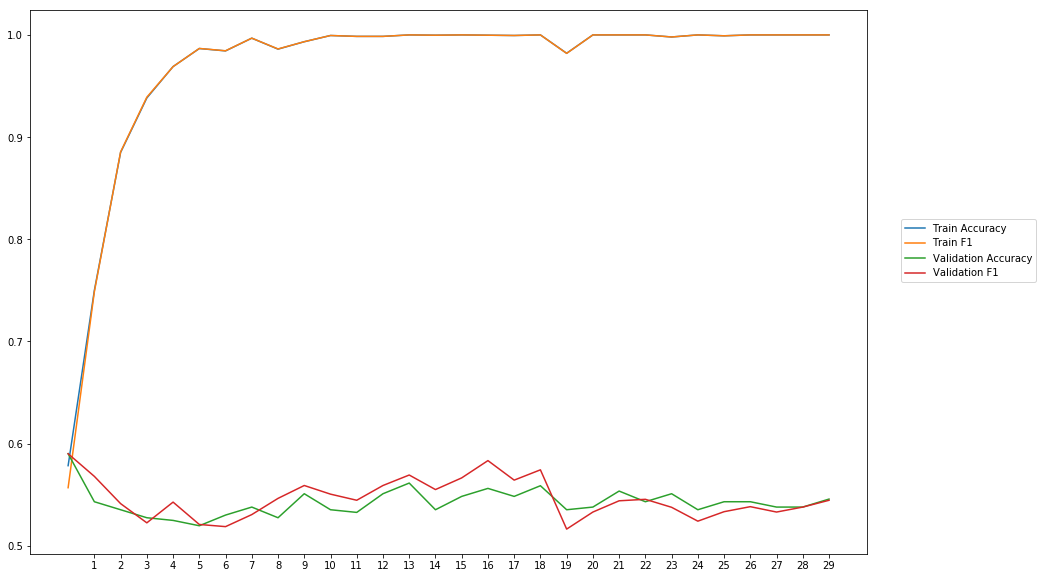

Average Accuracy: 54.26%
Average Precision: 54.32%
Average Recall: 55.05%
Average F1: 54.65%

-----Fold 6--------


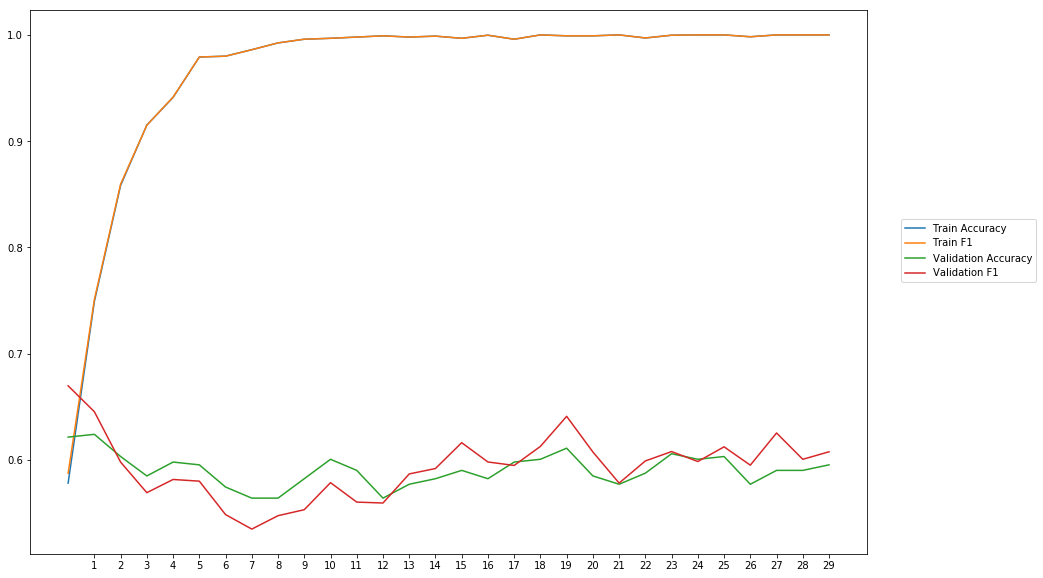

Average Accuracy: 59.06%
Average Precision: 59.06%
Average Recall: 59.90%
Average F1: 59.33%

-----Fold 7--------


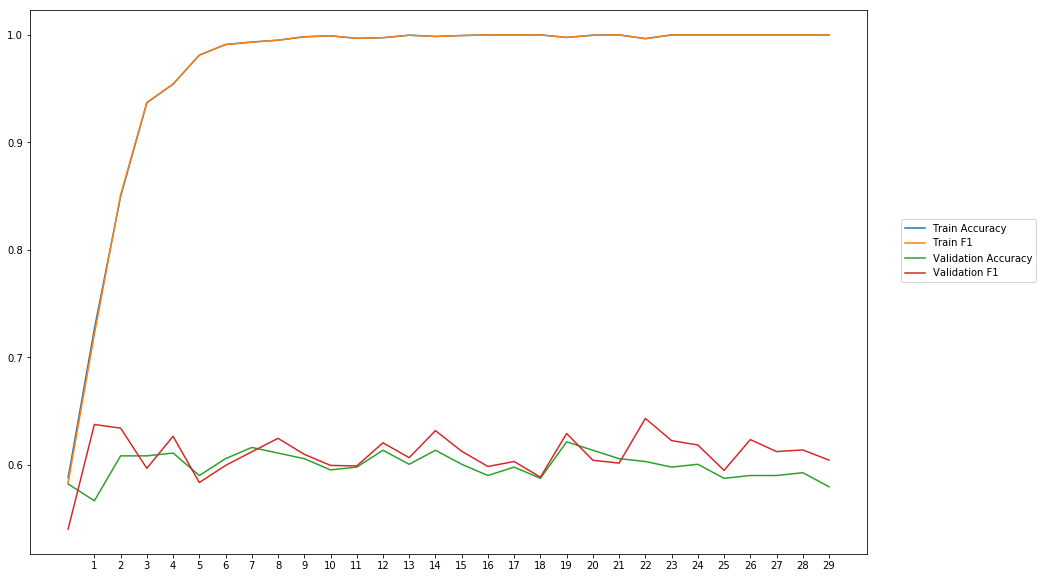

Average Accuracy: 59.95%
Average Precision: 59.67%
Average Recall: 62.62%
Average F1: 60.98%

-----Fold 8--------


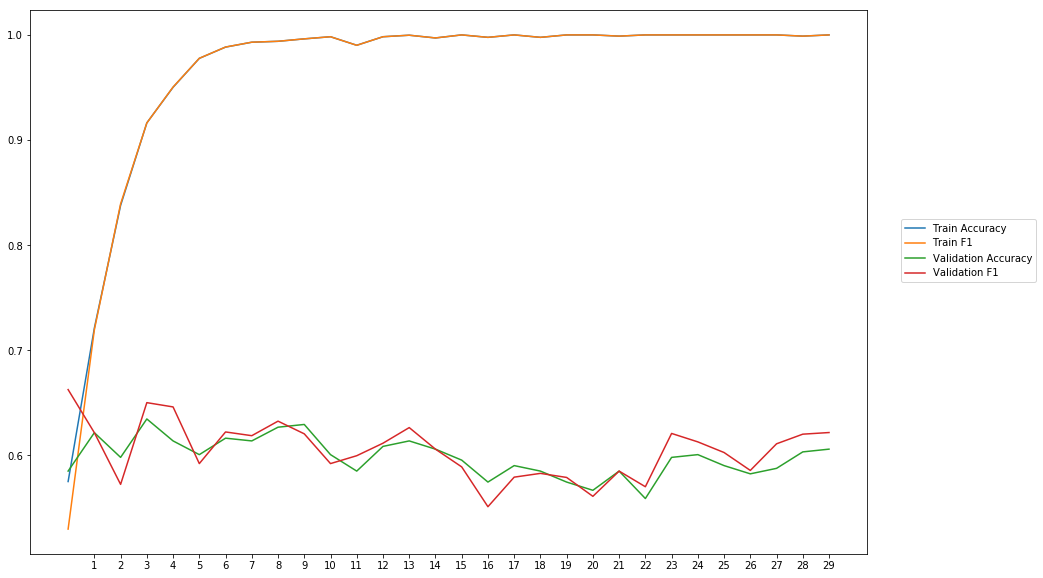

Average Accuracy: 59.83%
Average Precision: 59.69%
Average Recall: 61.55%
Average F1: 60.47%

-----Fold 9--------


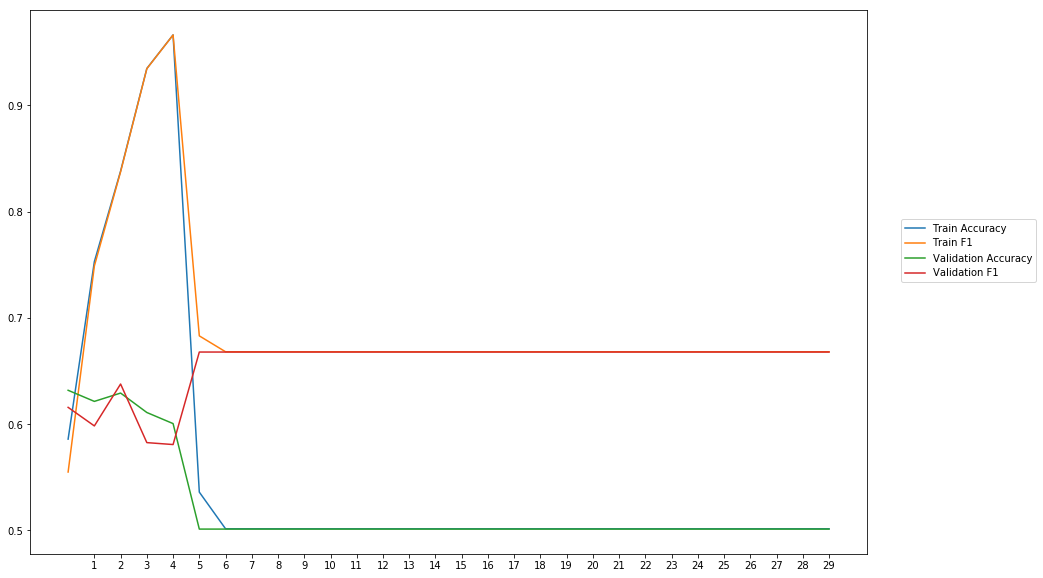

Average Accuracy: 52.09%
Average Precision: 52.28%
Average Recall: 92.99%
Average F1: 65.70%

-----Fold 10--------


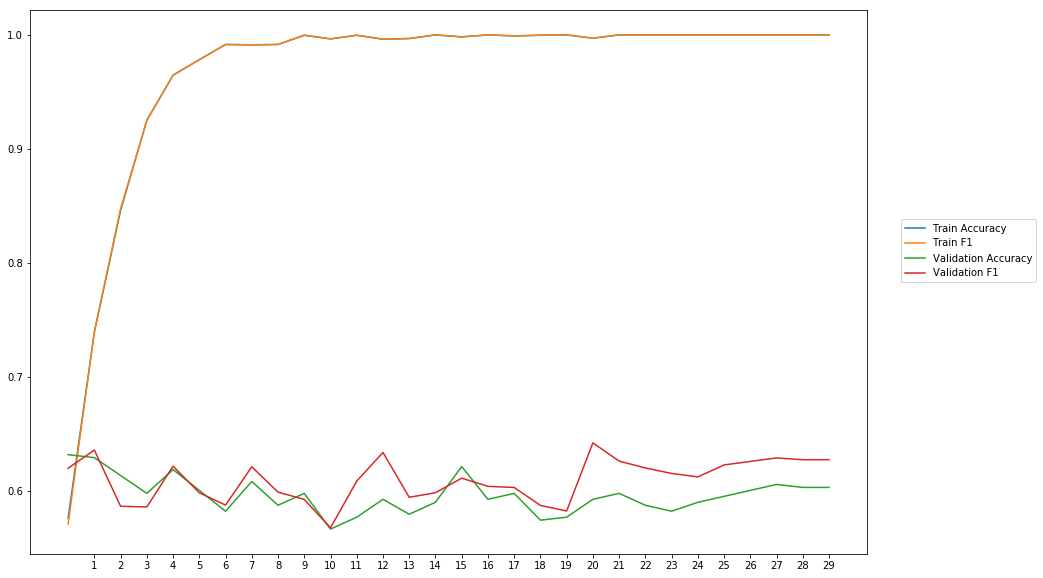

Average Accuracy: 59.65%
Average Precision: 59.28%
Average Recall: 62.99%
Average F1: 60.96%

-------Overallresults-------


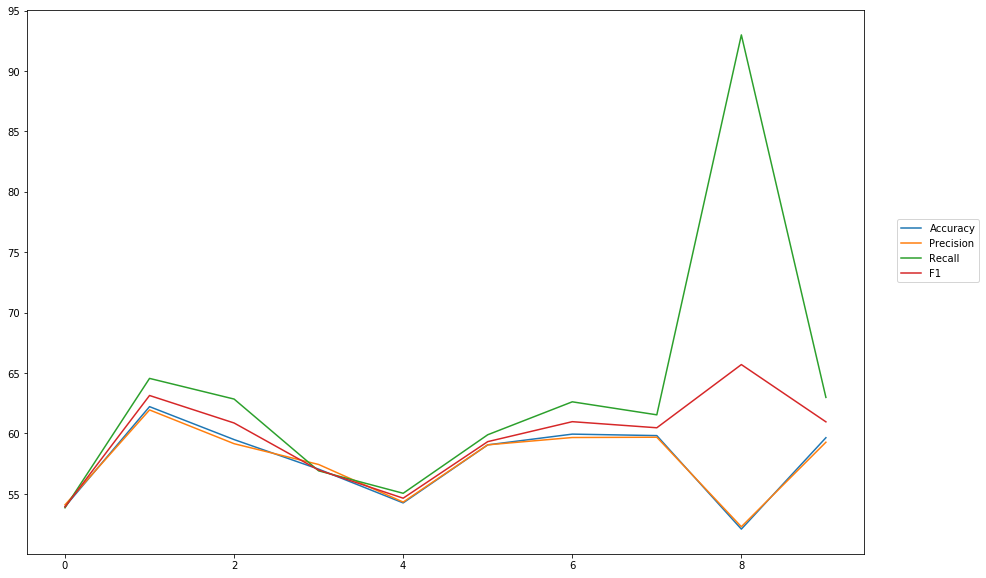

Accuracy: Mean = 57.75% (+/- 3.11%), Max = 62.22%, Min =  52.09%
Precision: Mean = 57.69% (+/- 2.93%), Max = 61.95%, Min =  52.28%
Recall: Mean = 63.33% (+/- 10.47%), Max = 92.99%, Min =  53.85%
F1: Mean = 59.70% (+/- 3.46%), Max = 65.70%, Min =  53.92%


In [9]:
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_500')  

## BiLSTM one BiLSTM-layer, 300 neurons

In [ ]:
wv_layer6 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences6 = wv_layer6(comment_input6)

#BiLSTM Layer
x6 = Bidirectional(LSTM(300, activation='tanh'))(embedded_sequences6)

#Output (Dense) Layer
preds6 = Dense(2, activation='softmax')(x6)

# build the model
model6 = Model(inputs=[comment_input6], outputs=preds6)


-----Fold 1--------


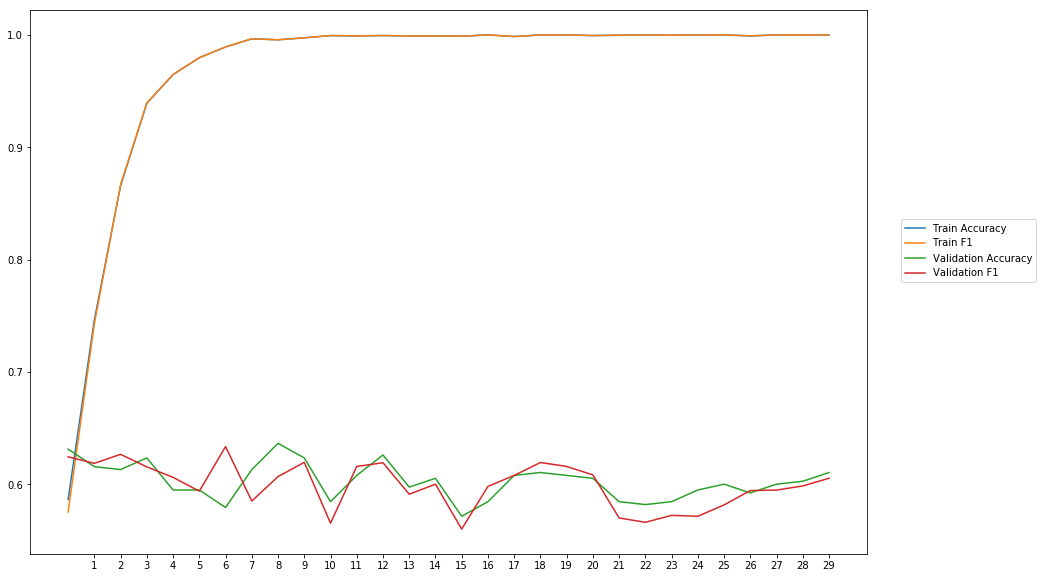

Average Accuracy: 60.28%
Average Precision: 60.67%
Average Recall: 59.41%
Average F1: 59.94%

-----Fold 2--------


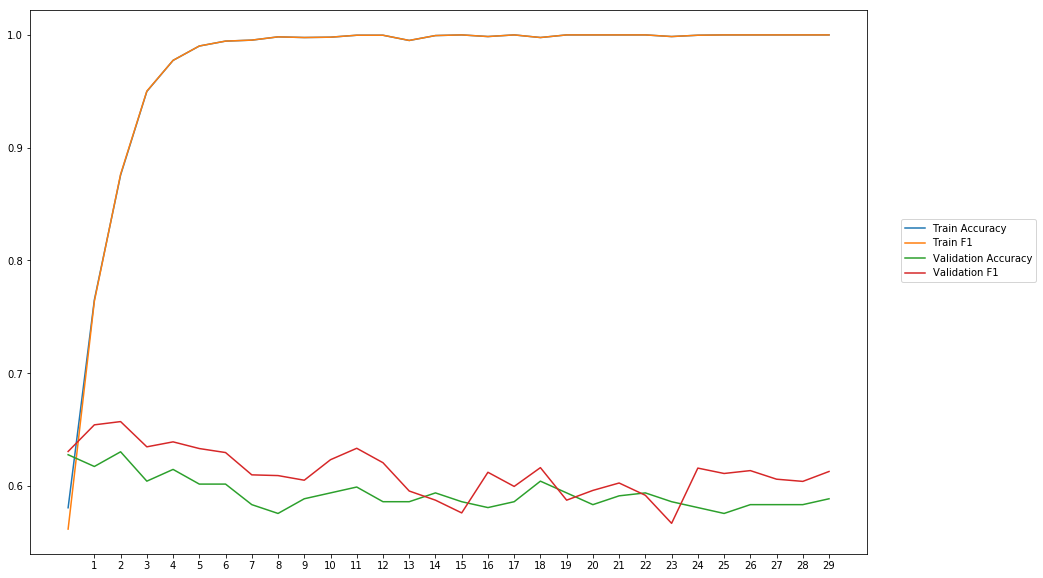

Average Accuracy: 59.34%
Average Precision: 58.80%
Average Recall: 64.08%
Average F1: 61.24%

-----Fold 3--------


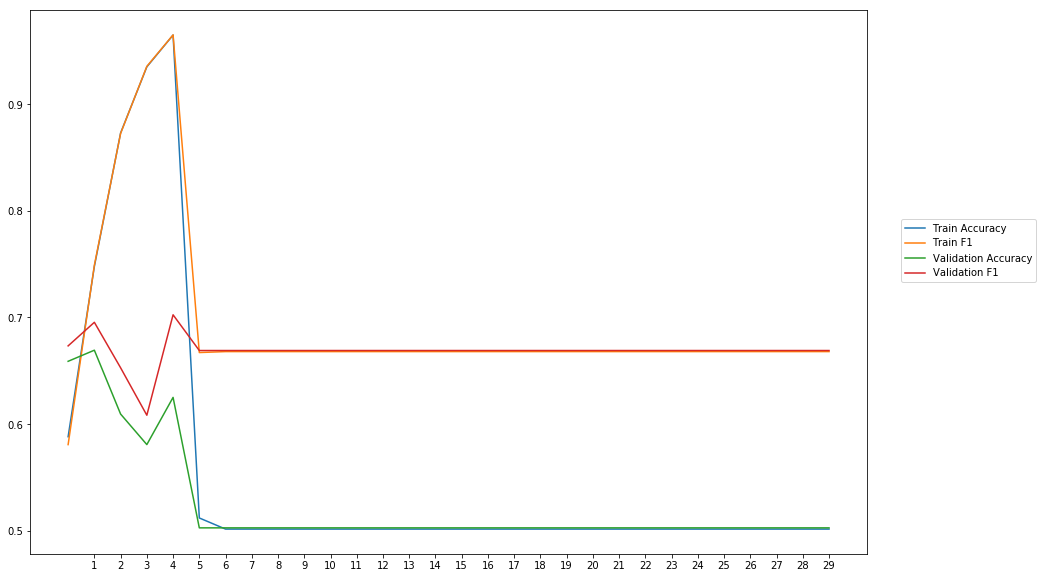

Average Accuracy: 52.36%
Average Precision: 52.03%
Average Recall: 95.70%
Average F1: 66.86%

-----Fold 4--------


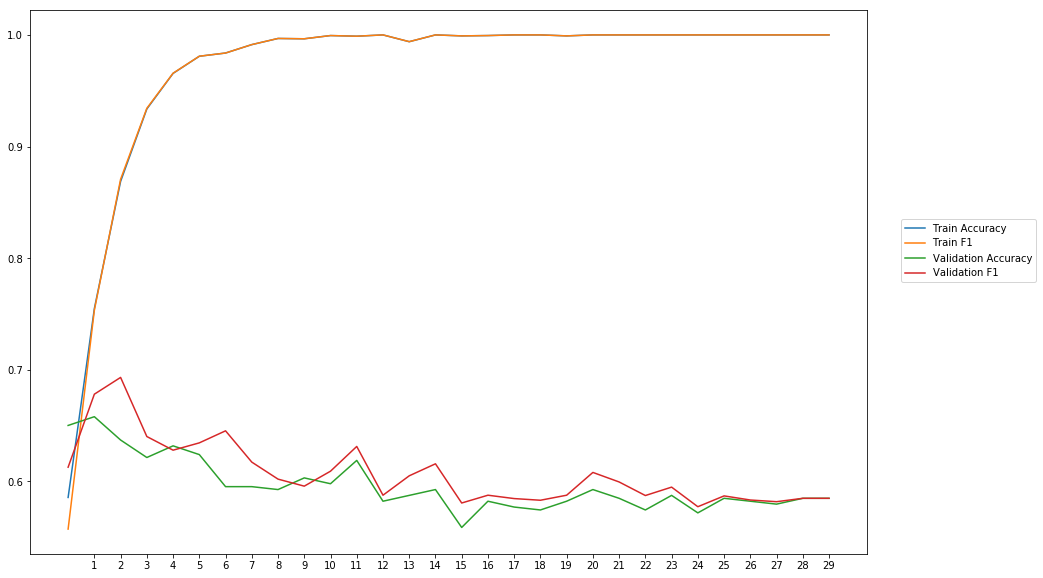

Average Accuracy: 59.63%
Average Precision: 59.33%
Average Recall: 62.38%
Average F1: 60.69%

-----Fold 5--------


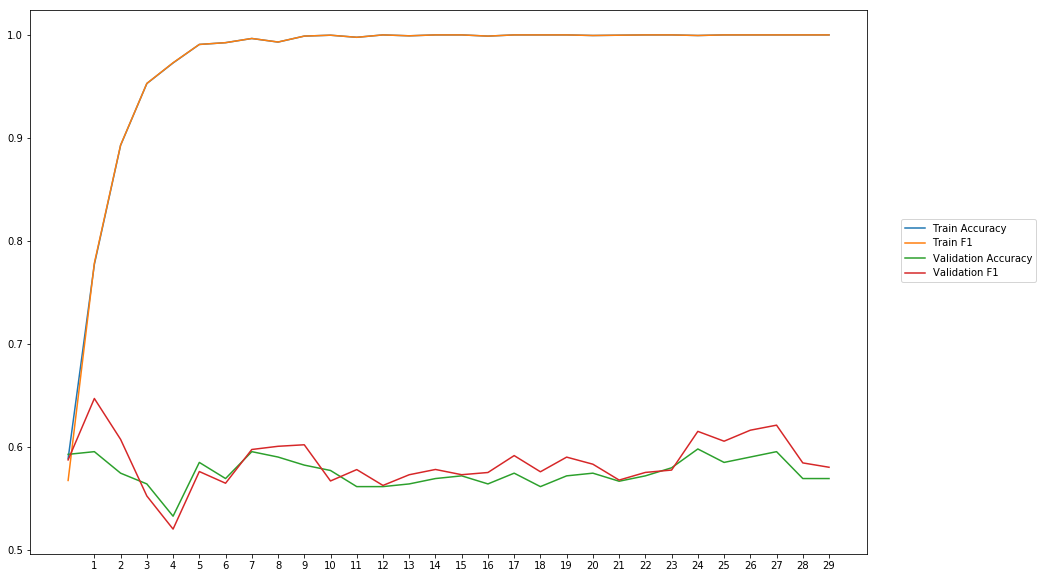

Average Accuracy: 57.52%
Average Precision: 57.30%
Average Recall: 59.84%
Average F1: 58.48%

-----Fold 6--------


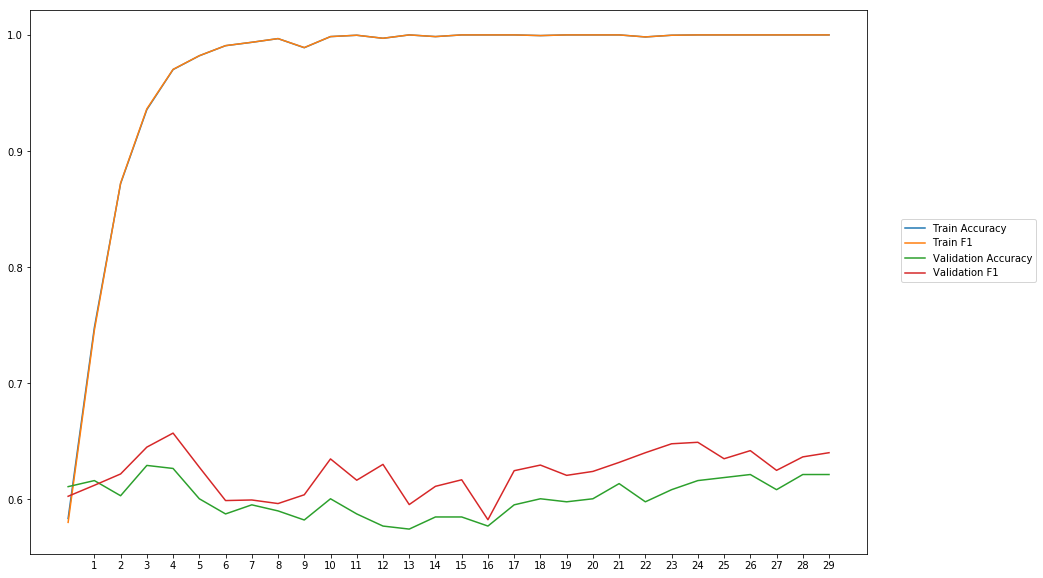

Average Accuracy: 60.17%
Average Precision: 59.29%
Average Recall: 65.85%
Average F1: 62.33%

-----Fold 7--------


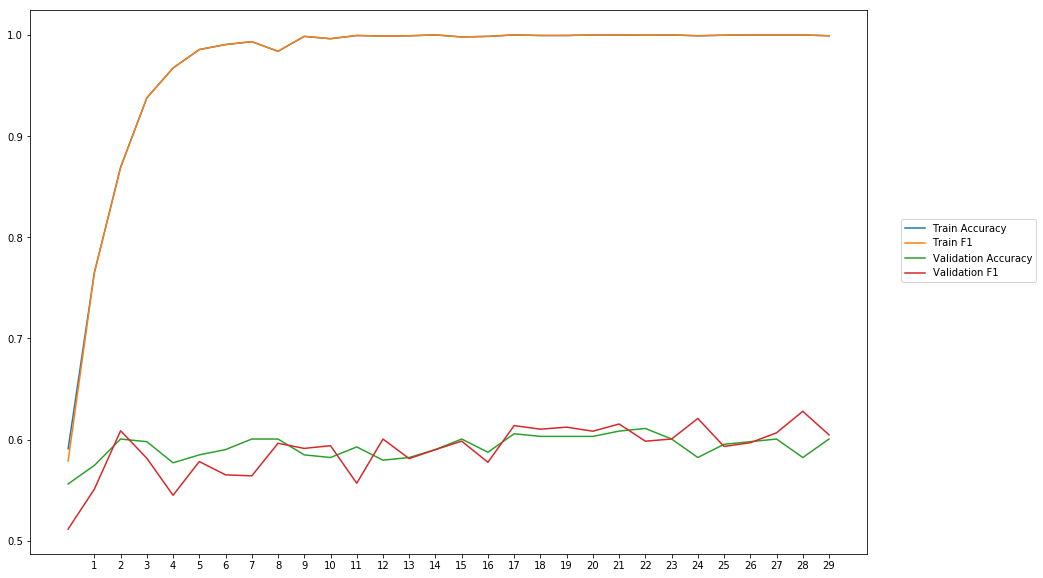

Average Accuracy: 59.25%
Average Precision: 59.54%
Average Recall: 58.73%
Average F1: 59.00%

-----Fold 8--------


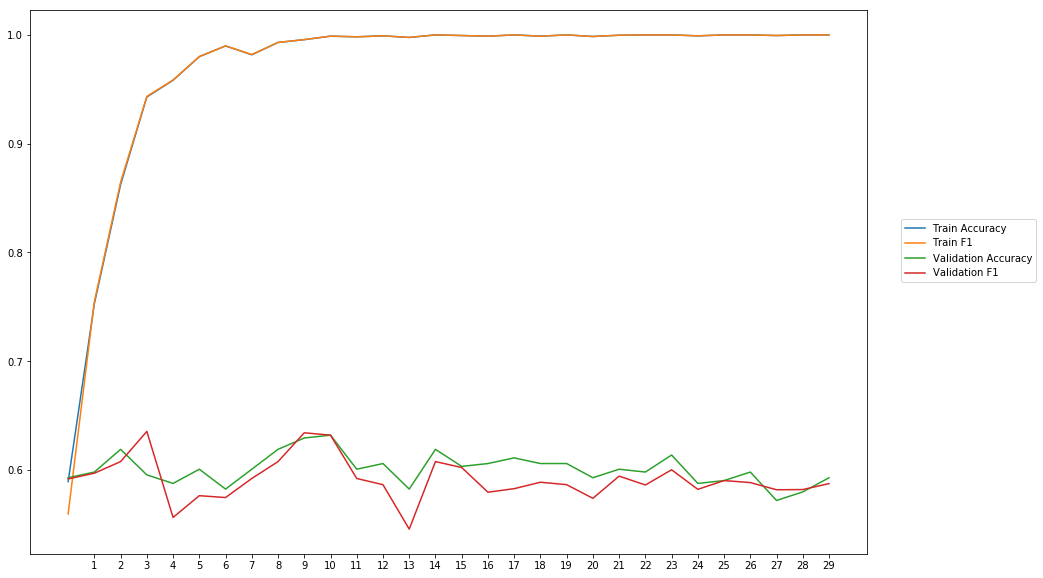

Average Accuracy: 60.06%
Average Precision: 60.74%
Average Recall: 57.74%
Average F1: 59.13%

-----Fold 9--------


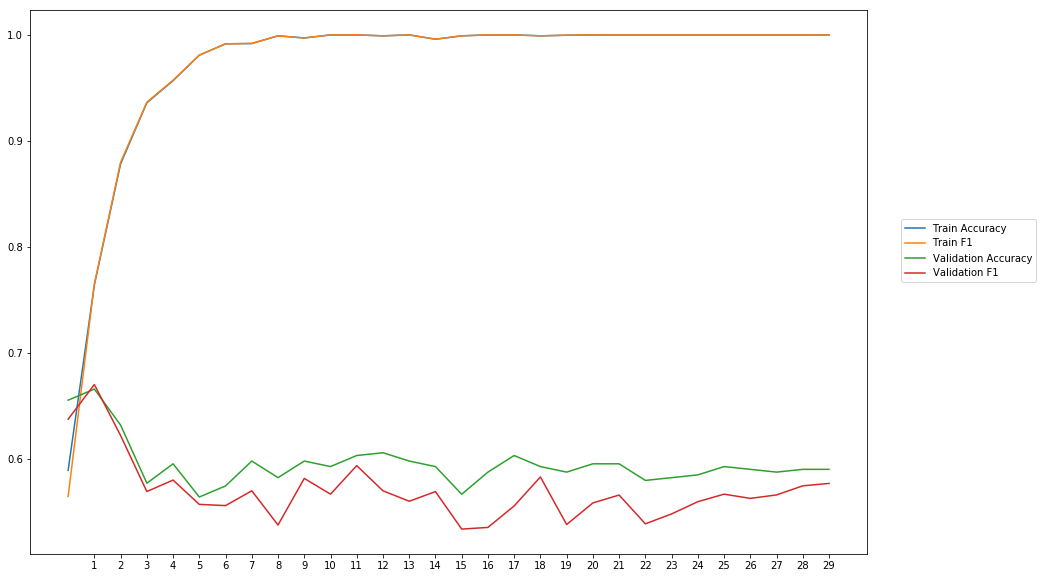

Average Accuracy: 59.53%
Average Precision: 60.95%
Average Recall: 53.66%
Average F1: 57.01%

-----Fold 10--------


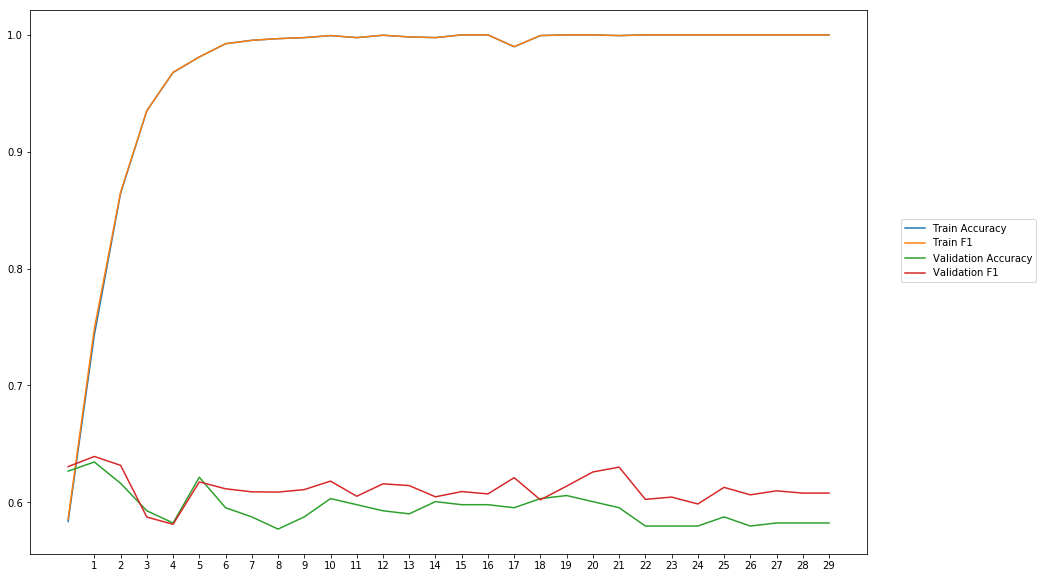

Average Accuracy: 59.51%
Average Precision: 58.98%
Average Recall: 63.58%
Average F1: 61.15%

-------Overallresults-------


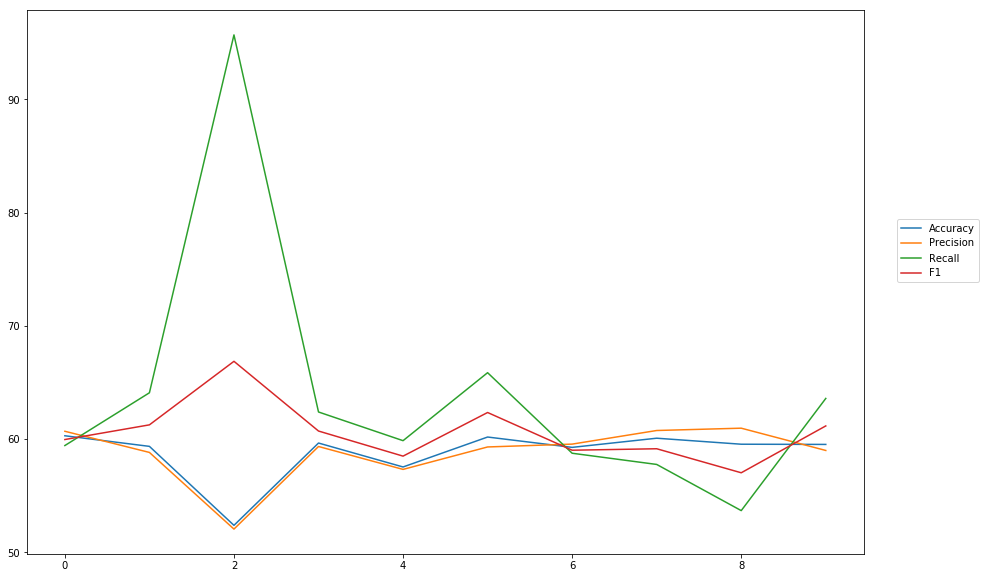

Accuracy: Mean = 58.77% (+/- 2.26%), Max = 60.28%, Min =  52.36%
Precision: Mean = 58.76% (+/- 2.47%), Max = 60.95%, Min =  52.03%
Recall: Mean = 64.10% (+/- 11.06%), Max = 95.70%, Min =  53.66%
F1: Mean = 60.58% (+/- 2.56%), Max = 66.86%, Min =  57.01%


In [11]:
cross_val(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_300')  

## BiLSTM one BiLSTM, 200 Neurons

In [ ]:
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences7 = wv_layer7(comment_input7)

#BiLSTM Layer
x7 = Bidirectional(LSTM(200, activation='tanh'))(embedded_sequences7)

#Output (Dense) Layer
preds7 = Dense(2, activation='softmax')(x7)

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)


-----Fold 1--------


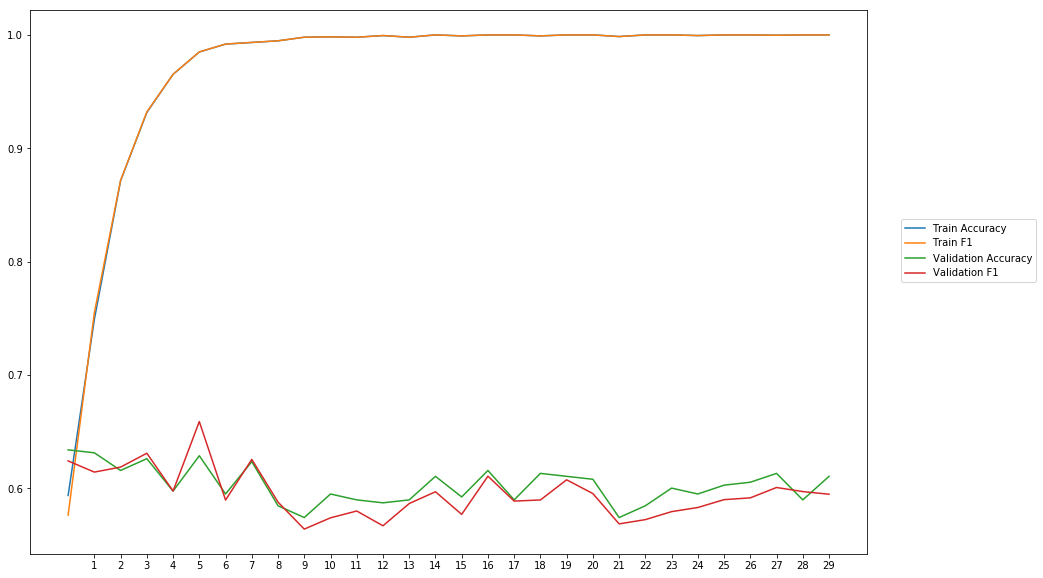

Average Accuracy: 60.28%
Average Precision: 60.84%
Average Recall: 58.36%
Average F1: 59.52%

-----Fold 2--------


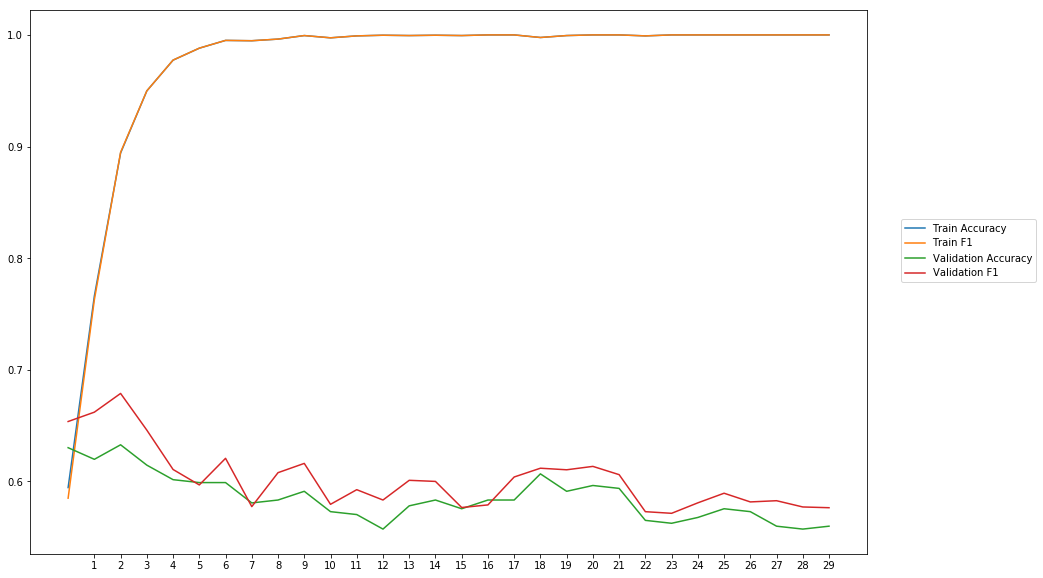

Average Accuracy: 58.55%
Average Precision: 58.13%
Average Recall: 62.56%
Average F1: 60.20%

-----Fold 3--------


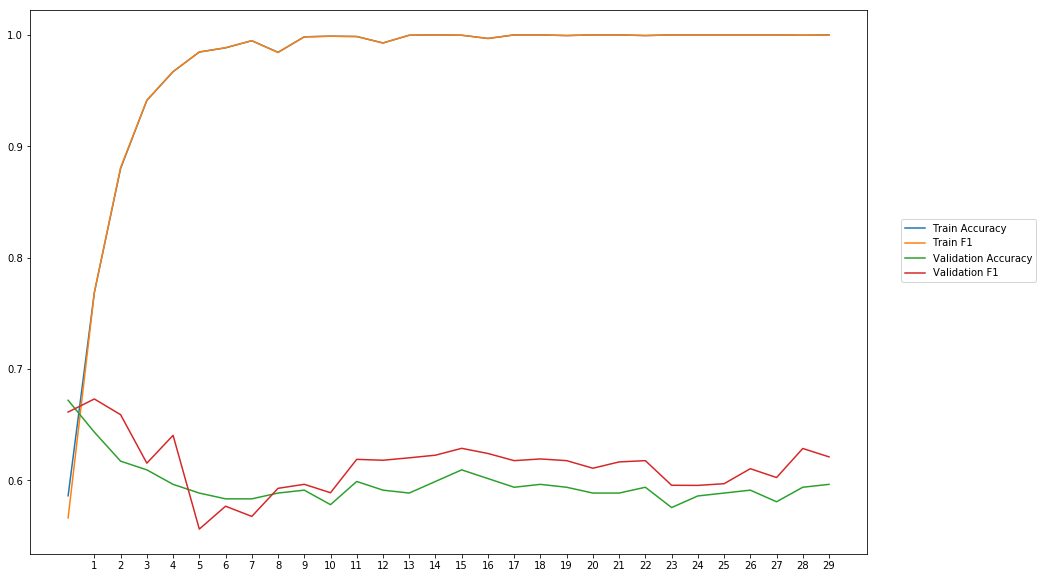

Average Accuracy: 59.69%
Average Precision: 59.23%
Average Recall: 63.89%
Average F1: 61.37%

-----Fold 4--------


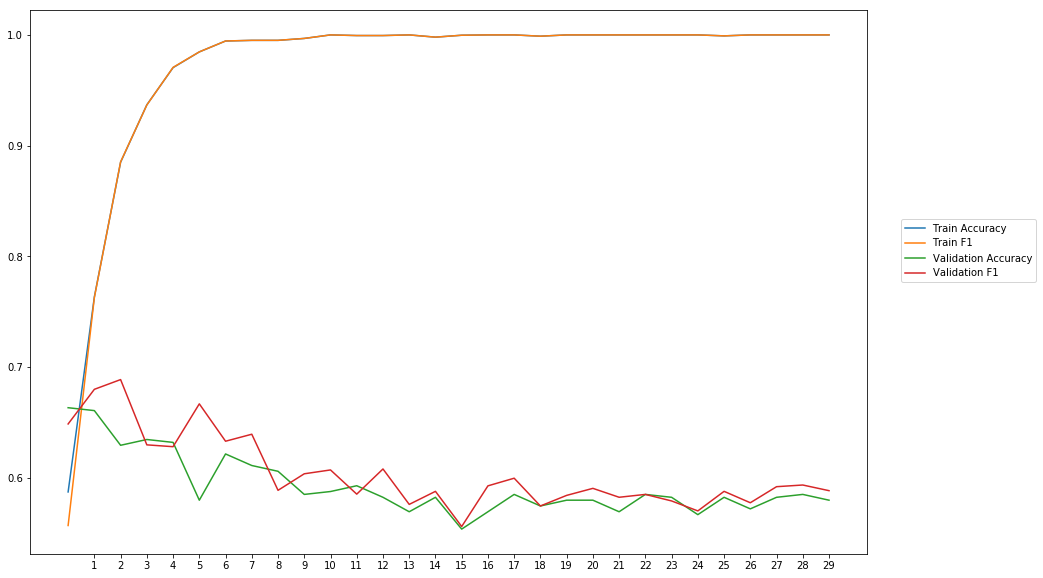

Average Accuracy: 59.27%
Average Precision: 58.97%
Average Recall: 62.26%
Average F1: 60.40%

-----Fold 5--------


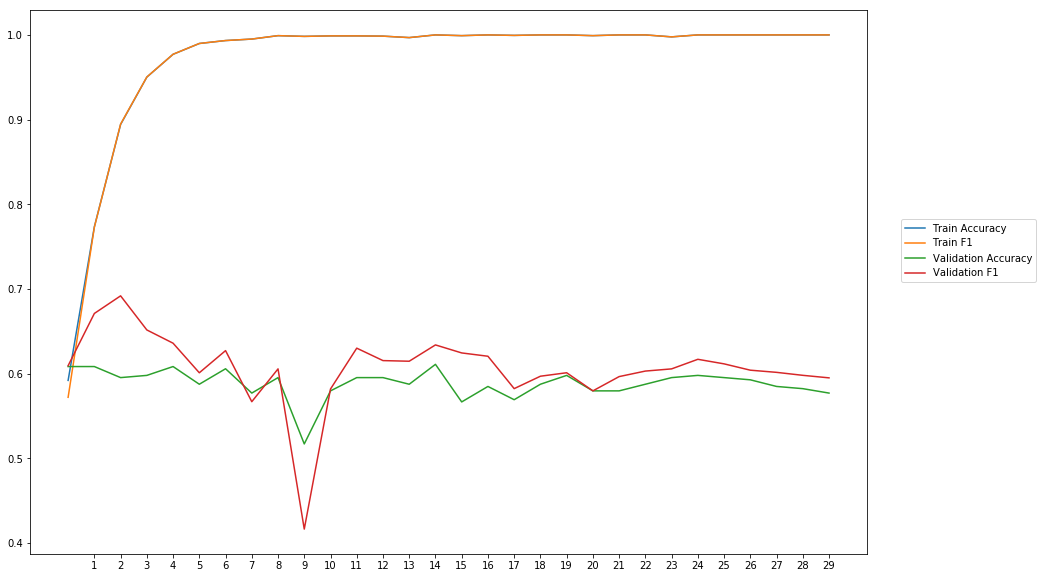

Average Accuracy: 58.83%
Average Precision: 58.11%
Average Recall: 64.01%
Average F1: 60.63%

-----Fold 6--------


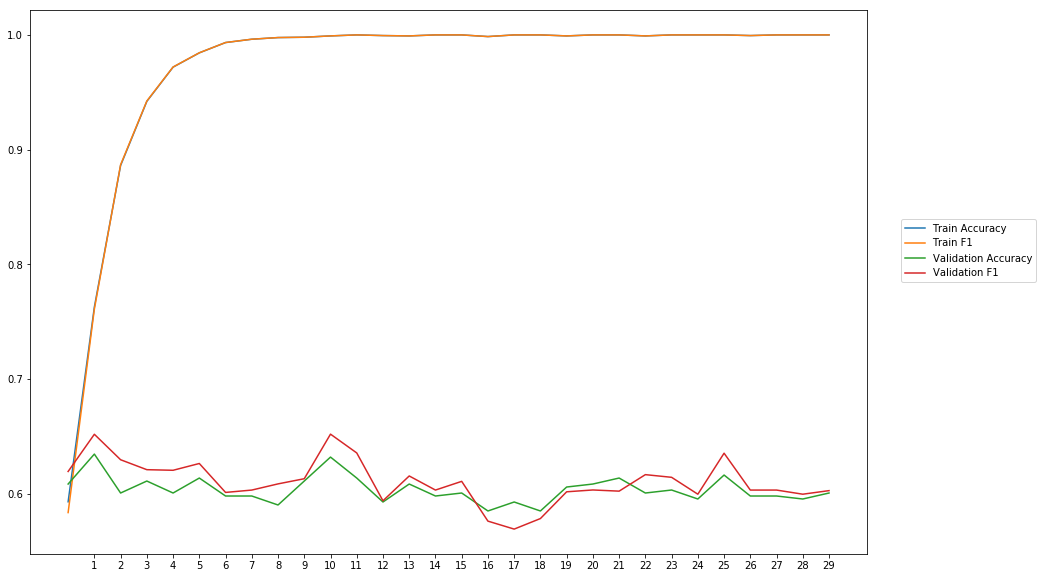

Average Accuracy: 60.36%
Average Precision: 60.15%
Average Recall: 62.03%
Average F1: 61.03%

-----Fold 7--------


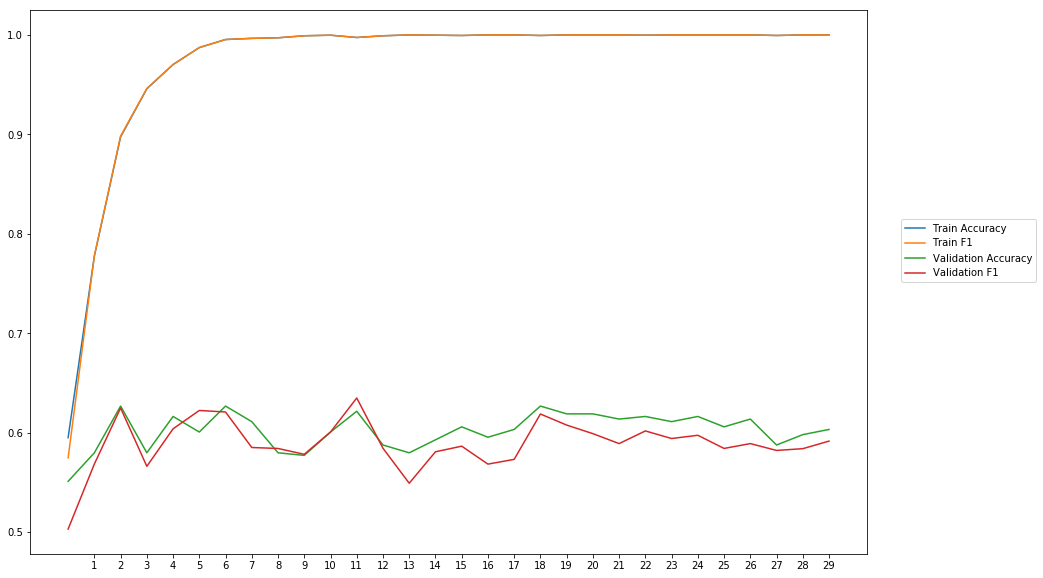

Average Accuracy: 60.21%
Average Precision: 61.07%
Average Recall: 57.00%
Average F1: 58.90%

-----Fold 8--------


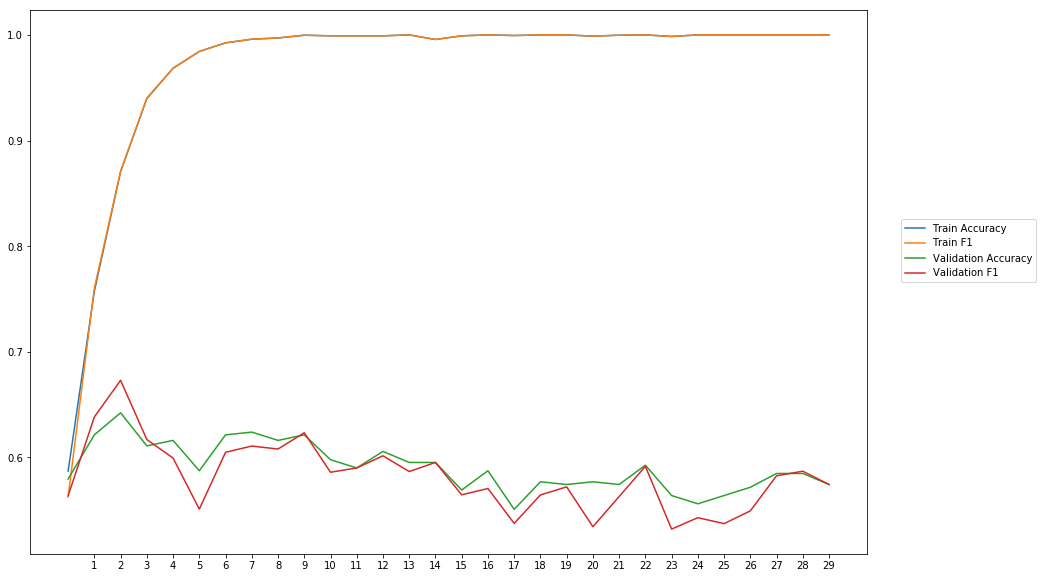

Average Accuracy: 59.09%
Average Precision: 59.60%
Average Recall: 56.98%
Average F1: 58.18%

-----Fold 9--------


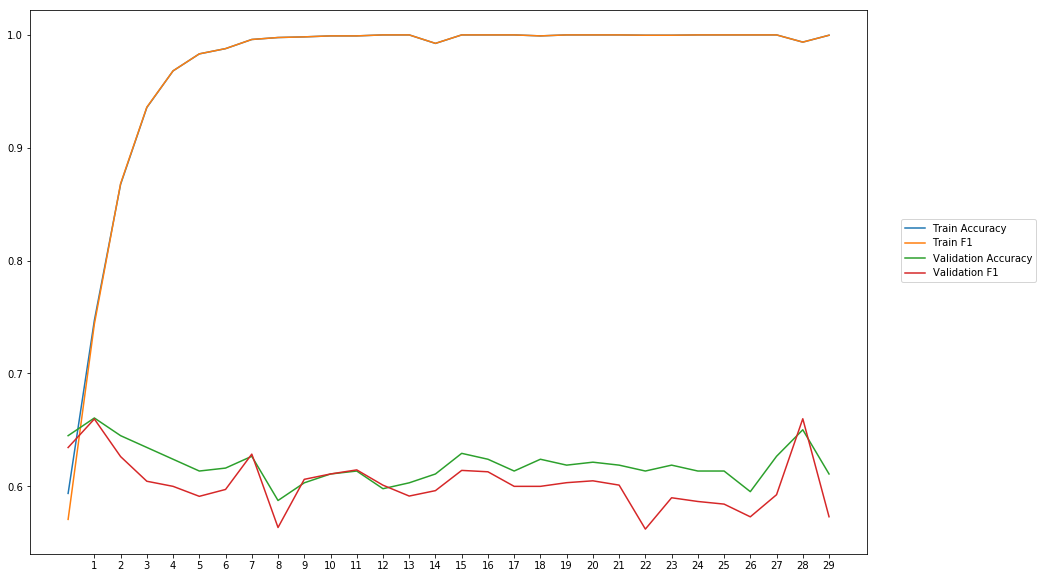

Average Accuracy: 61.95%
Average Precision: 63.24%
Average Recall: 57.73%
Average F1: 60.28%

-----Fold 10--------


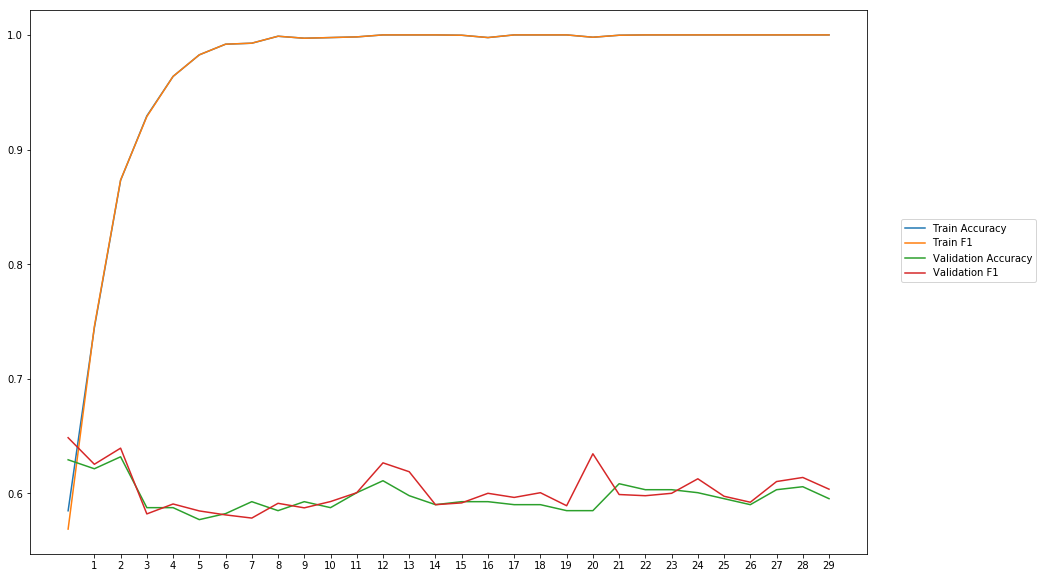

Average Accuracy: 59.71%
Average Precision: 59.61%
Average Recall: 61.01%
Average F1: 60.25%

-------Overallresults-------


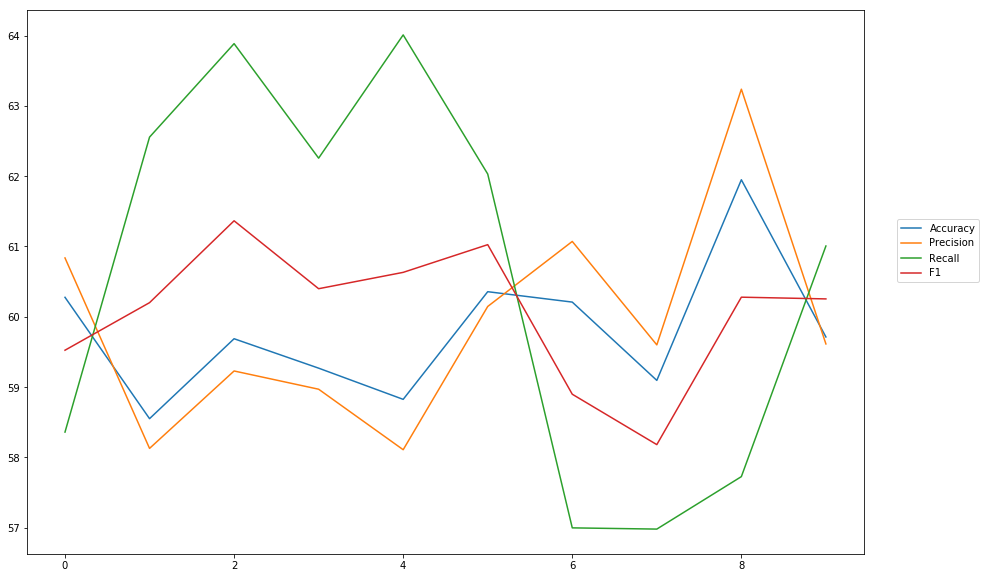

Accuracy: Mean = 59.79% (+/- 0.93%), Max = 61.95%, Min =  58.55%
Precision: Mean = 59.89% (+/- 1.46%), Max = 63.24%, Min =  58.11%
Recall: Mean = 60.58% (+/- 2.66%), Max = 64.01%, Min =  56.98%
F1: Mean = 60.08% (+/- 0.91%), Max = 61.37%, Min =  58.18%


In [12]:
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_200')  

## BiLSTM one BiLSTM-layer, 100 neurons

In [ ]:
wv_layer8 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences8 = wv_layer8(comment_input8)

#BiLSTM Layer
x8 = Bidirectional(LSTM(100, activation='tanh'))(embedded_sequences8)

#Output (Dense) Layer
preds8 = Dense(2, activation='softmax')(x8)

# build the model
model8 = Model(inputs=[comment_input8], outputs=preds8)


-----Fold 1--------


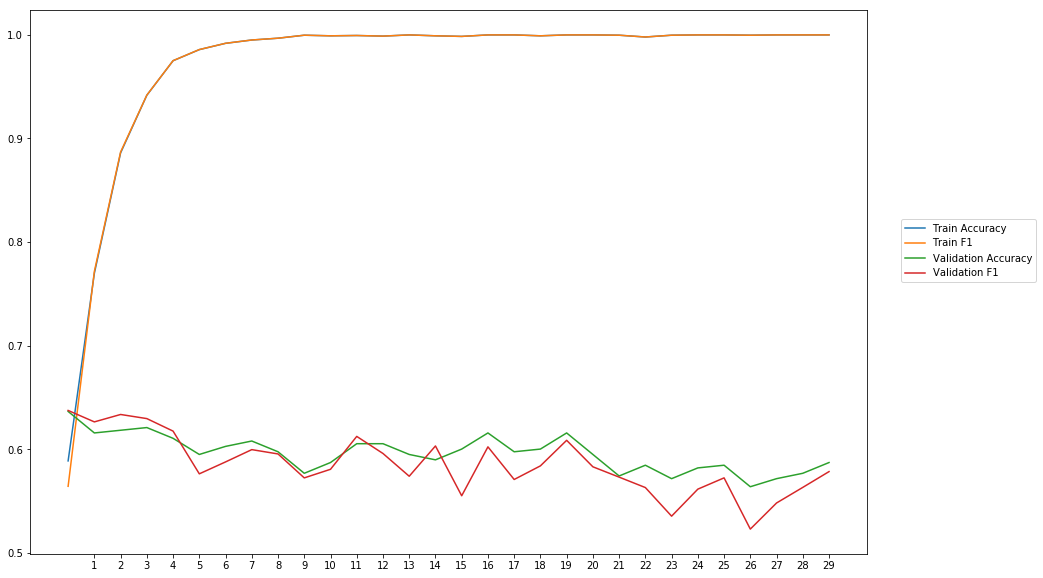

Average Accuracy: 59.60%
Average Precision: 60.24%
Average Recall: 57.06%
Average F1: 58.53%

-----Fold 2--------


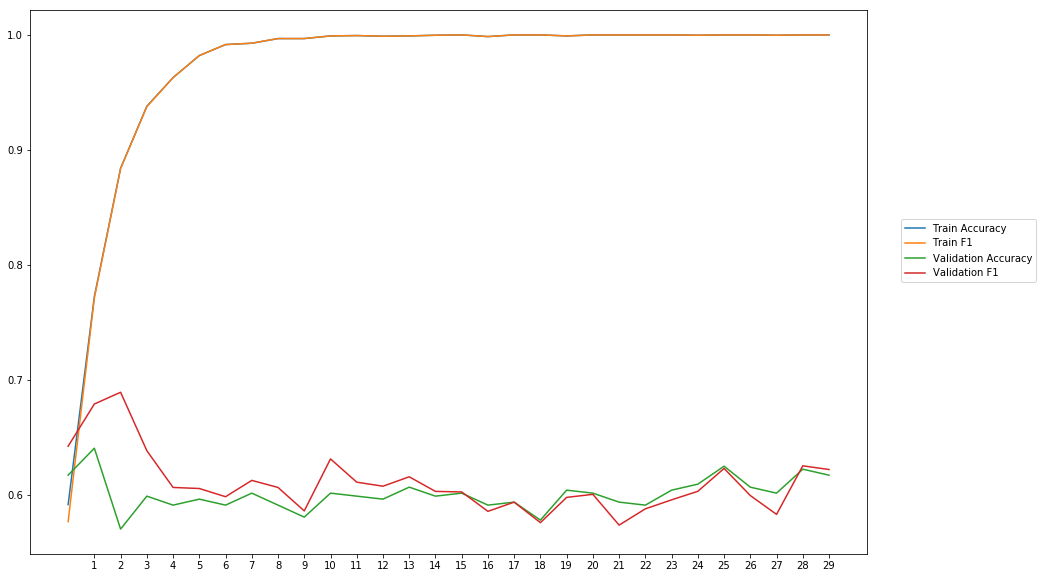

Average Accuracy: 60.08%
Average Precision: 60.00%
Average Recall: 62.57%
Average F1: 61.01%

-----Fold 3--------


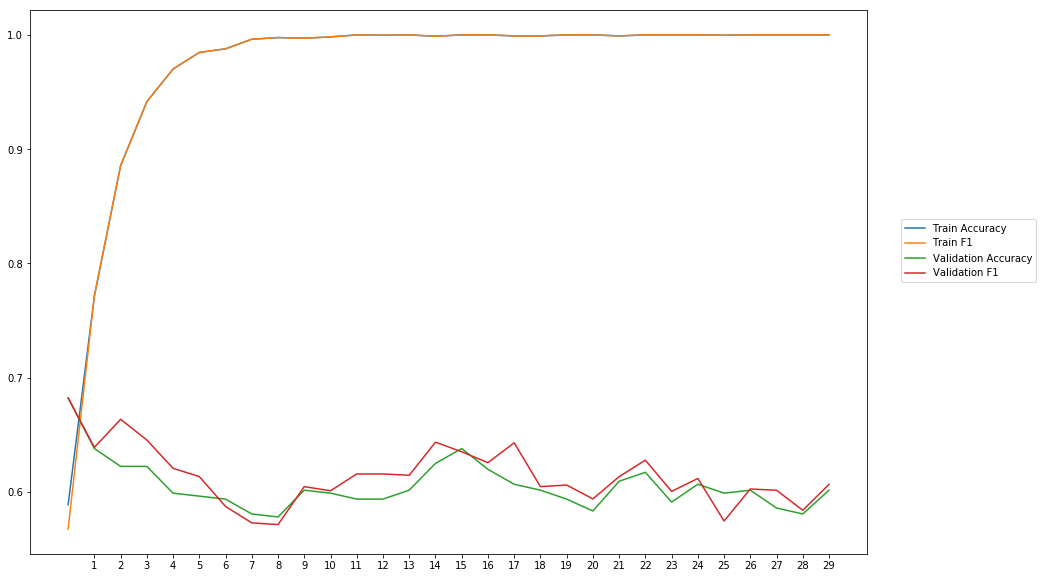

Average Accuracy: 60.55%
Average Precision: 60.41%
Average Recall: 62.59%
Average F1: 61.41%

-----Fold 4--------


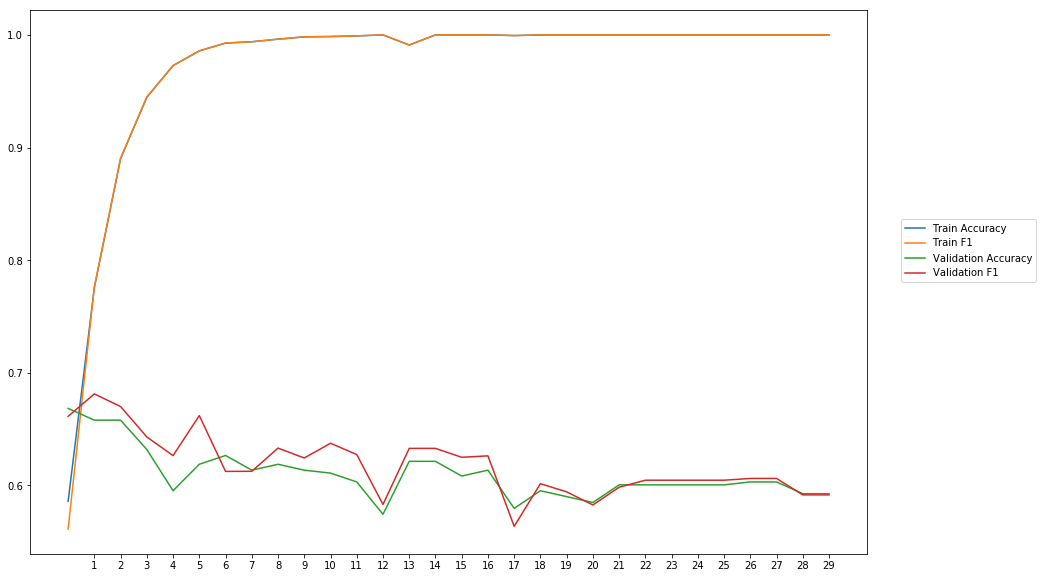

Average Accuracy: 61.00%
Average Precision: 60.69%
Average Recall: 63.14%
Average F1: 61.82%

-----Fold 5--------


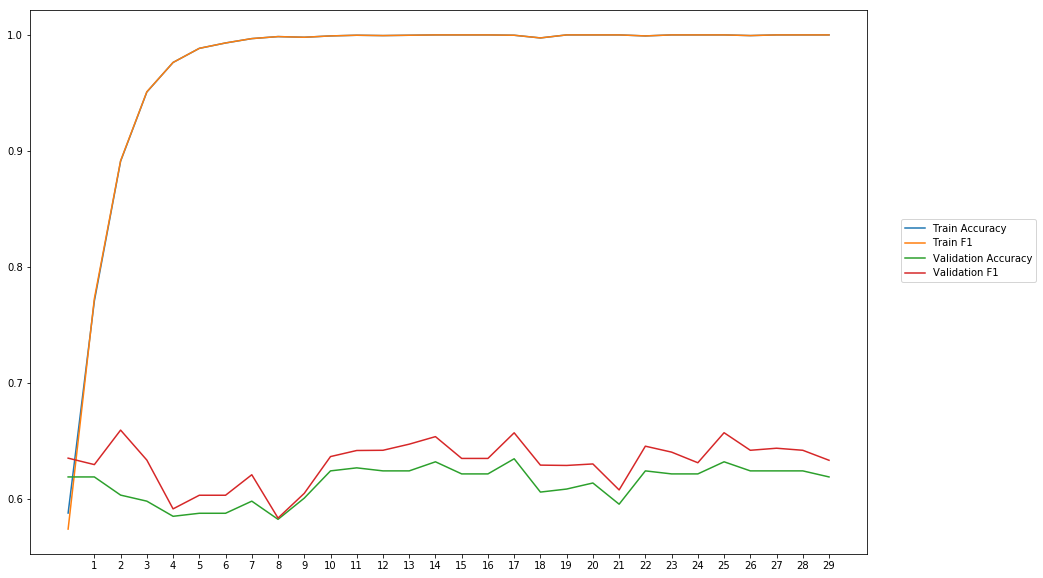

Average Accuracy: 61.33%
Average Precision: 60.46%
Average Recall: 66.13%
Average F1: 63.13%

-----Fold 6--------


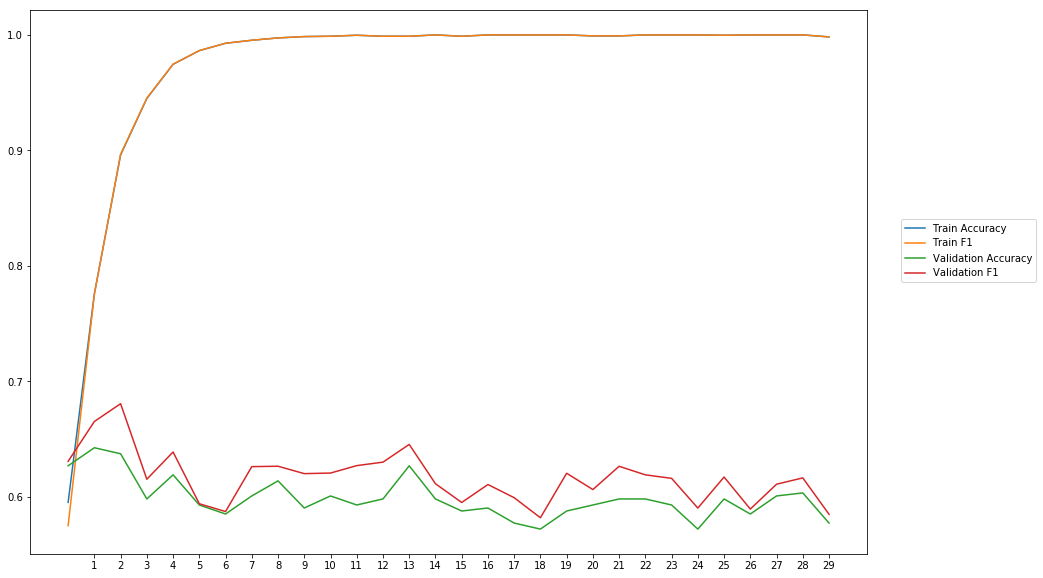

Average Accuracy: 59.83%
Average Precision: 59.10%
Average Recall: 64.53%
Average F1: 61.65%

-----Fold 7--------


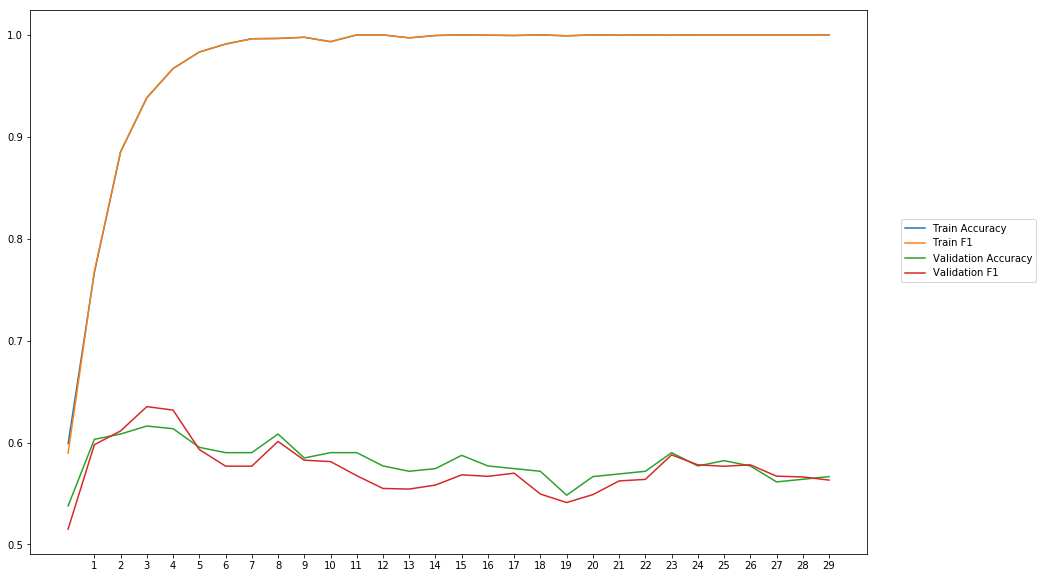

Average Accuracy: 58.12%
Average Precision: 58.52%
Average Recall: 56.44%
Average F1: 57.42%

-----Fold 8--------


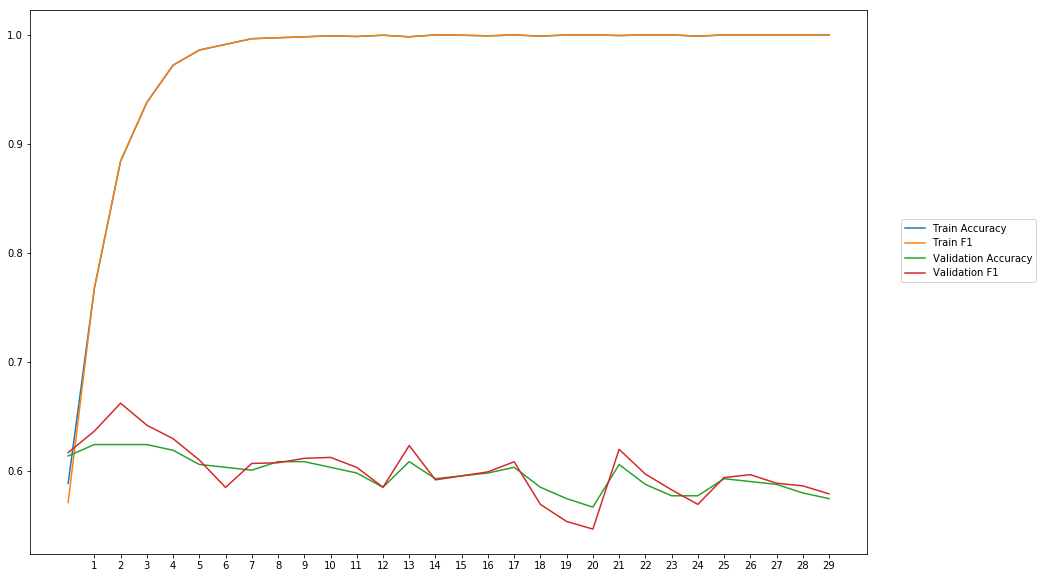

Average Accuracy: 59.70%
Average Precision: 59.65%
Average Recall: 60.49%
Average F1: 60.01%

-----Fold 9--------


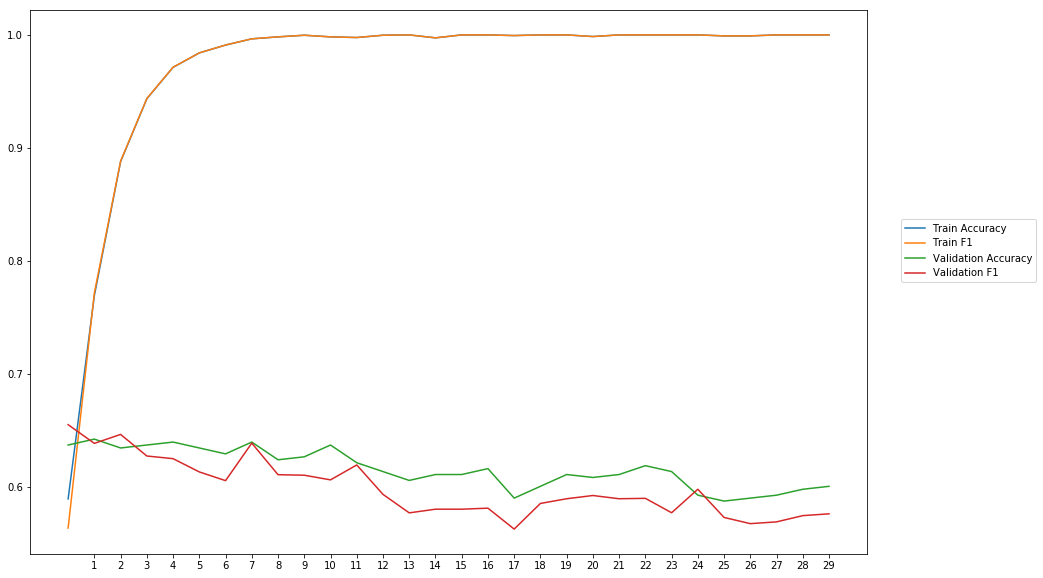

Average Accuracy: 61.58%
Average Precision: 62.84%
Average Recall: 57.26%
Average F1: 59.85%

-----Fold 10--------


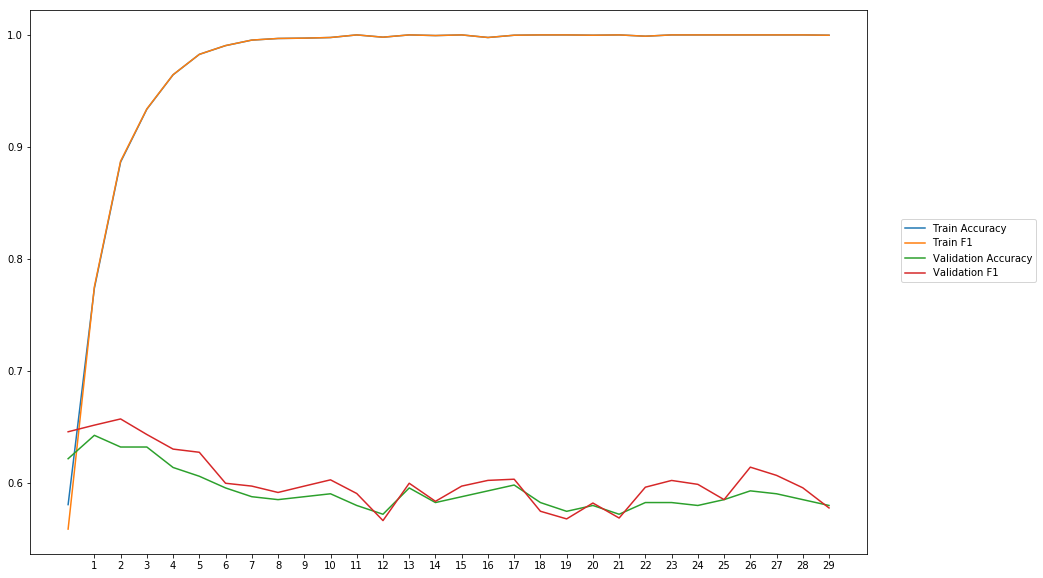

Average Accuracy: 59.28%
Average Precision: 58.98%
Average Recall: 61.46%
Average F1: 60.16%

-------Overallresults-------


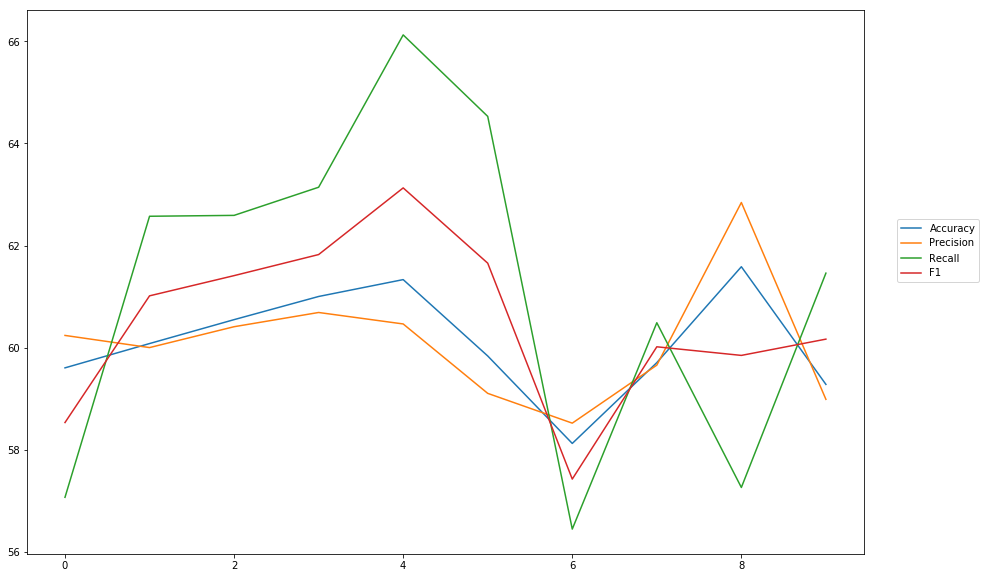

Accuracy: Mean = 60.11% (+/- 0.99%), Max = 61.58%, Min =  58.12%
Precision: Mean = 60.09% (+/- 1.14%), Max = 62.84%, Min =  58.52%
Recall: Mean = 61.17% (+/- 3.14%), Max = 66.13%, Min =  56.44%
F1: Mean = 60.50% (+/- 1.59%), Max = 63.13%, Min =  57.42%


In [9]:
cross_val(model8, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_100')  

## BiLSTM one BiLSTM-layer, 50 neurons

In [ ]:
wv_layer9 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences9 = wv_layer9(comment_input9)

#BiLSTM Layer
x9 = Bidirectional(LSTM(50, activation='tanh'))(embedded_sequences9)

#Output (Dense) Layer
preds9 = Dense(2, activation='softmax')(x9)

# build the model
model9 = Model(inputs=[comment_input9], outputs=preds9)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


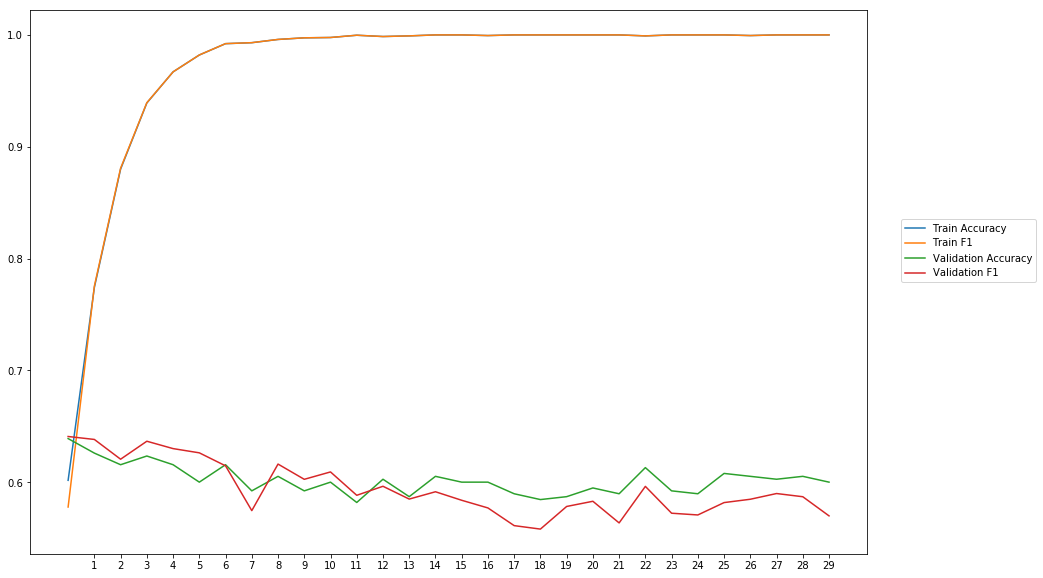

Average Accuracy: 60.21%
Average Precision: 60.77%
Average Recall: 58.31%
Average F1: 59.42%

-----Fold 2--------


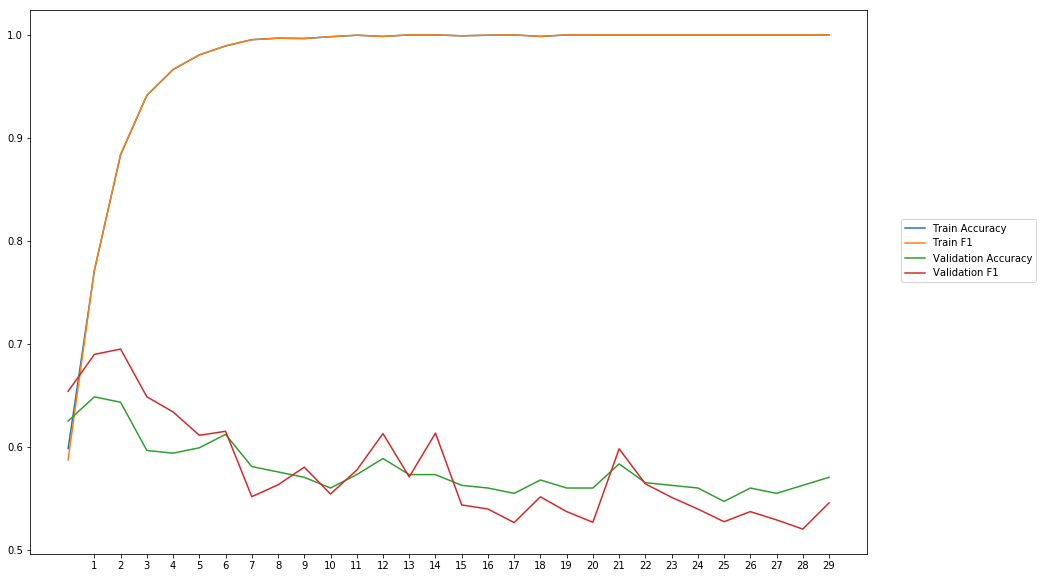

Average Accuracy: 57.80%
Average Precision: 57.92%
Average Recall: 57.98%
Average F1: 57.68%

-----Fold 3--------


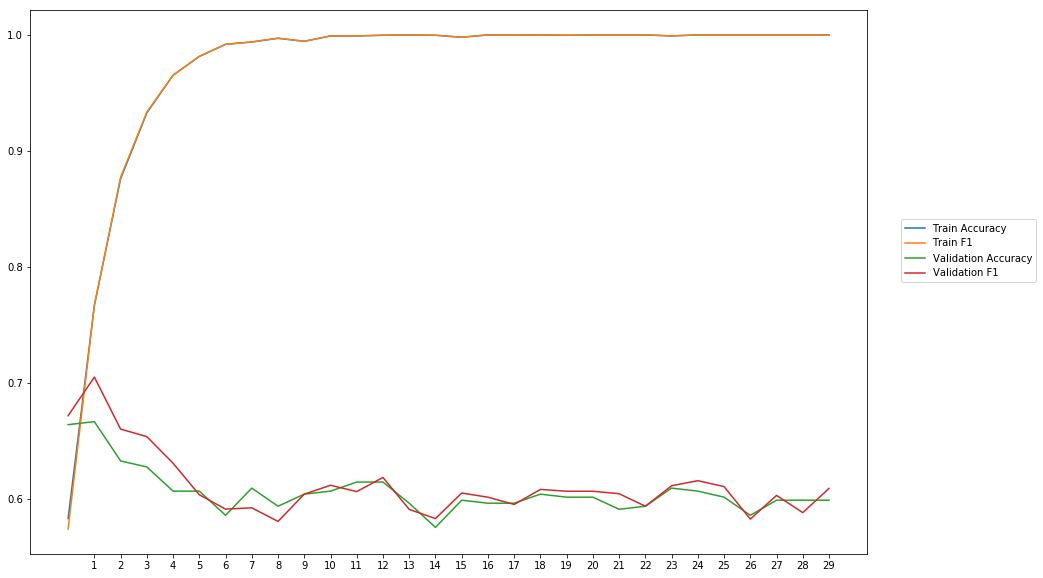

Average Accuracy: 60.63%
Average Precision: 60.60%
Average Recall: 61.87%
Average F1: 61.16%

-----Fold 4--------


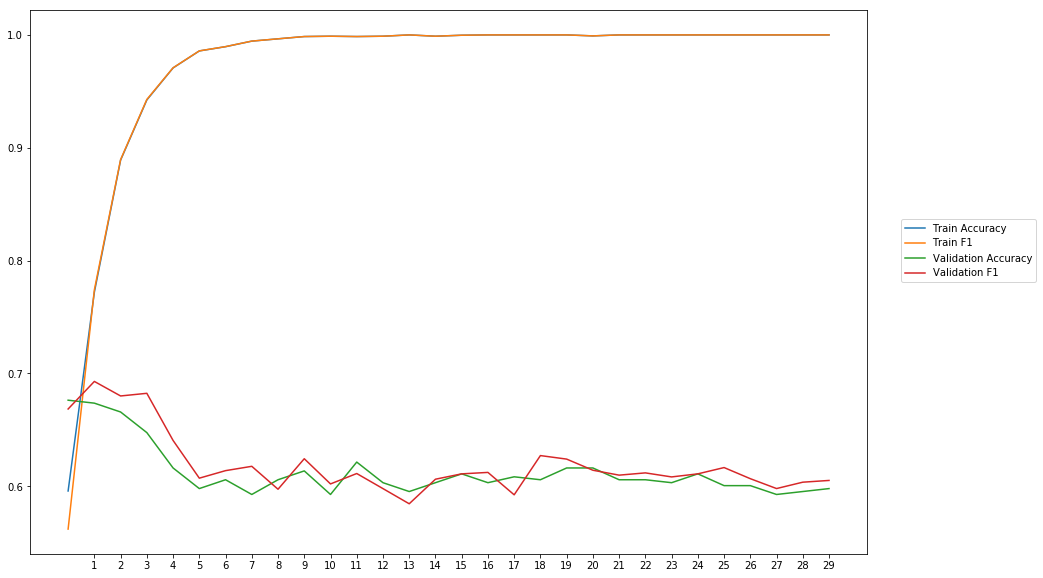

Average Accuracy: 61.28%
Average Precision: 61.05%
Average Recall: 62.95%
Average F1: 61.93%

-----Fold 5--------


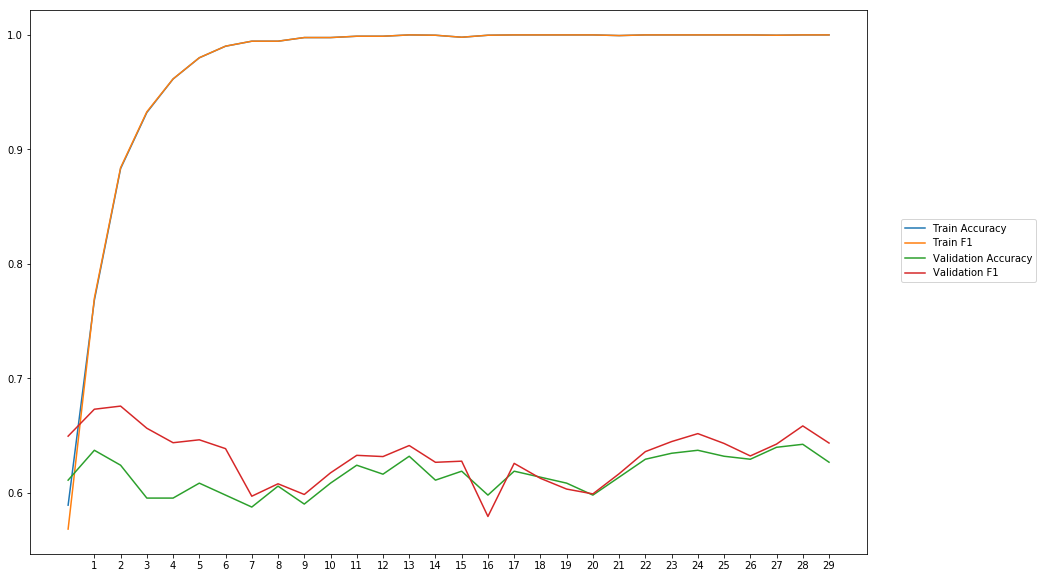

Average Accuracy: 61.61%
Average Precision: 60.90%
Average Recall: 65.90%
Average F1: 63.17%

-----Fold 6--------


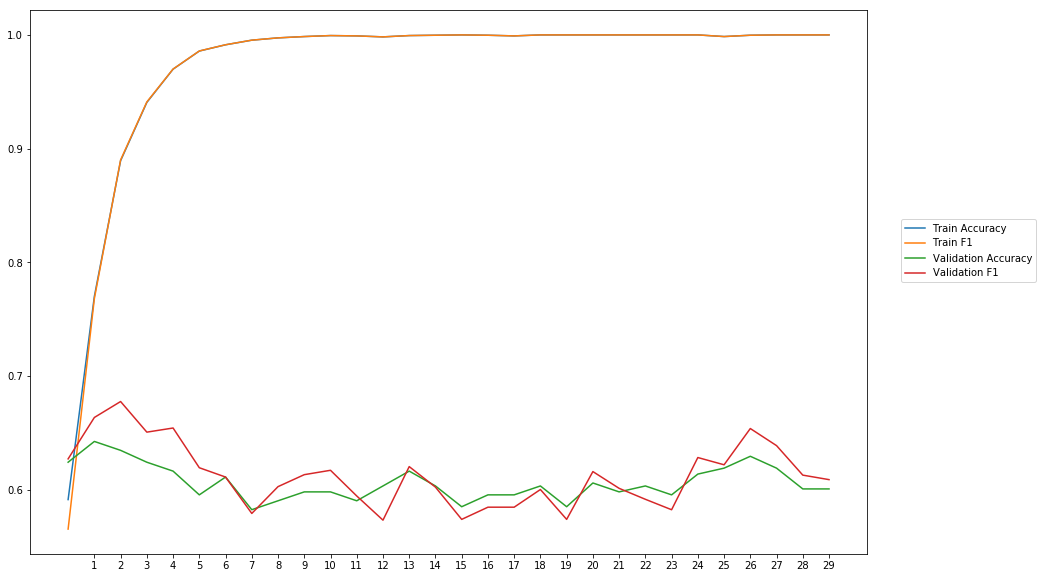

Average Accuracy: 60.58%
Average Precision: 60.33%
Average Recall: 62.41%
Average F1: 61.25%

-----Fold 7--------


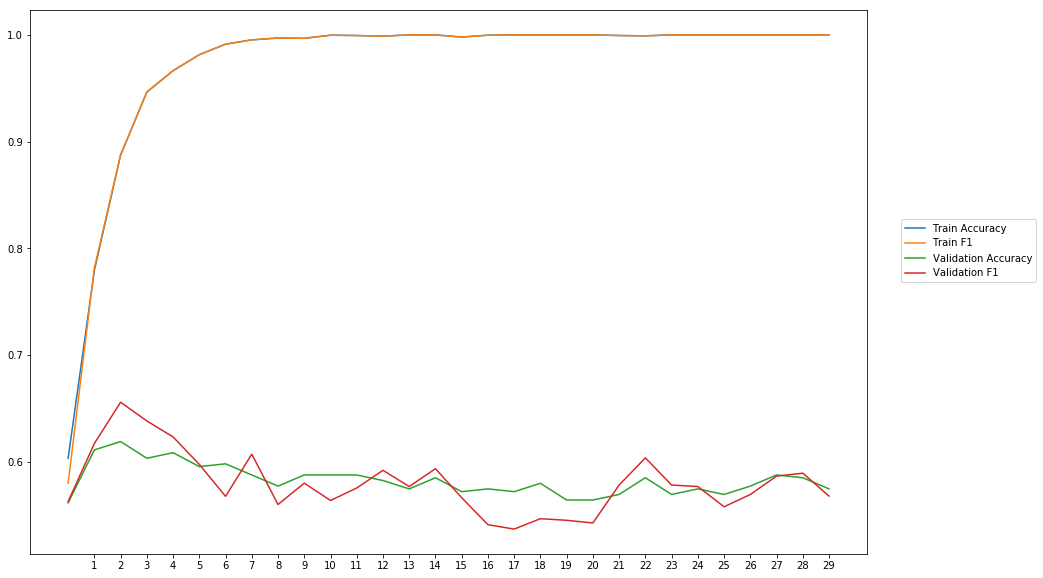

Average Accuracy: 58.27%
Average Precision: 58.50%
Average Recall: 57.69%
Average F1: 57.97%

-----Fold 8--------


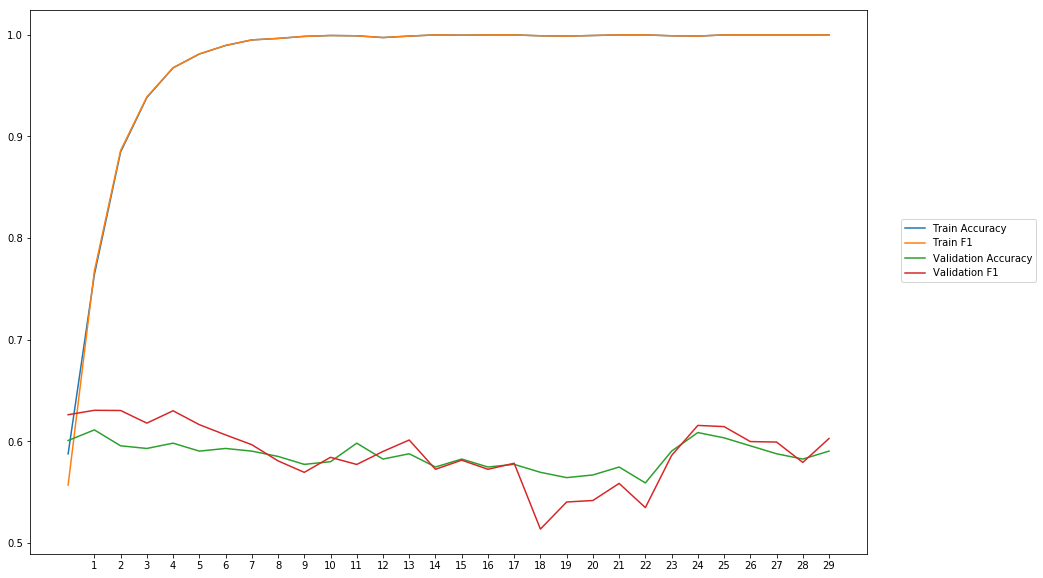

Average Accuracy: 58.59%
Average Precision: 58.59%
Average Recall: 59.25%
Average F1: 58.80%

-----Fold 9--------


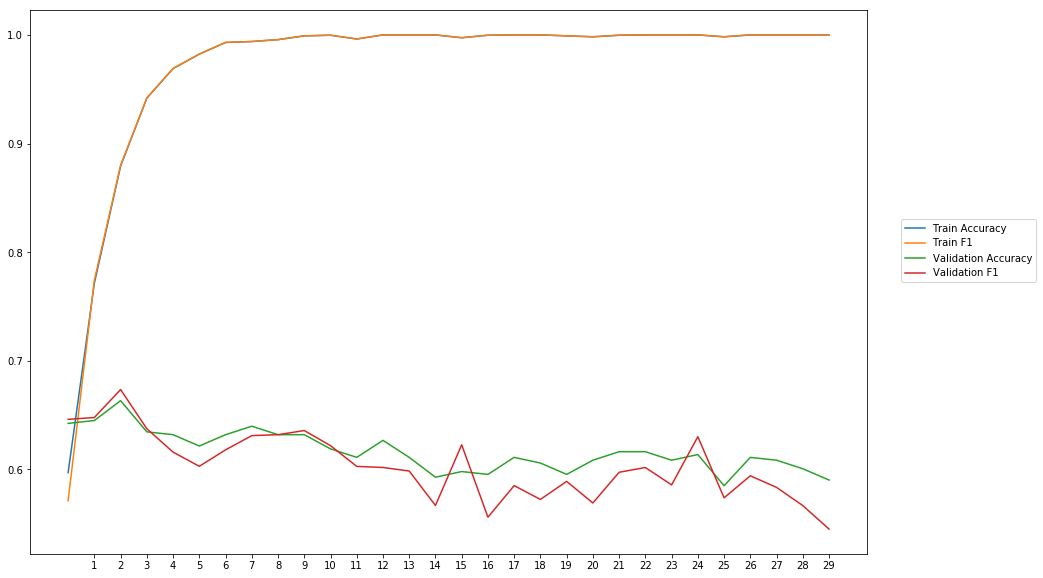

Average Accuracy: 61.65%
Average Precision: 62.60%
Average Recall: 58.44%
Average F1: 60.34%

-----Fold 10--------


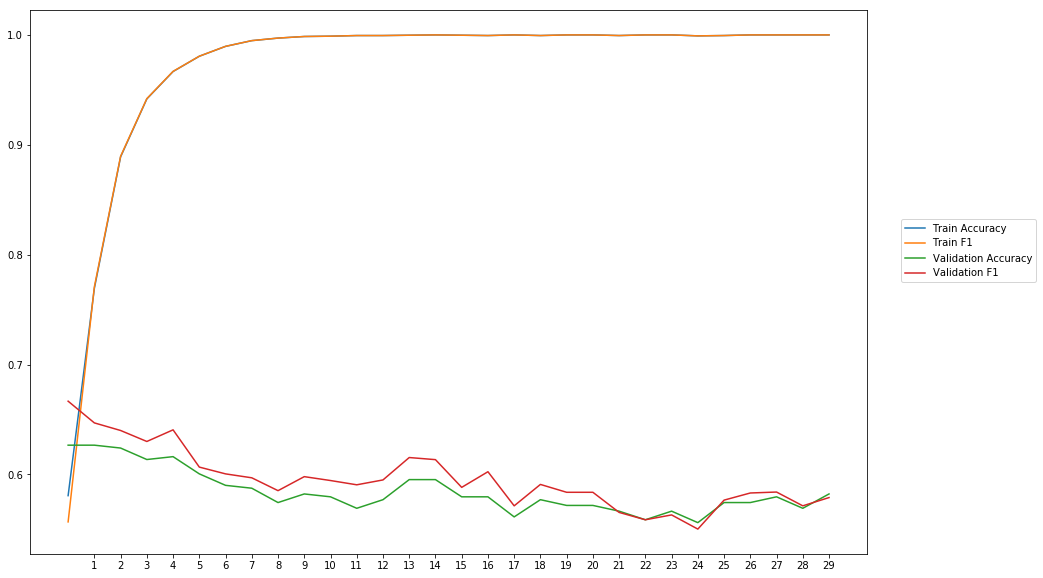

Average Accuracy: 58.42%
Average Precision: 58.05%
Average Recall: 61.27%
Average F1: 59.58%

-------Overallresults-------


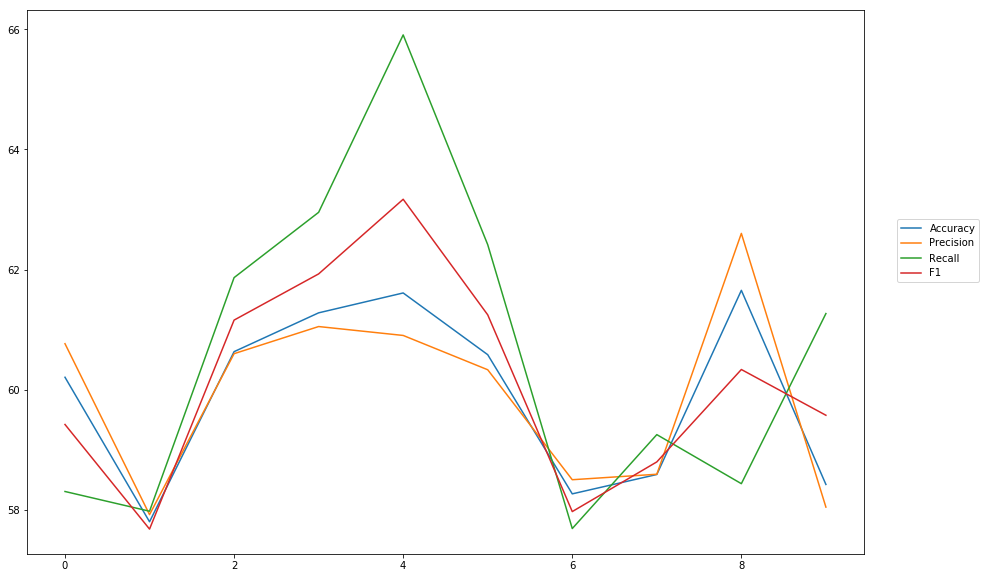

Accuracy: Mean = 59.91% (+/- 1.41%), Max = 61.65%, Min =  57.80%
Precision: Mean = 59.93% (+/- 1.48%), Max = 62.60%, Min =  57.92%
Recall: Mean = 60.61% (+/- 2.57%), Max = 65.90%, Min =  57.69%
F1: Mean = 60.13% (+/- 1.67%), Max = 63.17%, Min =  57.68%


In [8]:
cross_val(model9, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_1_50')  

## BiLSTM combination of two LSTM-layer and 100 neurons with reduktion of the neurons

In [8]:
wv_layer15 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input15 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences15 = wv_layer15(comment_input15)

#BiLSTM Layer
x15 = Bidirectional(LSTM(100, activation='tanh', return_sequences=True))(embedded_sequences15)
x15 = Bidirectional(LSTM(50, activation='tanh'))(x15)

#Output (Dense) Layer
preds15 = Dense(2, activation='softmax')(x15)

# build the model
model15 = Model(inputs=[comment_input15], outputs=preds15)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


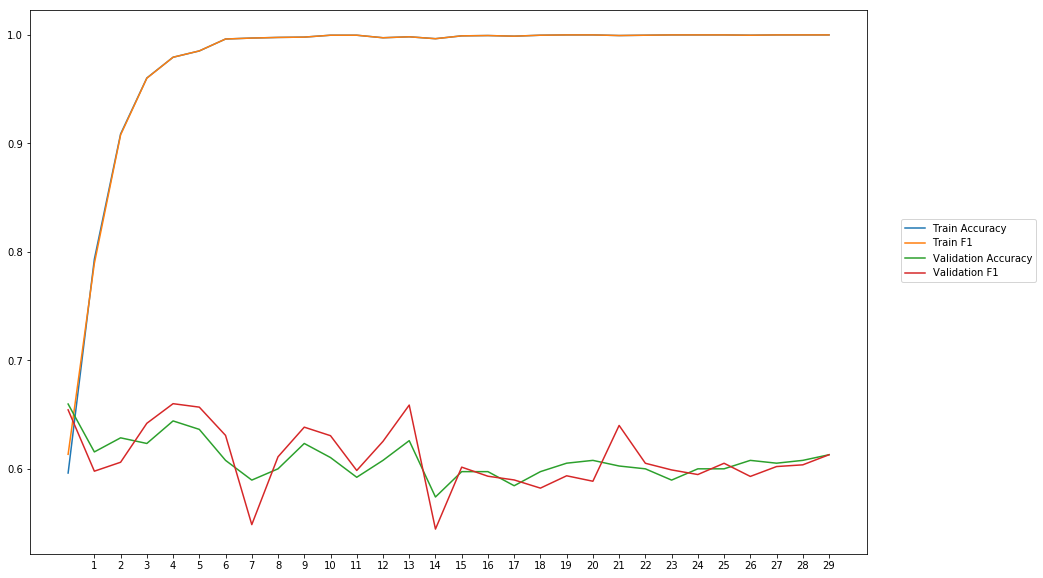

Average Accuracy: 60.85%
Average Precision: 60.58%
Average Recall: 61.74%
Average F1: 61.03%

-----Fold 2--------


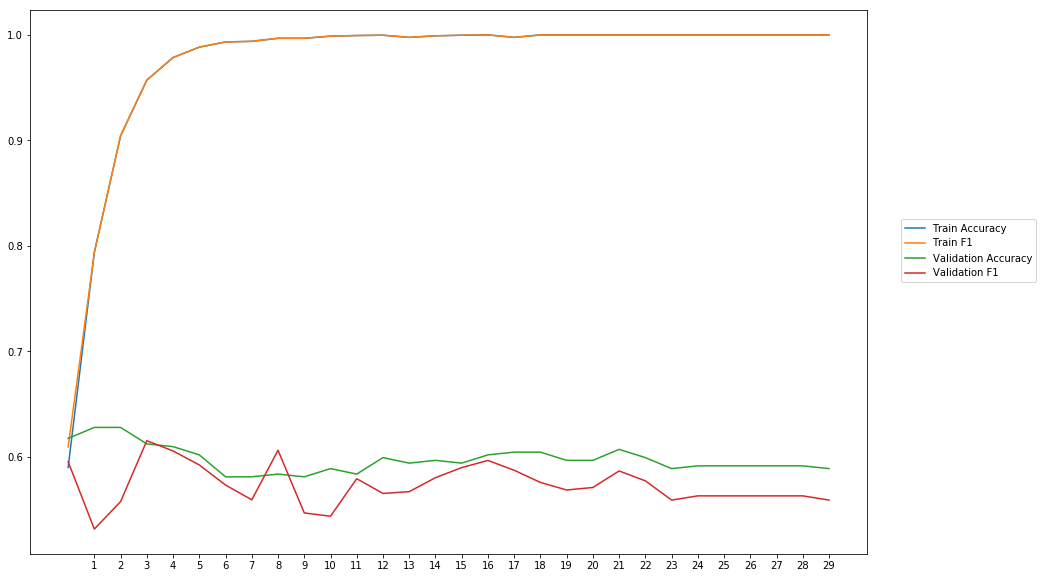

Average Accuracy: 59.72%
Average Precision: 60.78%
Average Recall: 54.54%
Average F1: 57.32%

-----Fold 3--------


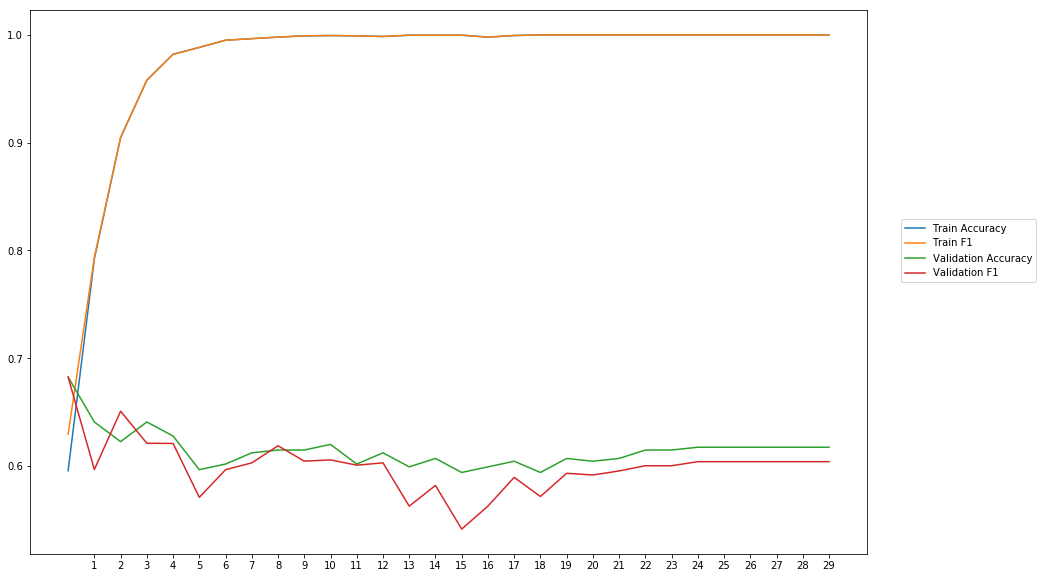

Average Accuracy: 61.44%
Average Precision: 62.01%
Average Recall: 58.17%
Average F1: 59.94%

-----Fold 4--------


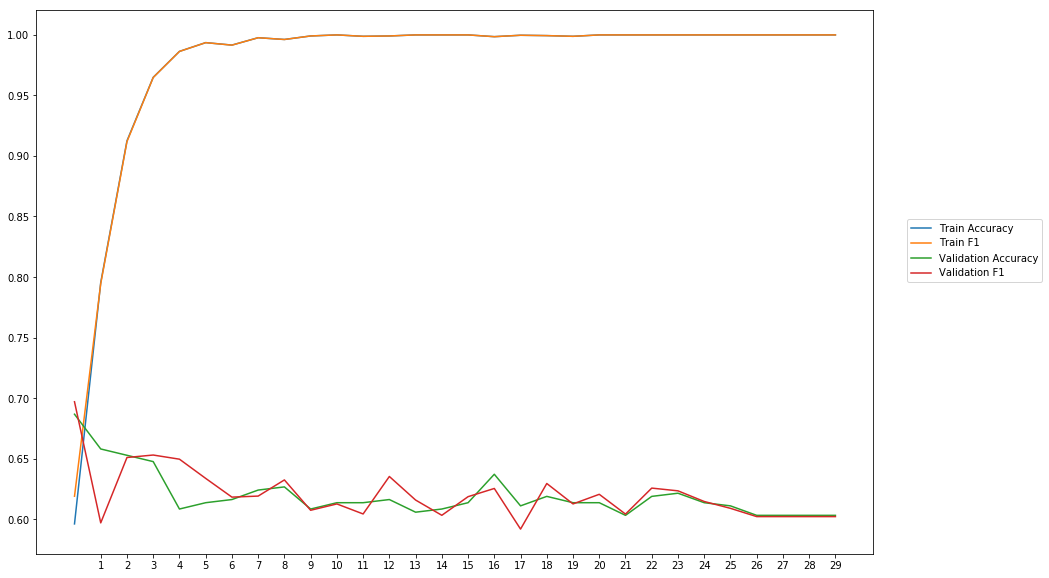

Average Accuracy: 61.96%
Average Precision: 61.86%
Average Recall: 62.46%
Average F1: 62.04%

-----Fold 5--------


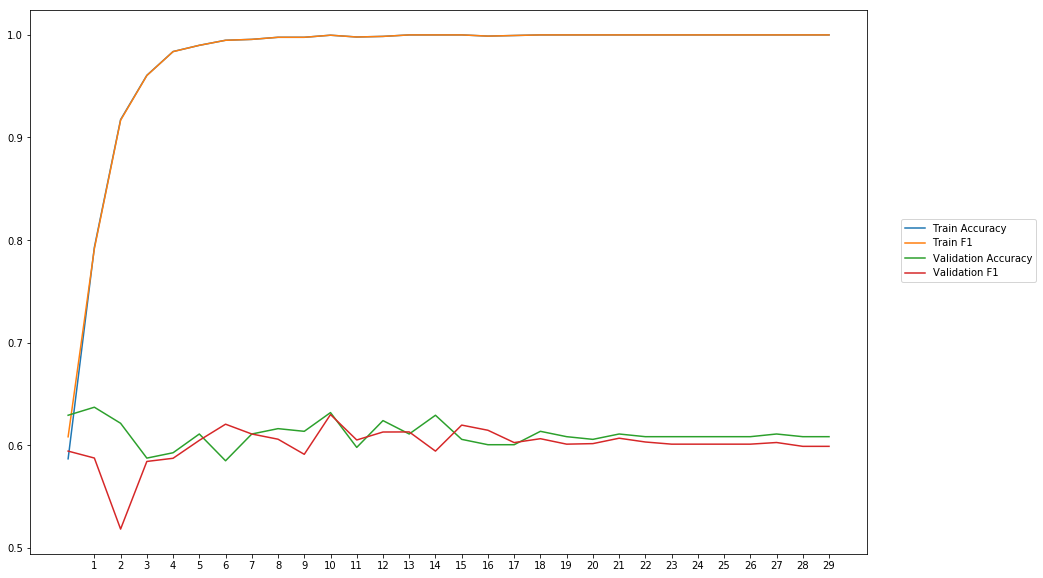

Average Accuracy: 61.04%
Average Precision: 61.67%
Average Recall: 58.95%
Average F1: 60.07%

-----Fold 6--------


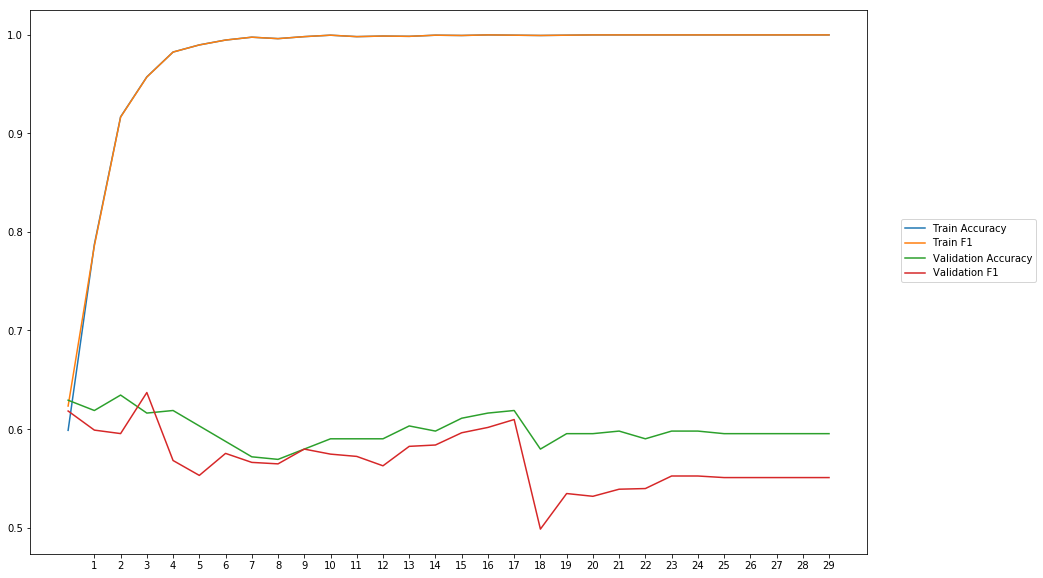

Average Accuracy: 59.92%
Average Precision: 61.47%
Average Recall: 53.11%
Average F1: 56.80%

-----Fold 7--------


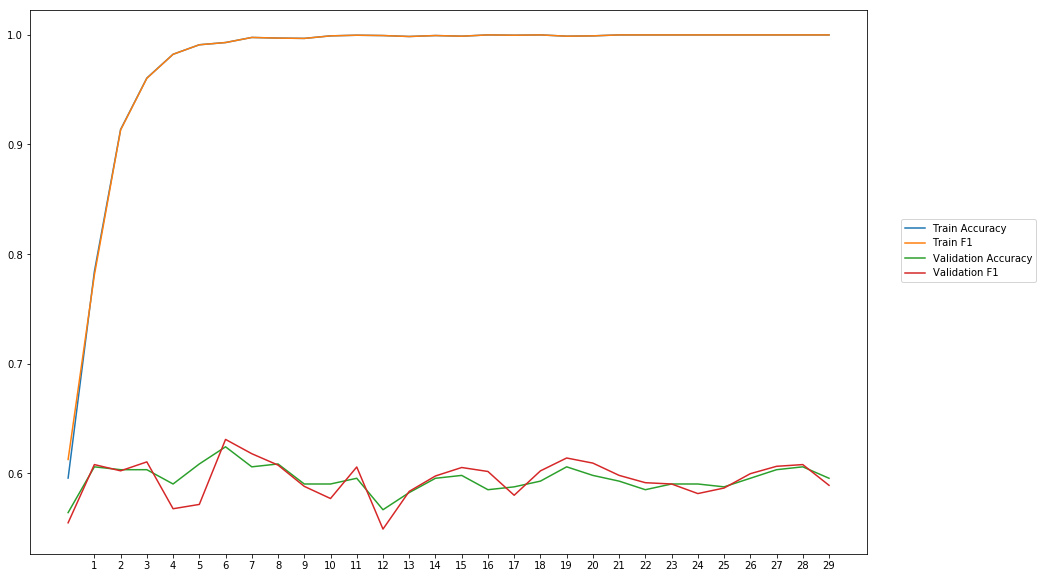

Average Accuracy: 59.48%
Average Precision: 59.34%
Average Recall: 59.62%
Average F1: 59.43%

-----Fold 8--------


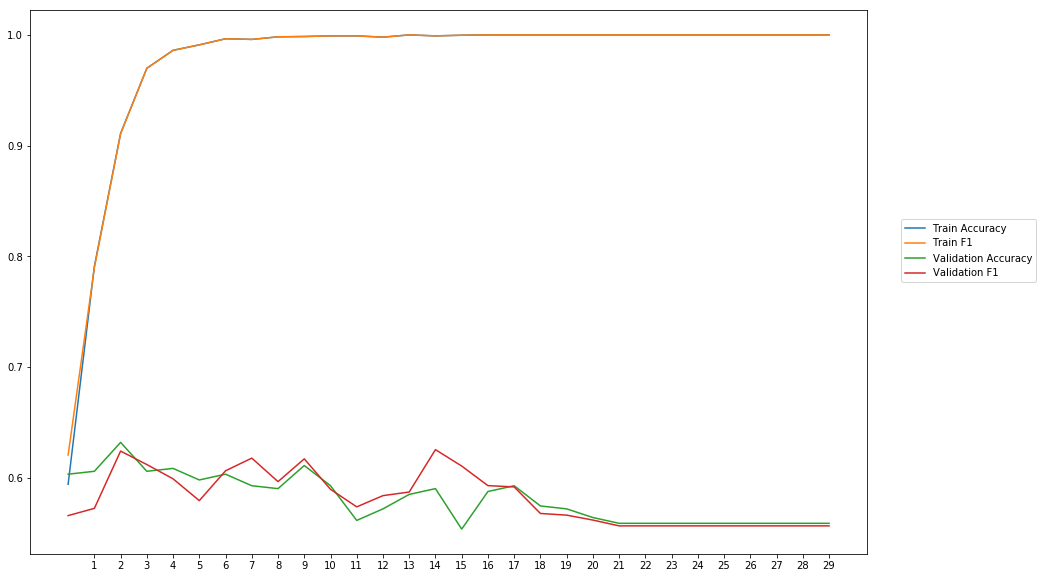

Average Accuracy: 58.08%
Average Precision: 57.98%
Average Recall: 58.53%
Average F1: 58.16%

-----Fold 9--------


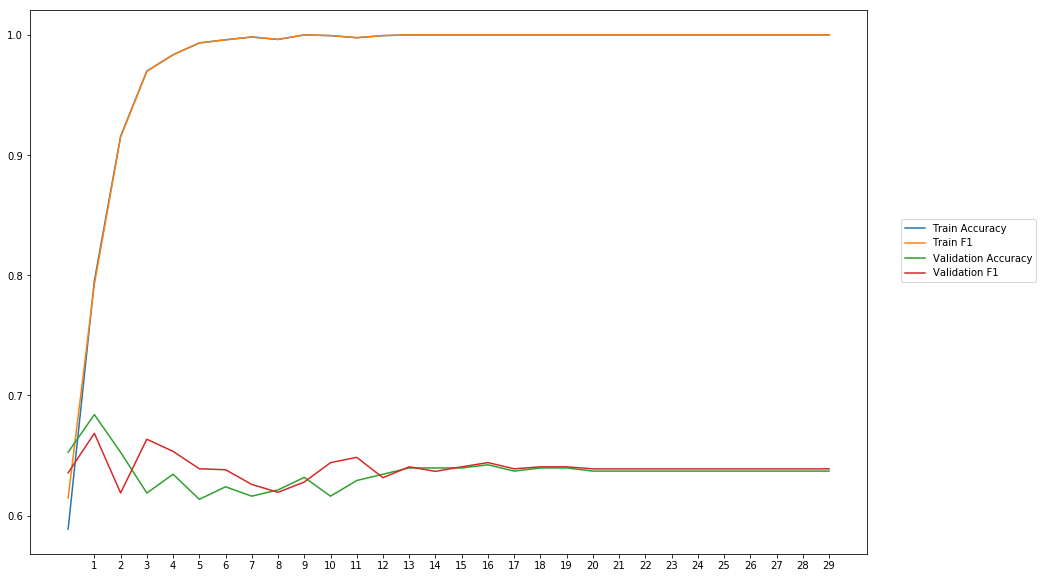

Average Accuracy: 63.59%
Average Precision: 63.30%
Average Recall: 64.82%
Average F1: 63.96%

-----Fold 10--------


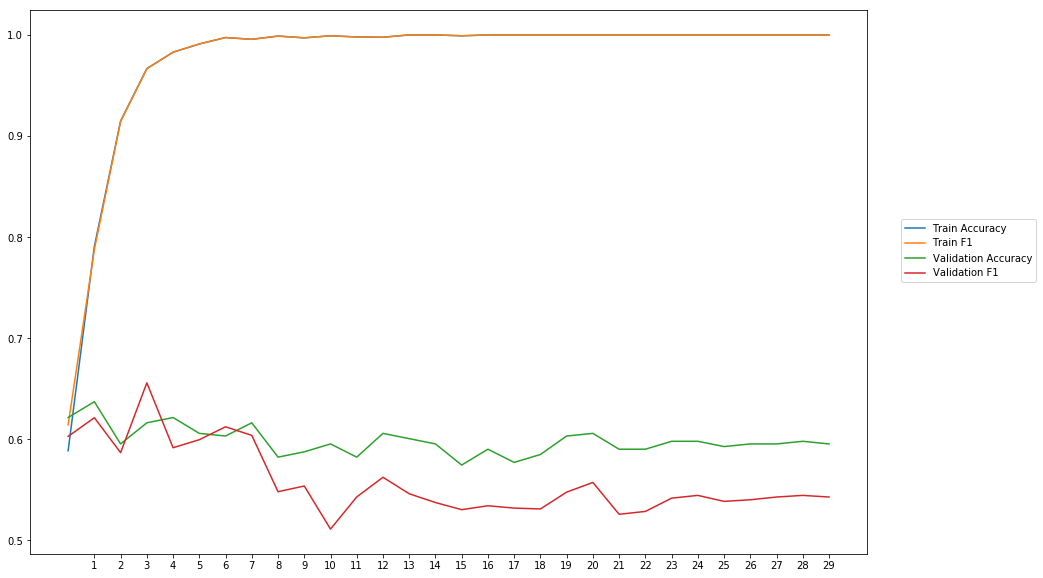

Average Accuracy: 59.84%
Average Precision: 61.80%
Average Recall: 51.33%
Average F1: 55.85%

-------Overallresults-------


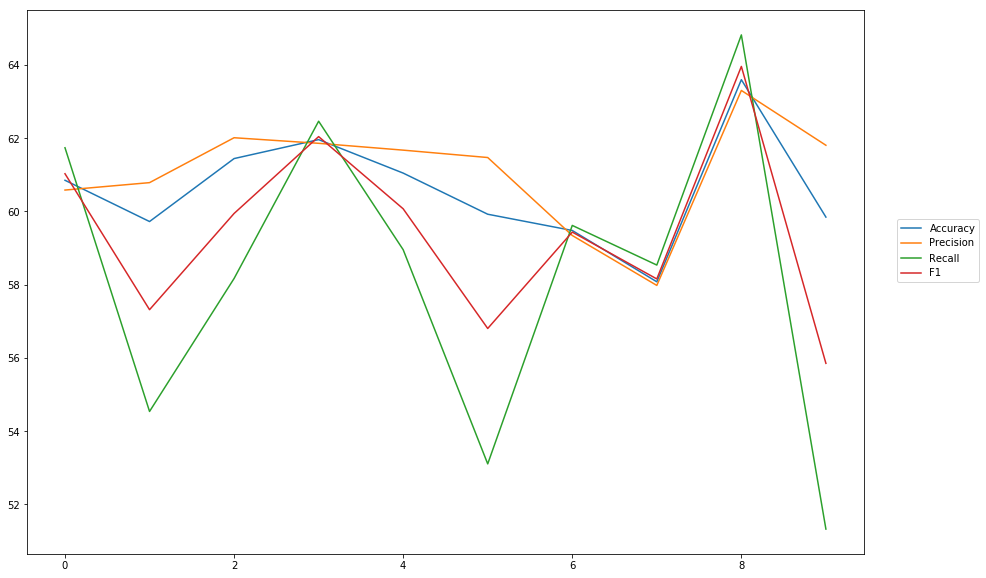

Accuracy: Mean = 60.59% (+/- 1.46%), Max = 63.59%, Min =  58.08%
Precision: Mean = 61.08% (+/- 1.43%), Max = 63.30%, Min =  57.98%
Recall: Mean = 58.33% (+/- 4.04%), Max = 64.82%, Min =  51.33%
F1: Mean = 59.46% (+/- 2.37%), Max = 63.96%, Min =  55.85%


In [9]:
cross_val(model15, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'bilstm_2_100_50')  

# Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


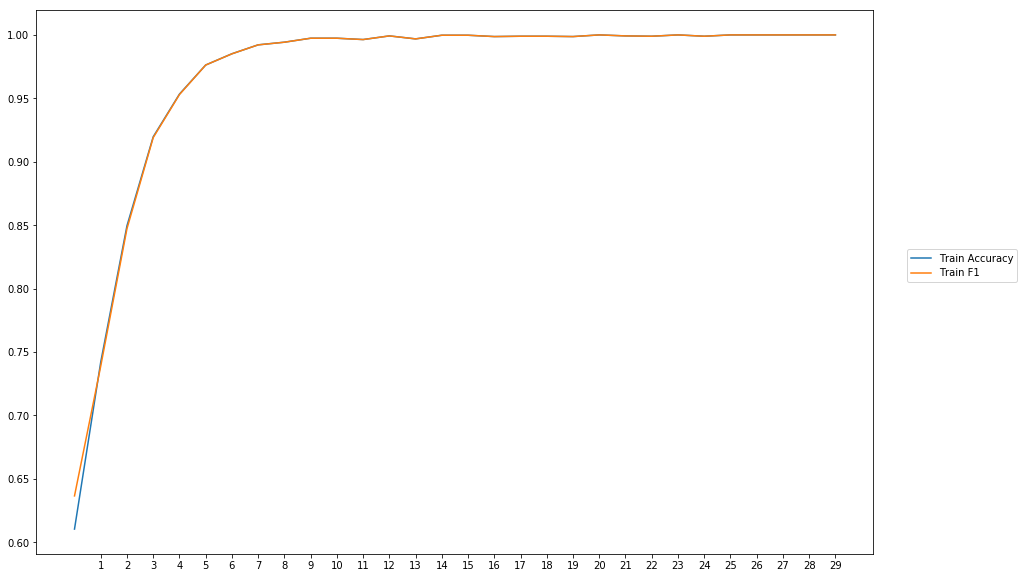


-----Test Scores----
Loss: 4.743640724493533
Accuracy: 63.13775510204081
Precision: 52.26337447484293
Recall: 81.67202569721155
F1: 63.739016555055464


In [9]:
train_evaluate_final_model(model15, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_BiLSTM')